<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2000 till Dec 2020</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2020 = pd.read_csv('Bond_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2020.head()

(252, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Germany    252 non-null    float64
 2   Australia  252 non-null    float64
 3   US         252 non-null    float64
 4   UK         252 non-null    float64
 5   Canada     252 non-null    float64
 6   Japan      252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2020['Date'] = pd.to_datetime(bond_df_2000_2020.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Germany    252 non-null    float64       
 2   Australia  252 non-null    float64       
 3   US         252 non-null    float64       
 4   UK         252 non-null    float64       
 5   Canada     252 non-null    float64       
 6   Japan      252 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2020.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2000_2020.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

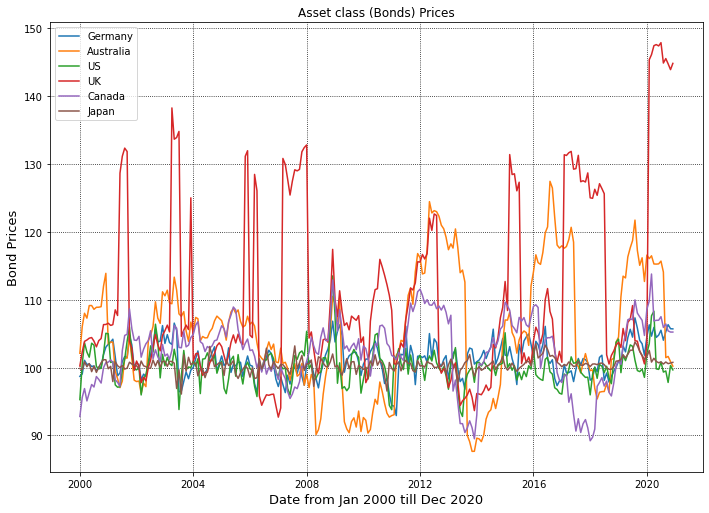

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Germany, label='Germany')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Australia, label='Australia')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.US, label='US')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.UK, label='UK')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Canada, label='Canada')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Japan, label='Japan')
plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Bond Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2020 = bond_df_2000_2020[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-01-01       NaN        NaN       NaN       NaN       NaN       NaN
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594

In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2020.dropna(axis=0, inplace=True)
bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830

In [11]:
print('There are {} rows in the DataFrame'.format(bond_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2000_2020_2 = bond_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [13]:
vol_bond_df_2000_2020 = bond_df_2000_2020

In [14]:
vol_bond_df_2000_2020.shape[0]

251

In [15]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2000_2020['Germany_Vol'] = vol_bond_df_2000_2020['Germany'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['Australia_Vol'] = vol_bond_df_2000_2020['Australia'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['US_Vol'] = vol_bond_df_2000_2020['US'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['UK_Vol'] = vol_bond_df_2000_2020['UK'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['Canada_Vol'] = vol_bond_df_2000_2020['Canada'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['Japan_Vol'] = vol_bond_df_2000_2020['Japan'].rolling(251).std() * math.sqrt(251)

In [16]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2000_2020.dropna(axis=0, inplace=True)

In [17]:
vol_bond_df_2000_2020[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

Germany_Vol  Australia_Vol    US_Vol   UK_Vol  Canada_Vol  \
Date                                                                    
2020-12-01     0.307422       0.469516  0.389627  1.11048    0.318613   

            Japan_Vol  
Date                   
2020-12-01   0.189866

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [18]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.307422+0.469516+0.389627+1.11048+0.318613+0.189866) / 6
volatility

0.46425399999999994

In [19]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2000_2020 = 0.46425399999999994 / 6
target_vol_bond_df_2000_2020

0.07737566666666666

In [20]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2000_2020 = bond_df_2000_2020

In [21]:
port_bond_df_2000_2020['Germany_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Germany_Vol'] 
port_bond_df_2000_2020['Australia_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Australia_Vol'] 
port_bond_df_2000_2020['US_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['US_Vol']
port_bond_df_2000_2020['UK_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['UK_Vol']
port_bond_df_2000_2020['Canada_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Canada_Vol']
port_bond_df_2000_2020['Japan_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Japan_Vol']

In [22]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2000_2020.dropna(axis=0, inplace=True)

In [23]:
port_bond_df_2000_2020[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

Germany_Alloc  Australia_Alloc  US_Alloc  UK_Alloc  Canada_Alloc  \
Date                                                                           
2020-12-01       0.251692         0.164799  0.198589  0.069678      0.242852   

            Japan_Alloc  
Date                     
2020-12-01     0.407528

In [24]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [25]:
bond_df_2000_2020_2['Germany_R'] = bond_df_2000_2020_2['Germany'] * 0.251692
bond_df_2000_2020_2['Australia_R'] = bond_df_2000_2020_2['Australia'] * 0.164799
bond_df_2000_2020_2['US_R'] = bond_df_2000_2020_2['US'] * 0.198589
bond_df_2000_2020_2['UK_R'] = bond_df_2000_2020_2['UK'] * 0.069678
bond_df_2000_2020_2['Canada_R'] = bond_df_2000_2020_2['Canada'] * 0.242852
bond_df_2000_2020_2['Japan_R'] = bond_df_2000_2020_2['Japan'] * 0.407528

In [26]:
bond_df_2000_2020_2.head(5)

Germany  Australia        US        UK    Canada     Japan  \
Date                                                                      
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702   
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635   
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238   
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594   
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830   

            Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  
Date                                                                        
2000-02-01   0.000918     0.006391  0.011067  0.001460  0.007380 -0.000694  
2000-03-01   0.005081     0.002999  0.006061  0.001042  0.003276  0.004742  
2000-04-01  -0.001519    -0.001099 -0.002644  0.000134 -0.004561 -0.002950  
2000-05-01   0.000175     0.002842 -0.001456  0.000181  0.003014  0.001872  
2000-06-01  -0.000926     0.000015  0.004029  0.000060  0.003128 -0.004821

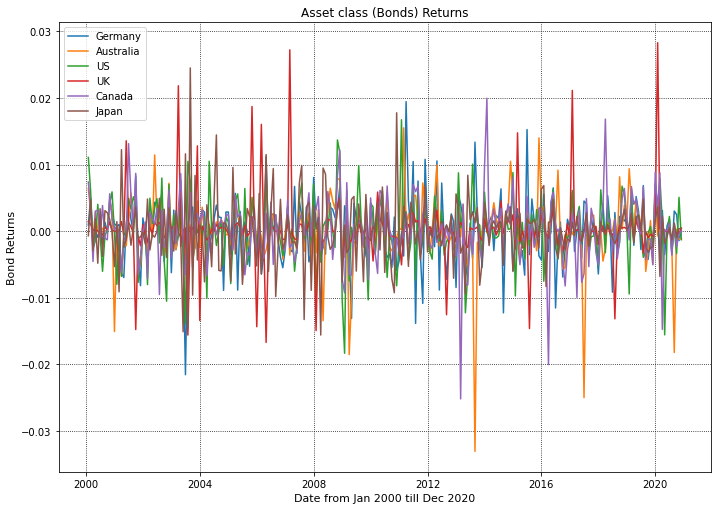

In [27]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Germany_R, label='Germany')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Australia_R, label='Australia')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.US_R, label='US')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.UK_R, label='UK')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Canada_R, label='Canada')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Japan_R, label='Japan')
plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020',fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [29]:
bond_df_2000_2020_2['Portfolio_R'] = bond_df_2000_2020_2['Germany_R'] + bond_df_2000_2020_2['Australia_R'] + bond_df_2000_2020_2['US_R'] + bond_df_2000_2020_2['UK_R'] + bond_df_2000_2020_2['Canada_R'] + bond_df_2000_2020_2['Japan_R']

In [30]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [31]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2000_2020_2['Bond_Port_Value'] = ((bond_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [32]:
bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  \
Date                                                                         
2000-02-01   0.000918     0.006391  0.011067  0.001460  0.007380 -0.000694   
2000-03-01   0.005081     0.002999  0.006061  0.001042  0.003276  0.004742   
2000-04-01  -0.001519    -0.001099 -0.002644  0.000134 -0.004561 -0.002950   
2000-05-01   0.000175     0.002842 -0.001456  0.000181  0.003014  0.001872   
2000-06-01  -0.000926     0.000015  0.004029  0.000060  0.003128 -0.004821   

            Portfolio_R  Bond_Port_Value  
Date                                      
2000-02-01     0.026523      1026.522530  
2000-03-01     0.023200      1050.338123  
2000-04-01    -0.012638      1037.064222  
2000-05-01     0.006628      1043.937533  
2000-06-01     0.001485      1045.487827

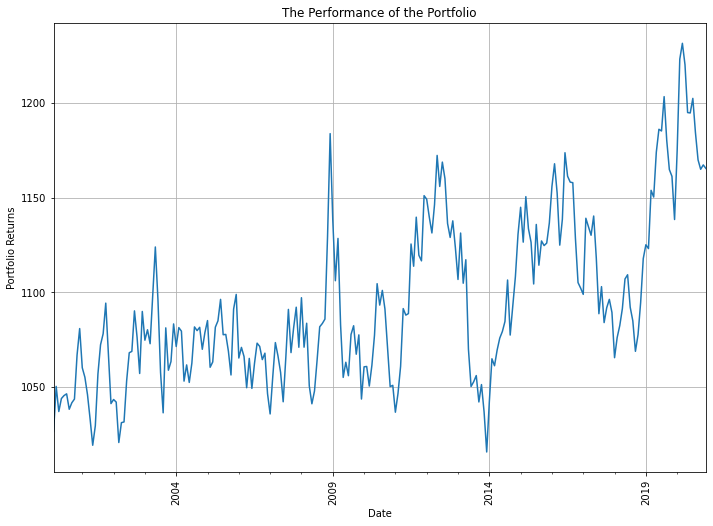

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2020');
plt.ylabel('Portfolio Returns');
bond_df_2000_2020_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [34]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2000_2020_2.Bond_Port_Value.max() - bond_df_2000_2020_2.Bond_Port_Value.min()) / bond_df_2000_2020_2.Bond_Port_Value.max()

0.17529121867906303

In [35]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2000_2020_2['Bond_Port_Value'][-1] / bond_df_2000_2020_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 13.54%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [36]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2000_2020_2['Monthly_Return'] = bond_df_2000_2020_2['Bond_Port_Value'].pct_change(1)

In [37]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2000_2020_2['Monthly_Return'].mean() / bond_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.03843987387494016

In [38]:
bond_df_2000_2020_2.shape[0]

251

In [39]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(251)
Annualized_Sharpe_Ratio

0.6090021344657571

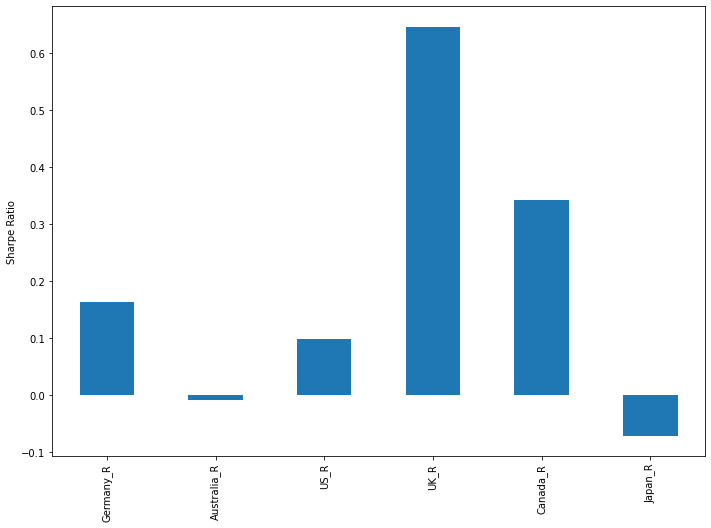

In [40]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 251 # 251 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [41]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [42]:
bond_df_2000_2020_2.shape[0]

251

In [43]:
bond_sortino_ratio(bond_df_2000_2020_2['Portfolio_R'], 251, .0164)

1.1869176086199797

In [44]:
Annualized_Sortino_Ratio = 1.1869176086199797 * np.sqrt(251)
Annualized_Sortino_Ratio

18.80431136262892

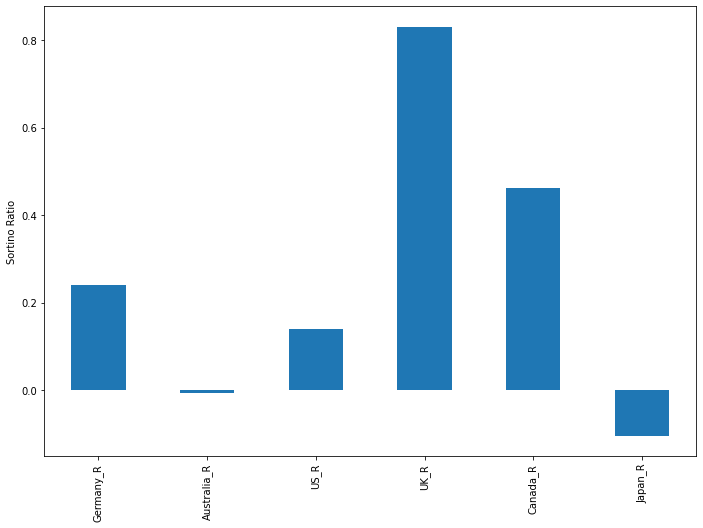

In [45]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 251 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

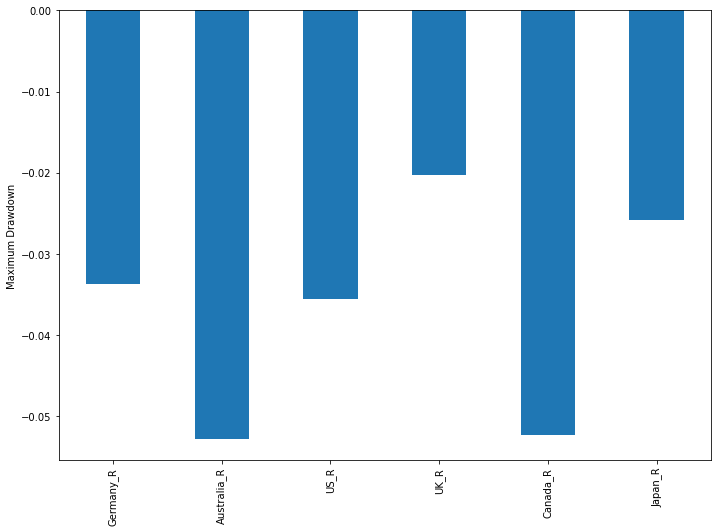

In [46]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [47]:
skew(bond_df_2000_2020_2['Bond_Port_Value'].dropna())

0.758228313103254

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [48]:
kurtosis(bond_df_2000_2020_2['Bond_Port_Value'].dropna())

-0.030775911509568488

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [49]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [50]:
geometric_mean_return(bond_df_2000_2020_2['Portfolio_R'])

0.0

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [51]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [52]:
information_ratio(bond_df_2000_2020_2['Portfolio_R'], 0.007070627941609504, 251)

-0.02355206077827395

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2020
- Target volatility 7.73 %.
- Maximum Drawdown 1.75%.
- Cumulative return of the of portfolio 13.54%
- Sharpe Ratio, or Risk-Adjusted Returns 3.84 %.
- Annualized Sharpe Ratio 5900.56 %.
- Sortino Ratio 100.18 %.
- Annualized Sortino Ratio 1800.18 %.
- Skewness 75.82 %.
- Kurtosis - 0.0307
- Geometric Mean Rate of Return 0.0
- Information ratio -2.35 %

In [53]:
# Dataset (Equity_2000_2020.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2020 = pd.read_csv('Equity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2020.head()

(252, 26)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2000     3080.2      612.38  6835.60  8481.11  1.553234e+10   
1  2/1/2000     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2  3/1/2000     3133.3      662.29  7599.39  9462.39  1.740654e+10   
3  4/1/2000     3115.8      661.38  7414.68  9347.61  1.551930e+10   
4  5/1/2000     3081.0      655.50  7109.67  9251.99  1.471386e+10   

        France        Belgium            US    Japan   ...    Chile    Brazil  \
0  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  ...  1151.42  16388.27   
1  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  ...  1106.18  17660.20   
2  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  ...  1128.58  17820.37   
3  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  ...  1075.01  15537.60   
4  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  ...  1124.19  14956.61   

   Argentina  Russia  Turkey  Portugal  Finland  South Africa  Indonesia  \
0     566.28  188.81  167.15  12385.55  3234.78       7771.66     636.37   
1     631.64  191.49  159.46  14644.27  3239.69       7287.01     576.54   
2     569.24  254.68  159.20  13127.09  3189.06       7388.34     583.28   
3     509.51  242.85  192.06  12235.62  3170.85       6913.24     526.74   
4     464.30  217.05  162.06  11864.13  2901.45       6921.37     454.33   

   Venezuela  
0   90224.09  
1   69894.88  
2   47772.07  
3   48856.03  
4   55583.02  

[5 rows x 26 columns]

In [54]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          252 non-null    object 
 1   Australia     252 non-null    float64
 2   Nethelands    252 non-null    float64
 3   Germany       252 non-null    float64
 4   Canada        252 non-null    float64
 5   Hong_Kong     252 non-null    float64
 6   France        252 non-null    float64
 7   Belgium       252 non-null    float64
 8   US            252 non-null    float64
 9   Japan         252 non-null    float64
 10  Spain         252 non-null    float64
 11  Sweden        252 non-null    float64
 12  UK            252 non-null    float64
 13  Italy         252 non-null    float64
 14  Singapore     252 non-null    float64
 15  Thailand      252 non-null    float64
 16  Chile         252 non-null    float64
 17  Brazil        252 non-null    float64
 18  Argentina     252 non-null    

In [55]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2020['Date'] = pd.to_datetime(equity_df_2000_2020.Date)

In [56]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          252 non-null    datetime64[ns]
 1   Australia     252 non-null    float64       
 2   Nethelands    252 non-null    float64       
 3   Germany       252 non-null    float64       
 4   Canada        252 non-null    float64       
 5   Hong_Kong     252 non-null    float64       
 6   France        252 non-null    float64       
 7   Belgium       252 non-null    float64       
 8   US            252 non-null    float64       
 9   Japan         252 non-null    float64       
 10  Spain         252 non-null    float64       
 11  Sweden        252 non-null    float64       
 12  UK            252 non-null    float64       
 13  Italy         252 non-null    float64       
 14  Singapore     252 non-null    float64       
 15  Thailand      252 non-null    float64   

In [57]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2020.set_index('Date',inplace=True)

In [58]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2000_2020.isnull().any()

Australia       False
Nethelands      False
Germany         False
Canada          False
Hong_Kong       False
France          False
Belgium         False
US              False
Japan           False
Spain           False
Sweden          False
UK              False
Italy           False
Singapore       False
Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [59]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'France ':'France'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Japan ':'Japan'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Sweden ':'Sweden'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'South Africa':'South_Africa'})

In [60]:
equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                     'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                     'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

Australia  Nethelands  Germany   Canada     Hong_Kong  \
Date                                                                
2000-01-01     3080.2      612.38  6835.60  8481.11  1.553234e+10   
2000-02-01     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2000-03-01     3133.3      662.29  7599.39  9462.39  1.740654e+10   

                  France       Belgium            US     Japan    Spain  ...  \
Date                                                                     ...   
2000-01-01  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1  ...   
2000-02-01  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8  ...   
2000-03-01  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0  ...   

              Chile    Brazil  Argentina  Russia  Turkey  Portugal  Finland  \
Date                                                                          
2000-01-01  1151.42  16388.27     566.28  188.81  167.15  12385.55  3234.78   
2000-02-01  1106.18  17660.20     631.64  191.49  159.46  14644.27  3239.69   
2000-03-01  1128.58  17820.37     569.24  254.68  159.20  13127.09  3189.06   

            South_Africa  Indonesia  Venezuela  
Date                                            
2000-01-01       7771.66     636.37   90224.09  
2000-02-01       7287.01     576.54   69894.88  
2000-03-01       7388.34     583.28   47772.07  

[3 rows x 25 columns]

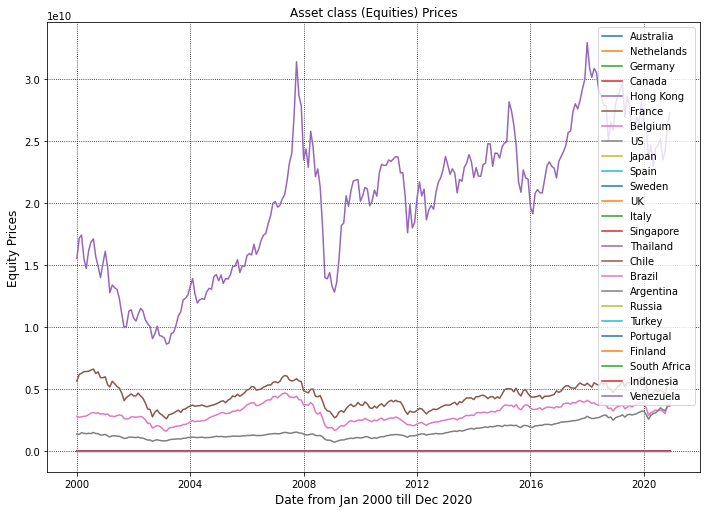

In [61]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Australia, label='Australia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Germany, label='Germany')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Canada, label='Canada')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.France, label='France')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Belgium, label='Belgium')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.US, label='US')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Japan, label='Japan')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Spain, label='Spain')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Sweden, label='Sweden')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.UK, label='UK')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Italy, label='Italy')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Singapore, label='Singapore')

plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Thailand, label='Thailand')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Chile, label='Chile')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Brazil, label='Brazil')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Argentina, label='Argentina')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Russia, label='Russia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Turkey, label='Turkey')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Portugal, label='Portugal')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Finland, label='Finland')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.South_Africa, label='South Africa')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Indonesia, label='Indonesia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

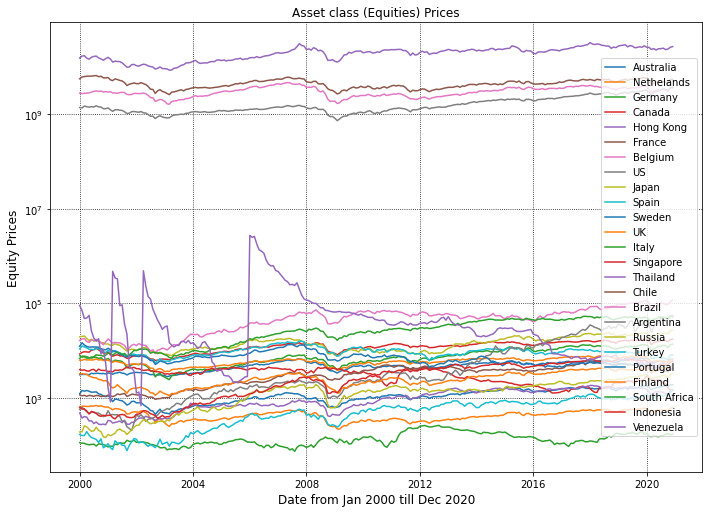

In [62]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Australia, label='Australia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Germany, label='Germany')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Canada, label='Canada')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.France, label='France')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Belgium, label='Belgium')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.US, label='US')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Japan, label='Japan')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Spain, label='Spain')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Sweden, label='Sweden')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.UK, label='UK')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Italy, label='Italy')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Singapore, label='Singapore')

plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Thailand, label='Thailand')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Chile, label='Chile')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Brazil, label='Brazil')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Argentina, label='Argentina')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Russia, label='Russia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Turkey, label='Turkey')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Portugal, label='Portugal')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Finland, label='Finland')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.South_Africa, label='South Africa')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Indonesia, label='Indonesia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [63]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2020 = equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                                           'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                                           'South_Africa','Indonesia','Venezuela']].pct_change()
equity_df_2000_2020.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   

             Belgium        US     Japan     Spain  ...     Chile    Brazil  \
Date                                                ...                       
2000-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ... -0.039291  0.077612   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...  0.020250  0.009070   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ... -0.047467 -0.128099   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...  0.045748 -0.037393   

            Argentina    Russia    Turkey  Portugal   Finland  South_Africa  \
Date                                                                          
2000-01-01        NaN       NaN       NaN       NaN       NaN           NaN   
2000-02-01   0.115420  0.014194 -0.046007  0.182367  0.001518     -0.062361   
2000-03-01  -0.098790  0.329991 -0.001631 -0.103602 -0.015628      0.013906   
2000-04-01  -0.104929 -0.046450  0.206407 -0.067911 -0.005710     -0.064304   
2000-05-01  -0.088732 -0.106238 -0.156201 -0.030361 -0.084961      0.001176   

            Indonesia  Venezuela  
Date                              
2000-01-01        NaN        NaN  
2000-02-01  -0.094018  -0.225319  
2000-03-01   0.011690  -0.316515  
2000-04-01  -0.096935   0.022690  
2000-05-01  -0.137468   0.137690  

[5 rows x 25 columns]

In [64]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2020.dropna(axis=0, inplace=True)
equity_df_2000_2020.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   

             Belgium        US     Japan     Spain  ...     Chile    Brazil  \
Date                                                ...                       
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ... -0.039291  0.077612   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...  0.020250  0.009070   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ... -0.047467 -0.128099   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...  0.045748 -0.037393   
2000-06-01  0.036446  0.023934  0.066040 -0.010029  ... -0.013814  0.118432   

            Argentina    Russia    Turkey  Portugal   Finland  South_Africa  \
Date                                                                          
2000-02-01   0.115420  0.014194 -0.046007  0.182367  0.001518     -0.062361   
2000-03-01  -0.098790  0.329991 -0.001631 -0.103602 -0.015628      0.013906   
2000-04-01  -0.104929 -0.046450  0.206407 -0.067911 -0.005710     -0.064304   
2000-05-01  -0.088732 -0.106238 -0.156201 -0.030361 -0.084961      0.001176   
2000-06-01   0.070213 -0.101912 -0.107368  0.004993 -0.047145      0.055314   

            Indonesia  Venezuela  
Date                              
2000-02-01  -0.094018  -0.225319  
2000-03-01   0.011690  -0.316515  
2000-04-01  -0.096935   0.022690  
2000-05-01  -0.137468   0.137690  
2000-06-01   0.133779  -0.536033  

[5 rows x 25 columns]

In [65]:
print('There are {} rows in the DataFrame'.format(equity_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [66]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2000_2020_2 = equity_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [67]:
vol_equity_df_2000_2020 = equity_df_2000_2020

In [68]:
equity_df_2000_2020.shape[0]

251

In [69]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2000_2020['Australia_Vol'] = vol_equity_df_2000_2020['Australia'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Nethelands_Vol'] = vol_equity_df_2000_2020['Nethelands'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Germany_Vol'] = vol_equity_df_2000_2020['Germany'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Canada_Vol'] = vol_equity_df_2000_2020['Canada'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Hong_Kong_Vol'] = vol_equity_df_2000_2020['Hong_Kong'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['France_Vol'] = vol_equity_df_2000_2020['France'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Belgium_Vol'] = vol_equity_df_2000_2020['Belgium'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['US_Vol'] = vol_equity_df_2000_2020['US'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Japan_Vol'] = vol_equity_df_2000_2020['Japan'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Spain_Vol'] = vol_equity_df_2000_2020['Spain'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Sweden_Vol'] = vol_equity_df_2000_2020['Sweden'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['UK_Vol'] = vol_equity_df_2000_2020['UK'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Italy_Vol'] = vol_equity_df_2000_2020['Italy'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Singapore_Vol'] = vol_equity_df_2000_2020['Singapore'].rolling(251).std() * math.sqrt(251)

vol_equity_df_2000_2020['Thailand_Vol'] = vol_equity_df_2000_2020['Thailand'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Chile_Vol'] = vol_equity_df_2000_2020['Chile'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Brazil_Vol'] = vol_equity_df_2000_2020['Brazil'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Argentina_Vol'] = vol_equity_df_2000_2020['Argentina'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Russia_Vol'] = vol_equity_df_2000_2020['Russia'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Turkey_Vol'] = vol_equity_df_2000_2020['Turkey'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Portugal_Vol'] = vol_equity_df_2000_2020['Portugal'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Finland_Vol'] = vol_equity_df_2000_2020['Finland'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['South_Africa_Vol'] = vol_equity_df_2000_2020['South_Africa'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Indonesia_Vol'] = vol_equity_df_2000_2020['Indonesia'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Venezuela_Vol'] = vol_equity_df_2000_2020['Venezuela'].rolling(251).std() * math.sqrt(251)

In [70]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2000_2020.dropna(axis=0, inplace=True)

In [71]:
vol_equity_df_2000_2020[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol',
                         'Singapore_Vol','Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol',
                         'Turkey_Vol','Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

Australia_Vol  Nethelands_Vol  Germany_Vol  Canada_Vol  \
Date                                                                 
2020-12-01       0.616103        0.847231     0.953758    0.646975   

            Hong_Kong_Vol  France_Vol  Belgium_Vol    US_Vol  Japan_Vol  \
Date                                                                      
2020-12-01       0.940866    0.820655       0.7774  0.692984   0.883287   

            Spain_Vol  ...  Chile_Vol  Brazil_Vol  Argentina_Vol  Russia_Vol  \
Date                   ...                                                     
2020-12-01   0.933972  ...   0.756534    1.148901       1.823715    1.242477   

            Turkey_Vol  Portugal_Vol  Finland_Vol  South_Africa_Vol  \
Date                                                                  
2020-12-01    1.585053      0.859817     0.911778          0.804432   

            Indonesia_Vol  Venezuela_Vol  
Date                                      
2020-12-01       0.968431    1331.549394  

[1 rows x 25 columns]

In [72]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.616103 + 0.847231 + 0.953758 + 0.646975 + 0.940866 + 0.820655 + 0.7774 + 0.692984 + 0.883287 + 0.933972 + 0.863868 + 0.633582 + 1.111714 + 1.083001+ 1.019075+0.756534+1.148901+1.823715+1.242477+1.585053+0.859817+0.911778+0.804432+0.968431+1331.549394) / 25
Avg_vol_equity

54.17900011999999

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [73]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2000_2020 = 1 / 25
target_vol_equity_2000_2020

0.04

In [74]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2000_2020 = equity_df_2000_2020

In [75]:
port_equity_df_2000_2020['Australia_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Australia_Vol'] 
port_equity_df_2000_2020['Nethelands_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Nethelands_Vol'] 
port_equity_df_2000_2020['Germany_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Germany_Vol'] 
port_equity_df_2000_2020['Canada_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Canada_Vol']
port_equity_df_2000_2020['Hong_Kong_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Hong_Kong_Vol']
port_equity_df_2000_2020['France_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['France_Vol']
port_equity_df_2000_2020['Belgium_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Belgium_Vol']
port_equity_df_2000_2020['US_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['US_Vol']
port_equity_df_2000_2020['Japan_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Japan_Vol']
port_equity_df_2000_2020['Spain_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Spain_Vol']
port_equity_df_2000_2020['Sweden_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Sweden_Vol']
port_equity_df_2000_2020['UK_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['UK_Vol']
port_equity_df_2000_2020['Italy_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Italy_Vol']
port_equity_df_2000_2020['Singapore_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Singapore_Vol']

port_equity_df_2000_2020['Thailand_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Thailand_Vol']
port_equity_df_2000_2020['Chile_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Chile_Vol']
port_equity_df_2000_2020['Brazil_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Brazil_Vol']
port_equity_df_2000_2020['Argentina_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Argentina_Vol']
port_equity_df_2000_2020['Russia_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Russia_Vol']
port_equity_df_2000_2020['Turkey_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Turkey_Vol']
port_equity_df_2000_2020['Portugal_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Portugal_Vol']
port_equity_df_2000_2020['Finland_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Finland_Vol']
port_equity_df_2000_2020['South_Africa_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['South_Africa_Vol']
port_equity_df_2000_2020['Indonesia_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Indonesia_Vol']
port_equity_df_2000_2020['Venezuela_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Venezuela_Vol']


In [76]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2000_2020.dropna(axis=0, inplace=True)

In [77]:
port_equity_df_2000_2020[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc','Thailand_Alloc','Chile_Alloc',
                          'Brazil_Alloc','Argentina_Alloc','Russia_Alloc','Turkey_Alloc','Portugal_Alloc',
                          'Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc','Venezuela_Alloc']]

Australia_Alloc  Nethelands_Alloc  Germany_Alloc  Canada_Alloc  \
Date                                                                         
2020-12-01         0.064924          0.047213       0.041939      0.061826   

            Hong_Kong_Alloc  France_Alloc  Belgium_Alloc  US_Alloc  \
Date                                                                 
2020-12-01         0.042514      0.048742       0.051454  0.057721   

            Japan_Alloc  Spain_Alloc  ...  Chile_Alloc  Brazil_Alloc  \
Date                                  ...                              
2020-12-01     0.045285     0.042828  ...     0.052873      0.034816   

            Argentina_Alloc  Russia_Alloc  Turkey_Alloc  Portugal_Alloc  \
Date                                                                      
2020-12-01         0.021933      0.032194      0.025236        0.046522   

            Finland_Alloc  South_Africa_Alloc  Indonesia_Alloc  \
Date                                                             
2020-12-01        0.04387            0.049725         0.041304   

            Venezuela_Alloc  
Date                         
2020-12-01          0.00003  

[1 rows x 25 columns]

In [78]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [79]:
equity_df_2000_2020_2['Australia_R'] = equity_df_2000_2020_2['Australia'] * 0.064924
equity_df_2000_2020_2['Nethelands_R'] = equity_df_2000_2020_2['Nethelands'] * 0.047213
equity_df_2000_2020_2['Germany_R'] = equity_df_2000_2020_2['Germany'] * 0.041939
equity_df_2000_2020_2['Canada_R'] = equity_df_2000_2020_2['Canada'] * 0.061826
equity_df_2000_2020_2['Hong_Kong_R'] = equity_df_2000_2020_2['Hong_Kong'] * 0.042514
equity_df_2000_2020_2['France_R'] = equity_df_2000_2020_2['France'] * 0.048742
equity_df_2000_2020_2['Belgium_R'] = equity_df_2000_2020_2['Belgium'] * 0.051454
equity_df_2000_2020_2['US_R'] = equity_df_2000_2020_2['US'] * 0.057721
equity_df_2000_2020_2['Japan_R'] = equity_df_2000_2020_2['Japan'] * 0.045285
equity_df_2000_2020_2['Spain_R'] = equity_df_2000_2020_2['Spain'] * 0.042828
equity_df_2000_2020_2['Sweden_R'] = equity_df_2000_2020_2['Sweden'] * 0.046303
equity_df_2000_2020_2['UK_R'] = equity_df_2000_2020_2['UK'] * 0.063133
equity_df_2000_2020_2['Italy_R'] = equity_df_2000_2020_2['Italy'] * 0.03598
equity_df_2000_2020_2['Singapore_R'] = equity_df_2000_2020_2['Singapore'] * 0.036934

equity_df_2000_2020_2['Thailand_R'] = equity_df_2000_2020_2['Thailand'] * 0.039251
equity_df_2000_2020_2['Chile_R'] = equity_df_2000_2020_2['Chile'] * 0.052873
equity_df_2000_2020_2['Brazil_R'] = equity_df_2000_2020_2['Brazil'] * 0.034816
equity_df_2000_2020_2['Argentina_R'] = equity_df_2000_2020_2['Argentina'] * 0.021933
equity_df_2000_2020_2['Russia_R'] = equity_df_2000_2020_2['Russia'] * 0.032194
equity_df_2000_2020_2['Turkey_R'] = equity_df_2000_2020_2['Turkey'] * 0.025236
equity_df_2000_2020_2['Portugal_R'] = equity_df_2000_2020_2['Portugal'] * 0.046522
equity_df_2000_2020_2['Finland_R'] = equity_df_2000_2020_2['Finland'] * 0.04387
equity_df_2000_2020_2['South_Africa_R'] = equity_df_2000_2020_2['South_Africa'] * 0.049725
equity_df_2000_2020_2['Indonesia_R'] = equity_df_2000_2020_2['Indonesia'] * 0.041304
equity_df_2000_2020_2['Venezuela_R'] = equity_df_2000_2020_2['Venezuela'] * 0.00003

In [80]:
equity_df_2000_2020_2.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   

             Belgium        US     Japan     Spain  ...   Chile_R  Brazil_R  \
Date                                                ...                       
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ... -0.002077  0.002702   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...  0.001071  0.000316   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ... -0.002510 -0.004460   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...  0.002419 -0.001302   
2000-06-01  0.036446  0.023934  0.066040 -0.010029  ... -0.000730  0.004123   

            Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                 
2000-02-01     0.002532  0.000457 -0.001161    0.008484   0.000067   
2000-03-01    -0.002167  0.010624 -0.000041   -0.004820  -0.000686   
2000-04-01    -0.002301 -0.001495  0.005209   -0.003159  -0.000251   
2000-05-01    -0.001946 -0.003420 -0.003942   -0.001412  -0.003727   
2000-06-01     0.001540 -0.003281 -0.002710    0.000232  -0.002068   

            South_Africa_R  Indonesia_R   Venezuela_R  
Date                                                   
2000-02-01       -0.003101    -0.003883 -6.759573e-06  
2000-03-01        0.000691     0.000483 -9.495464e-06  
2000-04-01       -0.003198    -0.004004  6.807074e-07  
2000-05-01        0.000058    -0.005678  4.130702e-06  
2000-06-01        0.002750     0.005526 -1.608099e-05  

[5 rows x 50 columns]

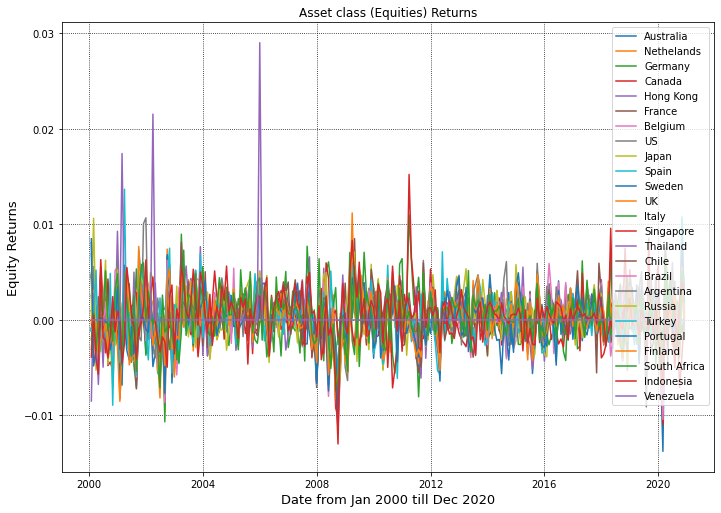

In [81]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Australia_R, label='Australia')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Germany_R, label='Germany')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Canada_R, label='Canada')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.France_R, label='France')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.US_R, label='US')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Japan_R, label='Japan')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Spain_R, label='Spain')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.UK_R, label='UK')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Italy_R, label='Italy')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Singapore_R, label='Singapore')

plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Thailand_R, label='Thailand')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Chile_R, label='Chile')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Brazil_R, label='Brazil')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Argentina_R, label='Argentina')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Russia_R, label='Russia')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Turkey_R, label='Turkey')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Portugal_R, label='Portugal')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Finland_R, label='Finland')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.South_Africa_R, label='South Africa')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Indonesia_R, label='Indonesia')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Venezuela_R, label='Venezuela')


plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [82]:
# Adding up all the returns of all asset classes for all countries

In [83]:
equity_df_2000_2020_2['Portfolio_R'] = equity_df_2000_2020_2['Australia_R'] + equity_df_2000_2020_2['Nethelands_R'] + equity_df_2000_2020_2['Germany_R'] + equity_df_2000_2020_2['Canada_R'] + equity_df_2000_2020_2['Hong_Kong_R'] + equity_df_2000_2020_2['France_R'] + equity_df_2000_2020_2['Belgium_R'] + equity_df_2000_2020_2['US_R'] + equity_df_2000_2020_2['Japan_R'] + equity_df_2000_2020_2['Spain_R'] + equity_df_2000_2020_2['Sweden_R'] + equity_df_2000_2020_2['UK_R'] + equity_df_2000_2020_2['Italy_R'] + equity_df_2000_2020_2['Singapore_R'] + equity_df_2000_2020_2['Thailand_R'] + equity_df_2000_2020_2['Chile_R'] + equity_df_2000_2020_2['Brazil_R'] + equity_df_2000_2020_2['Argentina_R'] + equity_df_2000_2020_2['Russia_R'] + equity_df_2000_2020_2['Turkey_R'] + equity_df_2000_2020_2['Portugal_R'] + equity_df_2000_2020_2['Finland_R'] + equity_df_2000_2020_2['South_Africa_R'] + equity_df_2000_2020_2['Indonesia_R'] + equity_df_2000_2020_2['Venezuela_R']

In [84]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [85]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2000_2020_2['Equity_Port_Value'] = ((equity_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [86]:
equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R', 'Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R',
                       'Turkey_R','Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                       'Venezuela_R', 'Portfolio_R', 'Equity_Port_Value']].head(5)

Australia_R  Nethelands_R  Germany_R  Canada_R  Hong_Kong_R  \
Date                                                                      
2000-02-01     0.000936      0.004001   0.004963  0.004723     0.004481   
2000-03-01     0.000181     -0.000141  -0.000248  0.002258     0.000587   
2000-04-01    -0.000363     -0.000065  -0.001019 -0.000750    -0.004609   
2000-05-01    -0.000725     -0.000420  -0.001725 -0.000632    -0.002206   
2000-06-01     0.004851      0.001199  -0.001247  0.006305     0.004166   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  ...  \
Date                                                           ...   
2000-02-01  0.004574  -0.001104 -0.001161  0.000973  0.006920  ...   
2000-03-01  0.000749   0.000595  0.005583  0.000857 -0.002215  ...   
2000-04-01  0.001036   0.000656 -0.001778 -0.005263 -0.001676  ...   
2000-05-01  0.000050   0.000661 -0.001265 -0.004135 -0.002911  ...   
2000-06-01  0.000154   0.001875  0.001381  0.002991 -0.000430  ...   

            Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                 
2000-02-01     0.002532  0.000457 -0.001161    0.008484   0.000067   
2000-03-01    -0.002167  0.010624 -0.000041   -0.004820  -0.000686   
2000-04-01    -0.002301 -0.001495  0.005209   -0.003159  -0.000251   
2000-05-01    -0.001946 -0.003420 -0.003942   -0.001412  -0.003727   
2000-06-01     0.001540 -0.003281 -0.002710    0.000232  -0.002068   

            South_Africa_R  Indonesia_R   Venezuela_R  Portfolio_R  \
Date                                                                 
2000-02-01       -0.003101    -0.003883 -6.759573e-06     0.030599   
2000-03-01        0.000691     0.000483 -9.495464e-06     0.018200   
2000-04-01       -0.003198    -0.004004  6.807074e-07    -0.034947   
2000-05-01        0.000058    -0.005678  4.130702e-06    -0.041713   
2000-06-01        0.002750     0.005526 -1.608099e-05     0.027610   

            Equity_Port_Value  
Date                           
2000-02-01        1030.599368  
2000-03-01        1049.356204  
2000-04-01        1012.684170  
2000-05-01         970.441703  
2000-06-01         997.235344  

[5 rows x 27 columns]

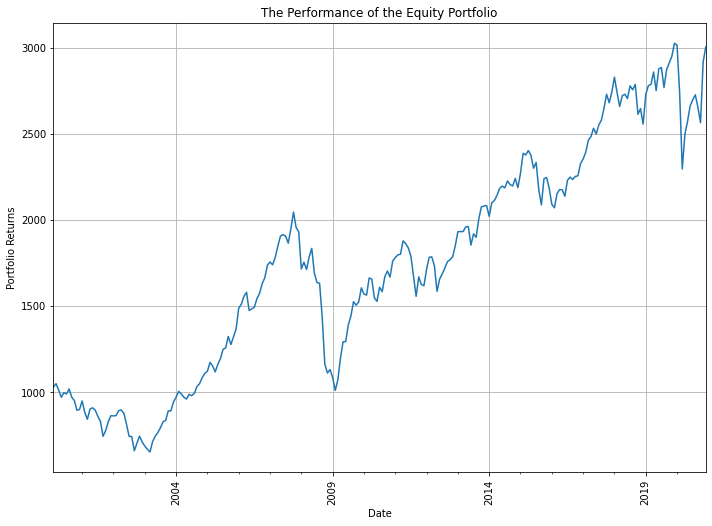

In [87]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Equity Portfolio');
plt.xlabel('Date FM Jan 2000 Till Dec 2020');
plt.ylabel('Portfolio Returns');
equity_df_2000_2020_2['Equity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [88]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2000_2020_2.Equity_Port_Value.max() - equity_df_2000_2020_2.Equity_Port_Value.min()) / equity_df_2000_2020_2.Equity_Port_Value.max()

0.7842757012894905

In [89]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2000_2020_2['Equity_Port_Value'][-1] / equity_df_2000_2020_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 191.53%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [90]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2000_2020_2['Monthly_Return'] = equity_df_2000_2020_2['Equity_Port_Value'].pct_change(1)

In [91]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2000_2020_2['Monthly_Return'].mean() / equity_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.12151185597289102

In [92]:
equity_df_2000_2020_2.shape[0]

251

In [93]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(251)
Annualized_Sharpe_Ratio

1.9251098453428908

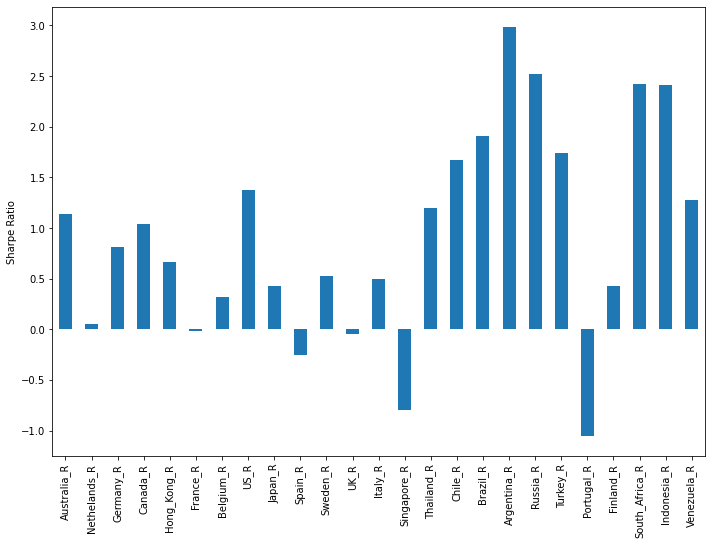

In [94]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 251 # 251 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [95]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [96]:
bond_df_2000_2020_2.shape[0]

251

In [97]:
equity_sortino_ratio(equity_df_2000_2020_2['Portfolio_R'], 251, .0164)

2.4159071390384677

In [98]:
Annualized_Sortino_Ratio = 2.4159071390384677 * np.sqrt(251)
Annualized_Sortino_Ratio

38.27516732058418

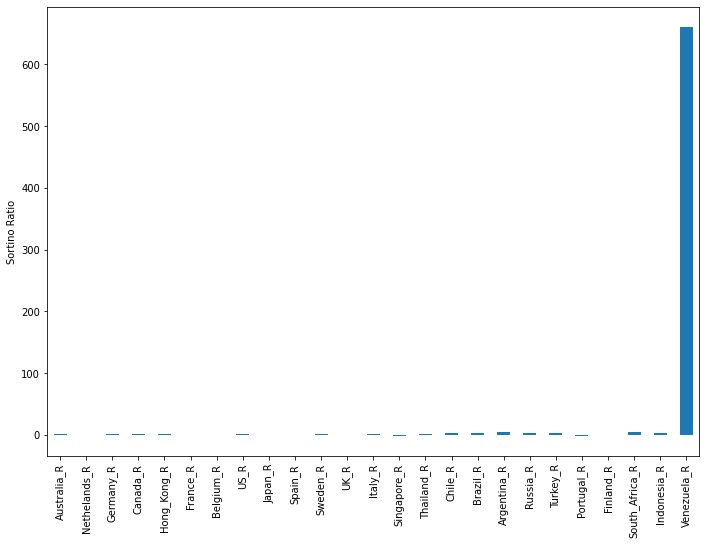

In [99]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 251 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

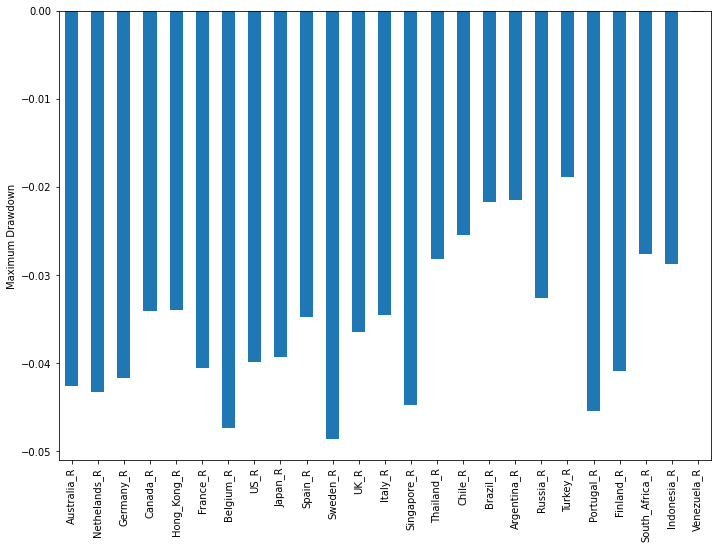

In [100]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [101]:
skew(equity_df_2000_2020_2['Equity_Port_Value'].dropna())

0.10898353029749955

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [102]:
kurtosis(equity_df_2000_2020_2['Equity_Port_Value'].dropna())

-1.0661755528966066

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [103]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [104]:
geometric_mean_return(equity_df_2000_2020_2['Portfolio_R'])

0.0

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [105]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [106]:
information_ratio(equity_df_2000_2020_2['Portfolio_R'], 0.0028904866596370766, 251)

0.003594185405457862

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till Dec 2020
- Target volatility 6.02 %.
- Maximum Drawdown 65.95 %.
- Cumulative return of the of portfolio 54.81 %
- Sharpe Ratio, or Risk-Adjusted Returns 12.15 %.
- Annualized Sharpe Ratio 100.92 %.
- Sortino ratio 200.41 %.
- Annualized Sortino Ratio 3800.27 %.
- Skewness 10.89 %.
- Kurtosis - 1.066.
- Geometric Mean Rate of Returns 0.00
- Information Ratio 00.35 %.

In [107]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2000_2020 = pd.read_csv('Commodity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2000_2020.head()

(252, 12)


Date   Gold    WTI  Heat_Oil  Natural_Gas  Silver  US_Coffee  US_Corn  \
0  1/1/2000  283.2  27.64      1.95       2662.0  5287.0      111.1   220.00   
1  2/1/2000  292.4  30.43      1.87       2761.0  5048.0       99.9   215.00   
2  3/1/2000  278.4  26.90      1.84       2945.0  5020.0      103.7   236.00   
3  4/1/2000  273.1  25.74      1.84       3141.0  4960.0       95.3   223.75   
4  5/1/2000  271.7  29.01      1.82       4356.0  4941.0       93.0   225.00   

    Wheat  Copper  Platinum   Cocoa  
0  256.25    0.84     971.4  2541.0  
1  247.00    0.79     900.4  2588.0  
2  262.25    0.80     933.7  2455.0  
3  242.25    0.79     883.4  2451.0  
4  274.75    0.81     931.7  2238.0

In [108]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         252 non-null    object 
 1   Gold         252 non-null    float64
 2   WTI          252 non-null    float64
 3   Heat_Oil     252 non-null    float64
 4   Natural_Gas  252 non-null    float64
 5   Silver       252 non-null    float64
 6   US_Coffee    252 non-null    float64
 7   US_Corn      252 non-null    float64
 8   Wheat        252 non-null    float64
 9   Copper       252 non-null    float64
 10  Platinum     252 non-null    float64
 11  Cocoa        252 non-null    float64
dtypes: float64(11), object(1)
memory usage: 23.8+ KB


In [109]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2000_2020['Date'] = pd.to_datetime(commodity_df_2000_2020.Date)

In [110]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2000_2020['Natural_Gas'] = commodity_df_2000_2020['Natural_Gas'].astype(float)
commodity_df_2000_2020['Silver'] = commodity_df_2000_2020['Silver'].astype(float)
commodity_df_2000_2020['Copper'] = commodity_df_2000_2020['Copper'].astype(float)
commodity_df_2000_2020['Cocoa'] = commodity_df_2000_2020['Cocoa'].astype(float)

In [111]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         252 non-null    datetime64[ns]
 1   Gold         252 non-null    float64       
 2   WTI          252 non-null    float64       
 3   Heat_Oil     252 non-null    float64       
 4   Natural_Gas  252 non-null    float64       
 5   Silver       252 non-null    float64       
 6   US_Coffee    252 non-null    float64       
 7   US_Corn      252 non-null    float64       
 8   Wheat        252 non-null    float64       
 9   Copper       252 non-null    float64       
 10  Platinum     252 non-null    float64       
 11  Cocoa        252 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 23.8 KB


In [112]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2000_2020.set_index('Date',inplace=True)

In [113]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2000_2020.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

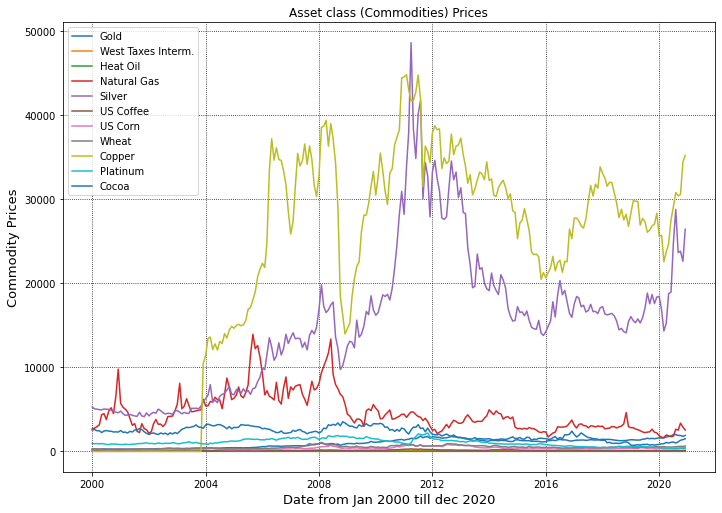

In [114]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Gold, label='Gold')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Silver, label='Silver')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Copper, label='Copper')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2020', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

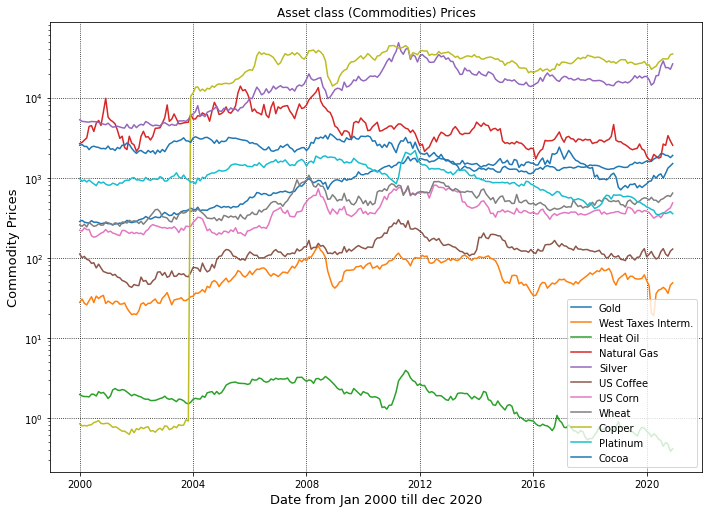

In [115]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Gold, label='Gold')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Silver, label='Silver')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Copper, label='Copper')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2020', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [116]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2000_2020 = commodity_df_2000_2020[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2000_2020.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-01-01       NaN       NaN       NaN          NaN       NaN        NaN   
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2000-01-01       NaN       NaN       NaN       NaN       NaN  
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  0.018497  
2000-03-01  0.097674  0.061741  0.012658  0.036984 -0.051391  
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872 -0.001629  
2000-05-01  0.005587  0.134159  0.025316  0.054675 -0.086903

In [117]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2000_2020.dropna(axis=0, inplace=True)
commodity_df_2000_2020.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   
2000-06-01  0.067722  0.120303  0.082418     0.027548  0.018620  -0.087634   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  0.018497  
2000-03-01  0.097674  0.061741  0.012658  0.036984 -0.051391  
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872 -0.001629  
2000-05-01  0.005587  0.134159  0.025316  0.054675 -0.086903  
2000-06-01 -0.166667 -0.055505  0.012346 -0.056671  0.079982

In [118]:
print('There are {} rows in the DataFrame'.format(commodity_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [119]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2000_2020_2 = commodity_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [120]:
vol_com_df_2000_2020 = commodity_df_2000_2020

In [121]:
vol_com_df_2000_2020.shape[0]

251

In [122]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2000_2020['Gold_Vol'] = vol_com_df_2000_2020['Gold'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['WTI_Vol'] = vol_com_df_2000_2020['WTI'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Heat_Oil_Vol'] = vol_com_df_2000_2020['Heat_Oil'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Natural_Gas_Vol'] = vol_com_df_2000_2020['Natural_Gas'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Silver_Vol'] = vol_com_df_2000_2020['Silver'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['US_Coffee_Vol'] = vol_com_df_2000_2020['US_Coffee'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['US_Corn_Vol'] = vol_com_df_2000_2020['US_Corn'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Wheat_Vol'] = vol_com_df_2000_2020['Wheat'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Copper_Vol'] = vol_com_df_2000_2020['Copper'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Platinum_Vol'] = vol_com_df_2000_2020['Platinum'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Cocoa_Vol'] = vol_com_df_2000_2020['Cocoa'].rolling(251).std() * math.sqrt(251)

In [123]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2000_2020.dropna(axis=0, inplace=True)

In [124]:
vol_com_df_2000_2020[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

Gold_Vol   WTI_Vol  Heat_Oil_Vol  Natural_Gas_Vol  Silver_Vol  \
Date                                                                        
2020-12-01  0.761646  1.800685      1.311096         2.473119     1.42329   

            US_Coffee_Vol  US_Corn_Vol  Wheat_Vol    Copper_Vol  Platinum_Vol  \
Date                                                                            
2020-12-01       1.458071     1.334751    1.40575  11460.530537      1.079163   

            Cocoa_Vol  
Date                   
2020-12-01   1.326298

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [125]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.761646+1.800685+1.311096+2.473119+1.42329+1.458071+1.334751+1.40575+11460.530537+1.079163+1.326298) / 11
volatility_com

1043.173127818182

In [126]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 1 / 11
commodity_target_vol

0.09090909090909091

In [127]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2000_2020 = commodity_df_2000_2020

In [128]:
port_com_df_2000_2020['Gold_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Gold_Vol']
port_com_df_2000_2020['WTI_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['WTI_Vol']
port_com_df_2000_2020['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Heat_Oil_Vol']
port_com_df_2000_2020['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Natural_Gas_Vol']
port_com_df_2000_2020['Silver_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Silver_Vol']
port_com_df_2000_2020['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['US_Coffee_Vol']
port_com_df_2000_2020['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['US_Corn_Vol']
port_com_df_2000_2020['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Wheat_Vol']
port_com_df_2000_2020['Copper_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Copper_Vol']
port_com_df_2000_2020['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Platinum_Vol']
port_com_df_2000_2020['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Cocoa_Vol']

In [129]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2000_2020.dropna(axis=0, inplace=True)

In [130]:
port_com_df_2000_2020[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

Gold_Alloc  WTI_Alloc  Heat_Oil_Alloc  Natural_Gas_Alloc  \
Date                                                                   
2020-12-01    0.119359   0.050486        0.069338           0.036759   

            Silver_Alloc  US_Coffee_Alloc  US_Corn_Alloc  Wheat_Alloc  \
Date                                                                    
2020-12-01      0.063873         0.062349       0.068109     0.064669   

            Copper_Alloc  Platinum_Alloc  Cocoa_Alloc  
Date                                                   
2020-12-01      0.000008         0.08424     0.068543

In [131]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [132]:
commodity_df_2000_2020_2['Gold_R'] = commodity_df_2000_2020_2['Gold'] * 0.119359
commodity_df_2000_2020_2['WTI_R'] = commodity_df_2000_2020_2['WTI'] * 0.050486
commodity_df_2000_2020_2['Heat_Oil_R'] = commodity_df_2000_2020_2['Heat_Oil'] * 0.069338
commodity_df_2000_2020_2['Natural_Gas_R'] = commodity_df_2000_2020_2['Natural_Gas'] * 0.036759
commodity_df_2000_2020_2['Silver_R'] = commodity_df_2000_2020_2['Silver'] * 0.063873
commodity_df_2000_2020_2['US_Coffee_R'] = commodity_df_2000_2020_2['US_Coffee'] * 0.062349
commodity_df_2000_2020_2['US_Corn_R'] = commodity_df_2000_2020_2['US_Corn'] * 0.068109
commodity_df_2000_2020_2['Wheat_R'] = commodity_df_2000_2020_2['Wheat'] * 0.064669
commodity_df_2000_2020_2['Copper_R'] = commodity_df_2000_2020_2['Copper'] * 0.000008
commodity_df_2000_2020_2['Platinum_R'] = commodity_df_2000_2020_2['Platinum'] * 0.08424 
commodity_df_2000_2020_2['Cocoa_R'] = commodity_df_2000_2020_2['Cocoa'] * 0.068543

In [133]:
commodity_df_2000_2020_2.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   
2000-06-01  0.067722  0.120303  0.082418     0.027548  0.018620  -0.087634   

             US_Corn     Wheat    Copper  Platinum  ...     WTI_R  Heat_Oil_R  \
Date                                                ...                         
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  ...  0.005096   -0.002845   
2000-03-01  0.097674  0.061741  0.012658  0.036984  ... -0.005857   -0.001112   
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872  ... -0.002177    0.000000   
2000-05-01  0.005587  0.134159  0.025316  0.054675  ...  0.006414   -0.000754   
2000-06-01 -0.166667 -0.055505  0.012346 -0.056671  ...  0.006074    0.005715   

            Natural_Gas_R  Silver_R  US_Coffee_R  US_Corn_R   Wheat_R  \
Date                                                                    
2000-02-01       0.001367 -0.002887    -0.006285  -0.001548 -0.002334   
2000-03-01       0.002450 -0.000354     0.002372   0.006653  0.003993   
2000-04-01       0.002446 -0.000763    -0.005050  -0.003535 -0.004932   
2000-05-01       0.014219 -0.000245    -0.001505   0.000380  0.008676   
2000-06-01       0.001013  0.001189    -0.005464  -0.011351 -0.003589   

                Copper_R  Platinum_R   Cocoa_R  
Date                                            
2000-02-01 -4.761905e-07   -0.006157  0.001268  
2000-03-01  1.012658e-07    0.003115 -0.003522  
2000-04-01 -1.000000e-07   -0.004538 -0.000112  
2000-05-01  2.025316e-07    0.004606 -0.005957  
2000-06-01  9.876543e-08   -0.004774  0.005482  

[5 rows x 22 columns]

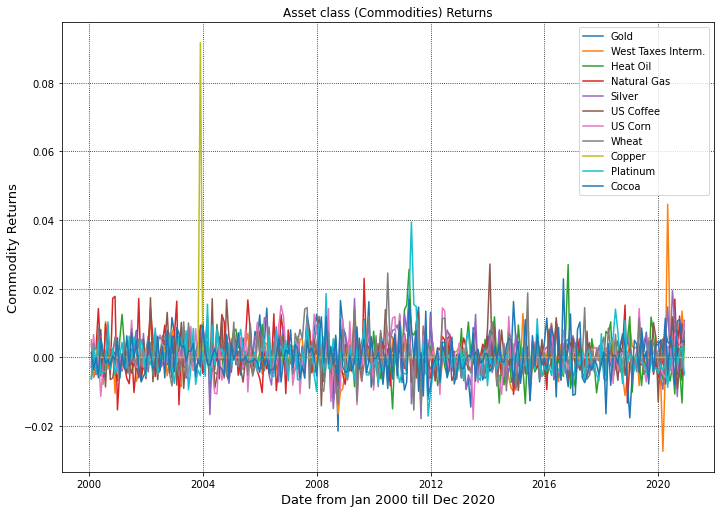

In [134]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Gold_R, label='Gold')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Silver_R, label='Silver')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Copper_R, label='Copper')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Cocoa_R, label='Cocoa')
plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [135]:
# Adding up all the returns of all asset classes for all commodities

In [136]:
commodity_df_2000_2020_2['Portfolio_R'] = commodity_df_2000_2020_2['Gold_R'] + commodity_df_2000_2020_2['WTI_R'] + commodity_df_2000_2020_2['Heat_Oil_R'] + commodity_df_2000_2020_2['Natural_Gas_R'] + commodity_df_2000_2020_2['Silver_R'] + commodity_df_2000_2020_2['US_Coffee_R'] + commodity_df_2000_2020_2['US_Corn_R'] + commodity_df_2000_2020_2['Wheat_R'] + commodity_df_2000_2020_2['Copper_R'] + commodity_df_2000_2020_2['Platinum_R'] + commodity_df_2000_2020_2['Cocoa_R']

In [137]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [138]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2000_2020_2['Commodity_Port_Value'] = ((commodity_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [139]:
commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

Gold_R     WTI_R  Heat_Oil_R  Natural_Gas_R  Silver_R  \
Date                                                                  
2000-02-01  0.003877  0.005096   -0.002845       0.001367 -0.002887   
2000-03-01 -0.005715 -0.005857   -0.001112       0.002450 -0.000354   
2000-04-01 -0.002272 -0.002177    0.000000       0.002446 -0.000763   
2000-05-01 -0.000612  0.006414   -0.000754       0.014219 -0.000245   
2000-06-01  0.008083  0.006074    0.005715       0.001013  0.001189   

            US_Coffee_R  US_Corn_R   Wheat_R      Copper_R  Platinum_R  \
Date                                                                     
2000-02-01    -0.006285  -0.001548 -0.002334 -4.761905e-07   -0.006157   
2000-03-01     0.002372   0.006653  0.003993  1.012658e-07    0.003115   
2000-04-01    -0.005050  -0.003535 -0.004932 -1.000000e-07   -0.004538   
2000-05-01    -0.001505   0.000380  0.008676  2.025316e-07    0.004606   
2000-06-01    -0.005464  -0.011351 -0.003589  9.876543e-08   -0.004774   

             Cocoa_R  Portfolio_R  Commodity_Port_Value  
Date                                                     
2000-02-01  0.001268    -0.010449            989.551087  
2000-03-01 -0.003522     0.002022            991.551539  
2000-04-01 -0.000112    -0.020934            970.794486  
2000-05-01 -0.005957     0.025224            995.281505  
2000-06-01  0.005482     0.002377            997.647248

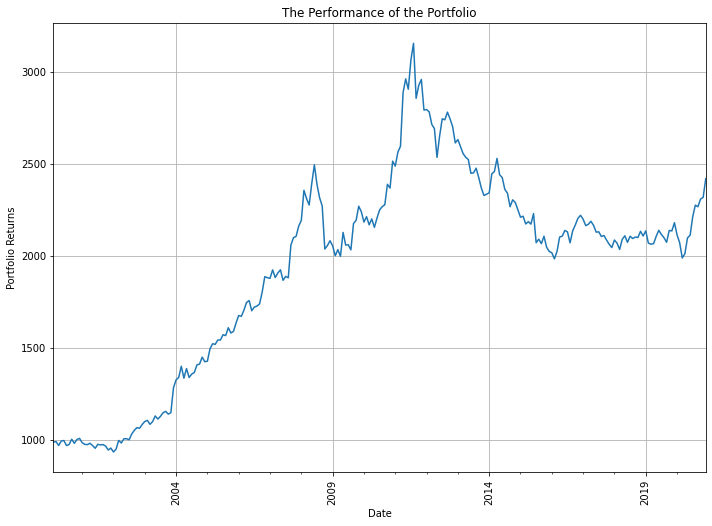

In [140]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2000_2020_2['Commodity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [141]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2000_2020_2.Commodity_Port_Value.max() - commodity_df_2000_2020_2.Commodity_Port_Value.min()) / commodity_df_2000_2020_2.Commodity_Port_Value.max()

0.7035685492683017

In [142]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2000_2020_2['Commodity_Port_Value'][-1] / commodity_df_2000_2020_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 144.58%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [143]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2000_2020_2['Monthly_Return'] = commodity_df_2000_2020_2['Commodity_Port_Value'].pct_change(1)

In [144]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2000_2020_2['Monthly_Return'].mean() / commodity_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.14465405857731078

In [145]:
commodity_df_2000_2020_2.shape[0]

251

In [146]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(251)
Annualized_Sharpe_Ratio

2.291751287200446

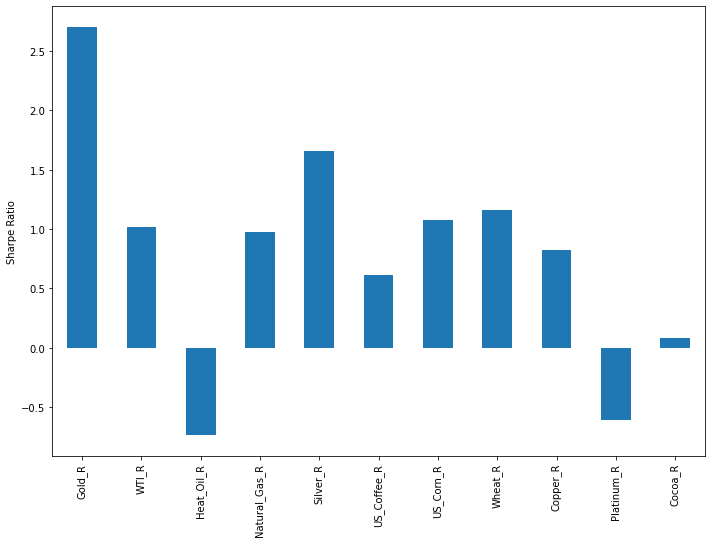

In [147]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 251 

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [148]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg


In [149]:
commodity_df_2000_2020_2.shape[0]

251

In [150]:
commodity_sortino_ratio(commodity_df_2000_2020_2['Portfolio_R'], 251, .0164)

3.6492501899168635

In [151]:
Annualized_Sortino_Ratio = 3.6492501899168635 * np.sqrt(251)
Annualized_Sortino_Ratio

57.8149960140159

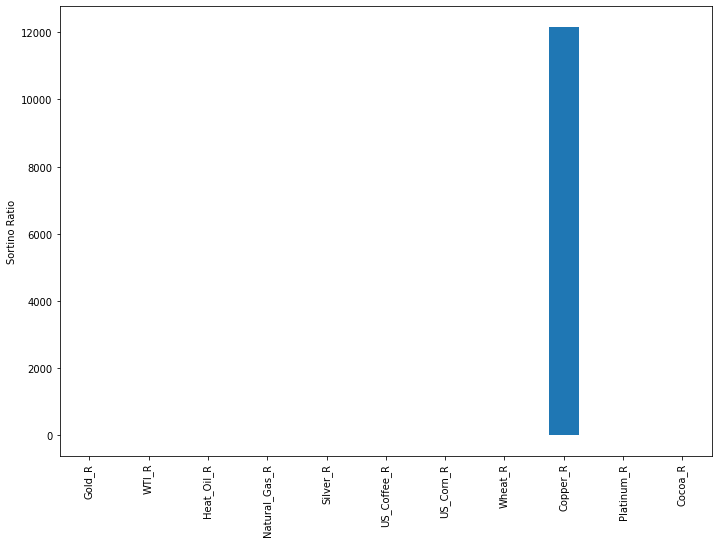

In [152]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 251 # 251 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

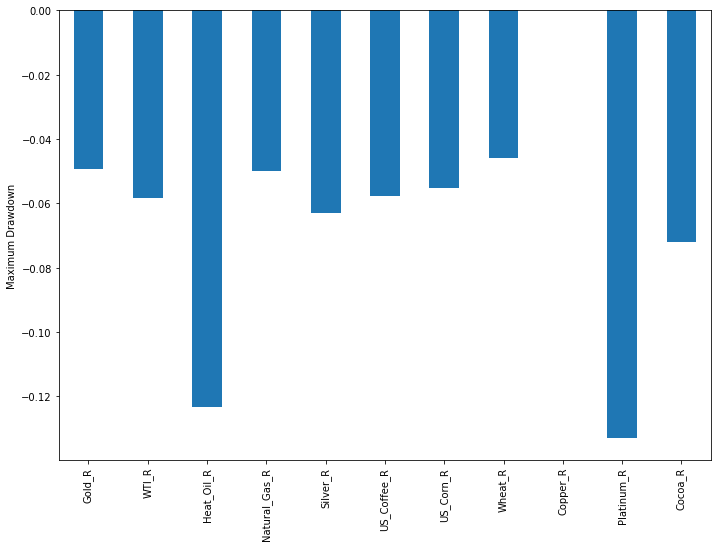

In [153]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [154]:
skew(commodity_df_2000_2020_2['Commodity_Port_Value'].dropna())

-0.4199655058028046

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [155]:
kurtosis(commodity_df_2000_2020_2['Commodity_Port_Value'].dropna())

-0.6915625984803087

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [156]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [157]:
geometric_mean_return(commodity_df_2000_2020_2['Portfolio_R'])

0.0

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [158]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [159]:
information_ratio(commodity_df_2000_2020_2['Portfolio_R'], 0.005049532125013798, 251)

-0.0026747520356587267

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2020.
- Target volatility 9 %.
- Maximum Drawdown 7 %.
- Cumulative return of the of portfolio 144.58 %
- Sharpe Ratio, or Risk-Adjusted Returns 14.46 %.
- Annualized Sharpe Ratio 5900.56 %.
- Sortino Ratio 300.64 %.
- Annualized Sortino Ratio 5700.81 %.
- Skewness - 41.99 %.
- Kurtosis - 69.15 %.
- Geometric Mean Rate of Return 0.00
- Information Ratio - 00.26 %.

In [160]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2000_2020 = pd.read_csv('Currency_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2000_2020.head()

(252, 6)


Date   AUD  EURO   CAD     JPY   GBP
0  1/1/2000  1.42  0.89  1.30  108.68  0.76
1  2/1/2000  1.48  0.91  1.33  109.51  0.77
2  3/1/2000  1.45  0.90  1.32  108.08  0.77
3  4/1/2000  1.48  0.92  1.32  108.09  0.81
4  5/1/2000  1.49  0.91  1.33  106.22  0.82

In [161]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   AUD     252 non-null    float64
 2   EURO    252 non-null    float64
 3   CAD     252 non-null    float64
 4   JPY     252 non-null    float64
 5   GBP     252 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.9+ KB


In [162]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2000_2020['Date'] = pd.to_datetime(currency_df_2000_2020.Date)

In [163]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   AUD     252 non-null    float64       
 2   EURO    252 non-null    float64       
 3   CAD     252 non-null    float64       
 4   JPY     252 non-null    float64       
 5   GBP     252 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.9 KB


In [164]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2000_2020.set_index('Date',inplace=True)

In [165]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2000_2020.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

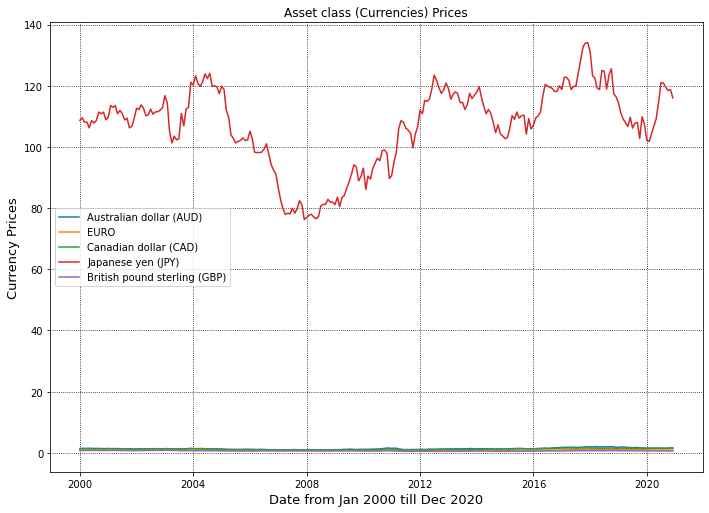

In [166]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.EURO, label='EURO')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

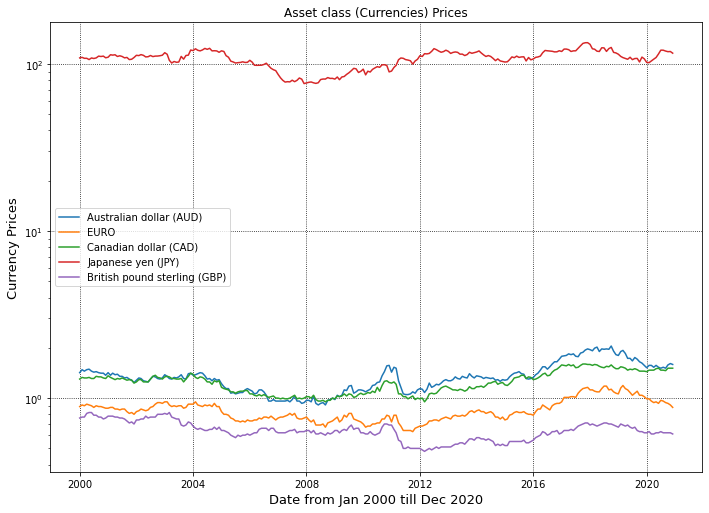

In [167]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.EURO, label='EURO')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [168]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2000_2020 = currency_df_2000_2020[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2000_2020.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2000-01-01       NaN       NaN       NaN       NaN       NaN
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346

In [169]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2000_2020.dropna(axis=0, inplace=True)
currency_df_2000_2020.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346
2000-06-01 -0.026846 -0.010989 -0.015038  0.022406  0.000000

In [170]:
print('There are {} rows in the DataFrame'.format(currency_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [171]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2000_2020_2 = currency_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [172]:
vol_curr_df_2000_2020 = currency_df_2000_2020

In [173]:
vol_curr_df_2000_2020.shape[0]

251

In [174]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2000_2020['AUD_Vol'] = vol_curr_df_2000_2020['AUD'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['EURO_Vol'] = vol_curr_df_2000_2020['EURO'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['CAD_Vol'] = vol_curr_df_2000_2020['CAD'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['JPY_Vol'] = vol_curr_df_2000_2020['JPY'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['GBP_Vol'] = vol_curr_df_2000_2020['GBP'].rolling(251).std() * math.sqrt(251)

In [175]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2000_2020.dropna(axis=0, inplace=True)

In [176]:
vol_curr_df_2000_2020[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

AUD_Vol  EURO_Vol   CAD_Vol   JPY_Vol  GBP_Vol
Date                                                       
2020-12-01  0.552509  0.454174  0.401976  0.434423  0.39769

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [177]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.552509+0.454174+0.401976+0.434423+0.39769) / 5
Avg_vol_curr

0.44815440000000006

In [178]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.44815440000000006 / 5
curr_target_vol

0.08963088000000001

In [179]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2000_2020 = currency_df_2000_2020

In [180]:
port_curr_df_2000_2020['AUD_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['AUD_Vol'] 
port_curr_df_2000_2020['EURO_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['EURO_Vol'] 
port_curr_df_2000_2020['CAD_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['CAD_Vol'] 
port_curr_df_2000_2020['JPY_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['JPY_Vol'] 
port_curr_df_2000_2020['GBP_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['GBP_Vol'] 

In [181]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2000_2020.dropna(axis=0, inplace=True)

In [182]:
port_curr_df_2000_2020[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

AUD_Alloc  EURO_Alloc  CAD_Alloc  JPY_Alloc  GBP_Alloc
Date                                                              
2020-12-01   0.162225    0.197349   0.222976   0.206322   0.225379

In [183]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [184]:
currency_df_2000_2020_2['AUD_R'] = currency_df_2000_2020_2['AUD'] * 0.162225
currency_df_2000_2020_2['EURO_R'] = currency_df_2000_2020_2['EURO'] * 0.197349
currency_df_2000_2020_2['CAD_R'] = currency_df_2000_2020_2['CAD'] * 0.222976
currency_df_2000_2020_2['JPY_R'] = currency_df_2000_2020_2['JPY'] * 0.206322
currency_df_2000_2020_2['GBP_R'] = currency_df_2000_2020_2['GBP'] * 0.225379

In [185]:
currency_df_2000_2020_2.head(5)

AUD      EURO       CAD       JPY       GBP     AUD_R  \
Date                                                                     
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158  0.006855   
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000 -0.003288   
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948  0.003356   
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346  0.001096   
2000-06-01 -0.026846 -0.010989 -0.015038  0.022406  0.000000 -0.004355   

              EURO_R     CAD_R     JPY_R     GBP_R  
Date                                                
2000-02-01  0.004435  0.005146  0.001576  0.002966  
2000-03-01 -0.002169 -0.001677 -0.002694  0.000000  
2000-04-01  0.004386  0.000000  0.000019  0.011708  
2000-05-01 -0.002145  0.001689 -0.003569  0.002782  
2000-06-01 -0.002169 -0.003353  0.004623  0.000000

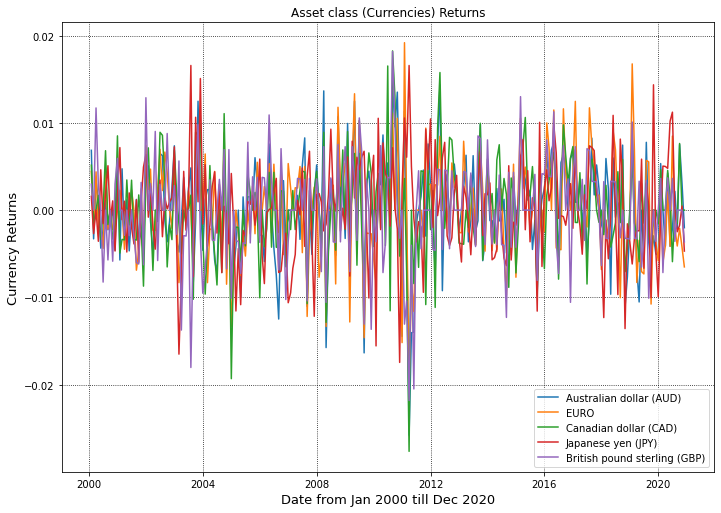

In [186]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.EURO_R, label='EURO')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.GBP_R, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [187]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [188]:
currency_df_2000_2020_2['Portfolio_R'] = currency_df_2000_2020_2['AUD_R'] + currency_df_2000_2020_2['EURO_R'] + currency_df_2000_2020_2['CAD_R'] + currency_df_2000_2020_2['JPY_R'] + currency_df_2000_2020_2['GBP_R']

In [189]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [190]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2000_2020_2['Currency_Port_Value'] = ((currency_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [191]:
currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

AUD_R    EURO_R     CAD_R     JPY_R     GBP_R  Portfolio_R  \
Date                                                                        
2000-02-01  0.006855  0.004435  0.005146  0.001576  0.002966     0.020976   
2000-03-01 -0.003288 -0.002169 -0.001677 -0.002694  0.000000    -0.009828   
2000-04-01  0.003356  0.004386  0.000000  0.000019  0.011708     0.019469   
2000-05-01  0.001096 -0.002145  0.001689 -0.003569  0.002782    -0.000147   
2000-06-01 -0.004355 -0.002169 -0.003353  0.004623  0.000000    -0.005254   

            Currency_Port_Value  
Date                             
2000-02-01          1020.976201  
2000-03-01          1010.942340  
2000-04-01          1030.624378  
2000-05-01          1030.473117  
2000-06-01          1025.059209

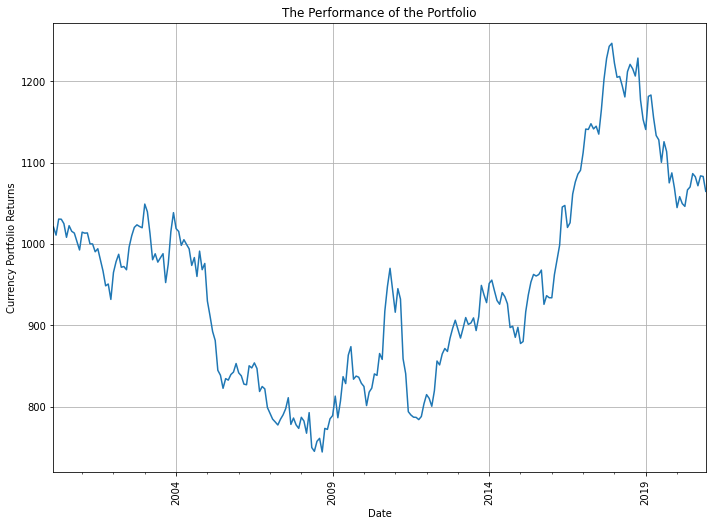

In [192]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007')
plt.ylabel('Currency Portfolio Returns')
currency_df_2000_2020_2['Currency_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [193]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2000_2020_2.Currency_Port_Value.max() - currency_df_2000_2020_2.Currency_Port_Value.min()) / currency_df_2000_2020_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.40 %


In [194]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2000_2020_2['Currency_Port_Value'][-1] / currency_df_2000_2020_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is 4.29 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [195]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2000_2020_2['Monthly_Return'] = currency_df_2000_2020_2['Currency_Port_Value'].pct_change(1)

In [196]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2000_2020_2['Monthly_Return'].mean() / currency_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.018397102799515917

In [197]:
currency_df_2000_2020_2.shape[0]

251

In [198]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(251)
Annualized_Sharpe_Ratio

0.29146492283876124

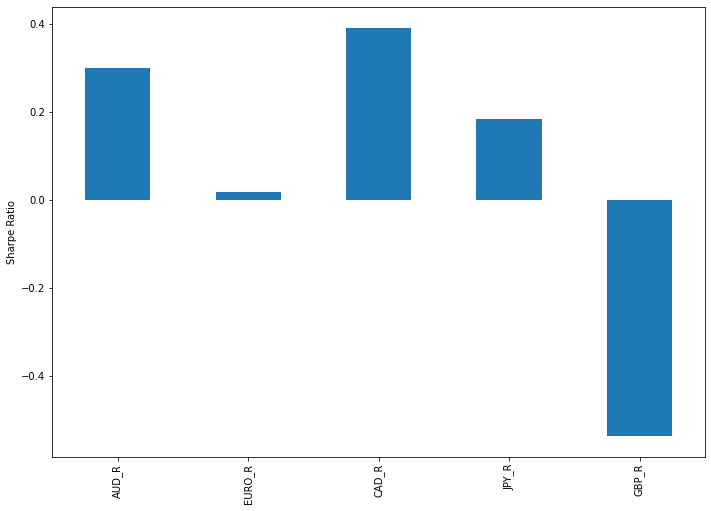

In [199]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 251 # 251 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [200]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [201]:
currency_df_2000_2020_2.shape[0]

251

In [202]:
currency_sortino_ratio(currency_df_2000_2020_2['Portfolio_R'], 251, .0164)

0.46547463858446814

In [203]:
Annualized_Sortino_Ratio = 0.46547463858446814 * np.sqrt(251)
Annualized_Sortino_Ratio

7.374505165128074

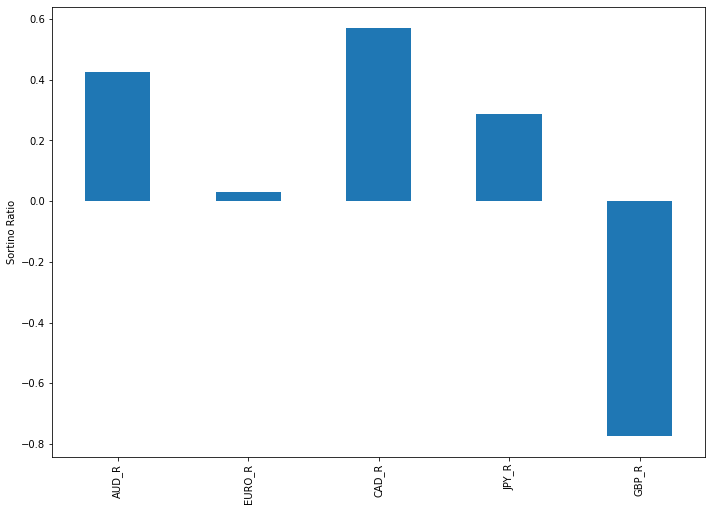

In [204]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 251 # 251 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

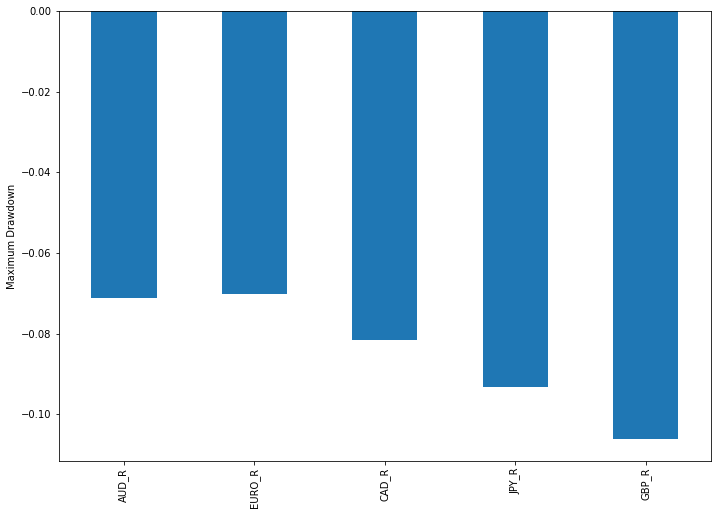

In [205]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [206]:
skew(currency_df_2000_2020_2['Currency_Port_Value'].dropna())

0.4094725643596055

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [207]:
kurtosis(currency_df_2000_2020_2['Currency_Port_Value'].dropna())

-0.6062546651380107

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [208]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [209]:
geometric_mean_return(currency_df_2000_2020_2['Portfolio_R'])

0.0

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [210]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [211]:
information_ratio(currency_df_2000_2020_2['Portfolio_R'], -1.3459081413687518e-05, 251)

0.001461818507747426

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till Dec 2020.
- Target volatility 8.96 %.
- Maximum Drawdown 40 %.
- Cumulative return of the of portfolio 4.29 %
- Sharpe Ratio, or Risk-Adjusted Return 1.83 %.
- Annualized Sharpe Ratio 29.14 %.
- Sortino ratio 46.54 %.
- Annualized Sortino Ratio 700.37%.
- Skewness 40.94 %.
- Kurtosis - 60.62 %.
- Geometric Mean Rate of Return 0.00
- Information Ration 00.14 %.

**Benchmark Dataset consists of:**
    
- The Benchmark Currency Index Value (Dow Jones FXCM Dollar Index)
- The Benchmark Equity Index Value (MSCI The World Index Value)
- The Benchmark Commodity Index Value (S & P GSCI Index (^SPGSCI))
- The Benchmark Bond Index Value (FTSE World Government Bond Index Ie 7-10Yr USD)

In [212]:
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
benchmark = pd.read_csv('Benchmark_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(benchmark.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
benchmark.head()

(252, 5)


Dates  benchmark_currency  benchmark_equity  benchmark_commodity  \
0  Jan-31-2000            12149.05           1802.43               206.37   
1  Feb-29-2000            12309.89           1737.72               216.01   
2  Mar-31-2000            12199.09           1875.56               206.88   
3  Apr-30-2000            12501.98           1840.97               203.21   
4  May-31-2000            12553.41           1852.01               223.20   

   benchmark_bond  
0          162.91  
1          162.91  
2          162.91  
3          167.36  
4          173.49

In [213]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dates                252 non-null    object 
 1   benchmark_currency   252 non-null    float64
 2   benchmark_equity     252 non-null    float64
 3   benchmark_commodity  252 non-null    float64
 4   benchmark_bond       252 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.0+ KB


In [214]:
# Use pandas.to_datetime() function to convert argument to datetime
benchmark['Dates'] = pd.to_datetime(benchmark.Dates)

In [215]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Dates                252 non-null    datetime64[ns]
 1   benchmark_currency   252 non-null    float64       
 2   benchmark_equity     252 non-null    float64       
 3   benchmark_commodity  252 non-null    float64       
 4   benchmark_bond       252 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


In [216]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
benchmark.set_index('Dates',inplace=True)

In [217]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
benchmark.isnull().any()

benchmark_currency     False
benchmark_equity       False
benchmark_commodity    False
benchmark_bond         False
dtype: bool

In [218]:
benchmark[['benchmark_currency','benchmark_equity','benchmark_commodity','benchmark_bond']].head(5)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2000-01-31            12149.05           1802.43               206.37   
2000-02-29            12309.89           1737.72               216.01   
2000-03-31            12199.09           1875.56               206.88   
2000-04-30            12501.98           1840.97               203.21   
2000-05-31            12553.41           1852.01               223.20   

            benchmark_bond  
Dates                       
2000-01-31          162.91  
2000-02-29          162.91  
2000-03-31          162.91  
2000-04-30          167.36  
2000-05-31          173.49

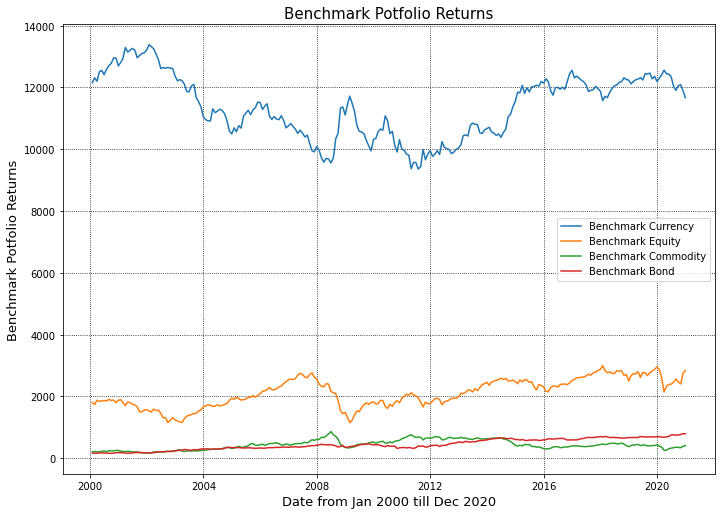

In [219]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
plt.plot(benchmark.index, benchmark.benchmark_equity, label='Benchmark Equity')
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')

plt.title('Benchmark Potfolio Returns', fontsize= 15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Benchmark Potfolio Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

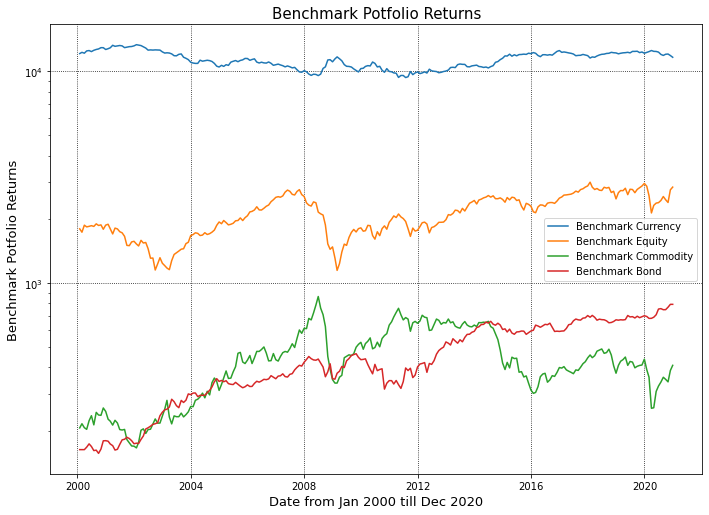

In [220]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
plt.plot(benchmark.index, benchmark.benchmark_equity, label='Benchmark Equity')
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')

plt.title('Benchmark Potfolio Returns', fontsize= 15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Benchmark Potfolio Returns', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

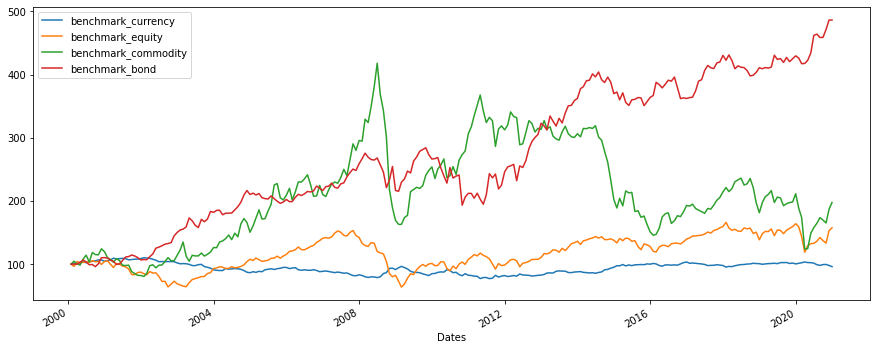

In [221]:
# Normalization of Benchmark dataset to 100
(benchmark /benchmark.iloc[0] * 100).plot(figsize =(15,6))
plt.show();

In [222]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_ben_curr = (benchmark['benchmark_currency'] / benchmark['benchmark_currency'].shift(1)) - 1
returns_ben_equi = (benchmark['benchmark_equity'] / benchmark['benchmark_equity'].shift(1)) - 1
returns_ben_comm = (benchmark['benchmark_commodity'] / benchmark['benchmark_commodity'].shift(1)) - 1
returns_ben_bond = (benchmark['benchmark_bond'] / benchmark['benchmark_bond'].shift(1)) - 1

In [223]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_ben_curr.dropna(axis=0, inplace=True)
returns_ben_equi.dropna(axis=0, inplace=True)
returns_ben_comm.dropna(axis=0, inplace=True)
returns_ben_bond.dropna(axis=0, inplace=True)

In [224]:
# Calculate the arithmetic mean of returns of all asset class on a portfolio of Benchmark
returns_ben_curr_mean = np.mean(returns_ben_curr)
returns_ben_equi_mean = np.mean(returns_ben_equi)
returns_ben_comm_mean = np.mean(returns_ben_comm) 
returns_ben_bond_mean = np.mean(returns_ben_bond)

In [225]:
returns_ben_curr_mean, returns_ben_equi_mean, returns_ben_comm_mean, returns_ben_bond_mean  

(-1.3459081413687518e-05,
 0.0028904866596370766,
 0.005049532125013798,
 0.007070627941609504)

In [226]:
# Calculate the standard deviation of returns of all asset class on a portfolio of Benchmark
returns_ben_curr_sigma = np.std(returns_ben_curr)
returns_ben_equi_sigma = np.std(returns_ben_equi)
returns_ben_comm_sigma = np.std(returns_ben_comm) 
returns_ben_bond_sigma = np.std(returns_ben_bond)

In [227]:
returns_ben_curr_sigma, returns_ben_equi_sigma, returns_ben_comm_sigma, returns_ben_bond_sigma  

(0.017220643883393335,
 0.04600355490650388,
 0.06723273443467039,
 0.038473563067949516)

**Skewness**

In [228]:
skew(benchmark['benchmark_bond'].dropna())

0.09118223292462091

In [229]:
skew(benchmark['benchmark_equity'].dropna())

-0.1093932643880134

In [230]:
skew(benchmark['benchmark_commodity'].dropna())

0.2761675936550568

In [231]:
skew(benchmark['benchmark_currency'].dropna())

-0.06709096239800152

**Kurtosis**

In [232]:
kurtosis(benchmark['benchmark_bond'].dropna())

-1.1754883424316862

In [233]:
kurtosis(benchmark['benchmark_equity'].dropna())

-0.9924331508562019

In [234]:
kurtosis(benchmark['benchmark_commodity'].dropna())

-0.7666667031287093

In [235]:
kurtosis(benchmark['benchmark_currency'].dropna())

-1.0589497829304313

In [236]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [237]:
geometric_mean_return(returns_ben_bond)

0.0

In [238]:
geometric_mean_return(returns_ben_equi)

0.0

In [239]:
geometric_mean_return(returns_ben_comm)

0.0

In [240]:
geometric_mean_return(returns_ben_curr)

0.0

**Volatility**

In [241]:
Bond_Volatility = np.std(returns_ben_bond) * np.sqrt(251)
Bond_Volatility

0.609535871660574

In [242]:
Equity_Volatility = np.std(returns_ben_equi) * np.sqrt(251)
Equity_Volatility

0.728833378127652

In [243]:
Commodity_Volatility = np.std(returns_ben_comm) * np.sqrt(251)
Commodity_Volatility

1.0651668345711347

In [244]:
Currency_Volatility = np.std(returns_ben_curr) * np.sqrt(251)
Currency_Volatility

0.2728263083271511

In [245]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [246]:
Sharpe_Ratio(returns_ben_bond, 251, 0.0164) # Annualized Sharpe Ratio of Benchmark Bond

2.878947006446663

In [247]:
Sharpe_Ratio(returns_ben_equi, 251, 0.0164) # Annualized Sharpe Ratio of Benchmark Equity

0.9710013139408447

In [248]:
Sharpe_Ratio(returns_ben_comm, 251, 0.0164) # Annualized Sharpe Ratio of Benchmark Commodity

1.1721525107532935

In [249]:
Sharpe_Ratio(returns_ben_curr, 251, 0.0164) # Annualized Sharpe Ratio of Benchmark Currency

-0.07234929568261532

In [250]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [251]:
Sortino_Ratio(returns_ben_bond, 251, 0.0164) # Annualized Sortino Ratio of Benchmark Bond

3.73651592687125

In [252]:
Sortino_Ratio(returns_ben_equi, 251, 0.0164) # Annualized Sortino Ratio of Benchmark Equity

1.267843037097383

In [253]:
Sortino_Ratio(returns_ben_comm, 251, 0.0164) # Annualized Sortino Ratio of Benchmark Commodity

1.5849020219287988

In [254]:
Sortino_Ratio(returns_ben_curr, 251, 0.0164) # Annualized Sortino Ratio of Benchmark Currency

-0.12780027387156306

**Cumulative Return**

In [255]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (benchmark['benchmark_bond'][-1] /benchmark['benchmark_bond'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 386.39%


In [256]:
# Calculate the cumulative return of equity 
cululative_return = 100 * (benchmark['benchmark_equity'][-1] /benchmark['benchmark_equity'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 57.50%


In [257]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (benchmark['benchmark_commodity'][-1] /benchmark['benchmark_commodity'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 97.62%


In [258]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (benchmark['benchmark_currency'][-1] /benchmark['benchmark_currency'][0]-1)
print("The Cumulative Return of the Currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the Currency is -3.95%


**Conclusion on a Portfolio of Benchmark**

**Arithmetic Mean**

- Benchmark Bond -1.3459081413687518e-05
- Benchmark Equity 0.0028904866596370766 
- Benchmark Commodity 0.005049532125013798 
- Benchmark Currency 0.007070627941609504

**Standard Deviation**

- Benchmark Bond 0.017220643883393335
- Benchmark Equity 0.04600355490650388 
- Benchmark Commodity 0.06723273443467039
- Benchmark Currency 0.038473563067949516

**Skewness**

- Benchmark Bond 0.09118223292462091
- Benchmark Equity -0.1093932643880134
- Benchmark Commodity 0.2761675936550568
- Benchmark Currency -0.06709096239800152

**Kurtosis**

- Benchmark Bond -1.1754883424316862
- Benchmark Equity -0.9924331508562019
- Benchmark Commodity -0.7666667031287093
- Benchmark Currency -1.0589497829304313

**Geometric Mean Rate of Returns**

- Benchmark Bond 0.00
- Benchmark Equity 0.00
- Benchmark Commodity 0.00
- Benchmark Currency 0.00

**Volatility**

- Benchmark Bond 0.609535871660574
- Benchmark Equity 0.728833378127652
- Benchmark Commodity 1.0651668345711347
- Benchmark Currency 0.2728263083271511

**Annualized Sharpe Ratio**

- Benchmark Bond 2.878947006446663
- Benchmark Equity 0.9710013139408447
- Benchmark Commodity 1.1721525107532935
- Benchmark Currency -0.07234929568261532

**Annualized Sortino Ratio**

- Benchmark Bond 3.73651592687125
- Benchmark Equity 1.267843037097383 
- Benchmark Commodity 1.5849020219287988
- Benchmark Currency -0.12780027387156306

**Cumulative Return**

- Benchmark Bond 386.39%
- Benchmark Equity 63.37%
- Benchmark Commodity 88.80%
- Benchmark Currency -5.21%


<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [259]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_benchmark_2000_2020 = pd.concat([bond_df_2000_2020_2['Bond_Port_Value'],
                               equity_df_2000_2020_2['Equity_Port_Value'],
                               commodity_df_2000_2020_2['Commodity_Port_Value'],
                               currency_df_2000_2020_2['Currency_Port_Value'],
                               benchmark['benchmark_currency'],
                               benchmark['benchmark_equity'],
                               benchmark['benchmark_commodity'],
                               benchmark['benchmark_bond']],
                               axis=1).reindex(bond_df_2000_2020_2.index)

mix_port_benchmark_2000_2020

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   
2000-05-01      1043.937533         970.441703            995.281505   
2000-06-01      1045.487827         997.235344            997.647248   
...                     ...                ...                   ...   
2020-08-01      1184.423024        2726.683418           2276.526089   
2020-09-01      1170.007890        2654.334209           2267.912736   
2020-10-01      1165.022703        2564.756158           2309.457935   
2020-11-01      1167.332009        2917.046318           2318.597931   
2020-12-01      1165.489231        3004.482432           2420.262454   

            Currency_Port_Value  benchmark_currency  benchmark_equity  \
Date                                                                    
2000-02-01          1020.976201                 NaN               NaN   
2000-03-01          1010.942340                 NaN               NaN   
2000-04-01          1030.624378                 NaN               NaN   
2000-05-01          1030.473117                 NaN               NaN   
2000-06-01          1025.059209                 NaN               NaN   
...                         ...                 ...               ...   
2020-08-01          1082.654380                 NaN               NaN   
2020-09-01          1071.585562                 NaN               NaN   
2020-10-01          1083.726107                 NaN               NaN   
2020-11-01          1082.974582                 NaN               NaN   
2020-12-01          1064.727045                 NaN               NaN   

            benchmark_commodity  benchmark_bond  
Date                                             
2000-02-01                  NaN             NaN  
2000-03-01                  NaN             NaN  
2000-04-01                  NaN             NaN  
2000-05-01                  NaN             NaN  
2000-06-01                  NaN             NaN  
...                         ...             ...  
2020-08-01                  NaN             NaN  
2020-09-01                  NaN             NaN  
2020-10-01                  NaN             NaN  
2020-11-01                  NaN             NaN  
2020-12-01                  NaN             NaN  

[251 rows x 8 columns]

In [260]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2000_2020 = pd.concat([bond_df_2000_2020_2['Bond_Port_Value'],
                               equity_df_2000_2020_2['Equity_Port_Value'],
                               commodity_df_2000_2020_2['Commodity_Port_Value'],
                               currency_df_2000_2020_2['Currency_Port_Value']],
                               axis=1).reindex(bond_df_2000_2020_2.index)

mix_port_2000_2020

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   
2000-05-01      1043.937533         970.441703            995.281505   
2000-06-01      1045.487827         997.235344            997.647248   
...                     ...                ...                   ...   
2020-08-01      1184.423024        2726.683418           2276.526089   
2020-09-01      1170.007890        2654.334209           2267.912736   
2020-10-01      1165.022703        2564.756158           2309.457935   
2020-11-01      1167.332009        2917.046318           2318.597931   
2020-12-01      1165.489231        3004.482432           2420.262454   

            Currency_Port_Value  
Date                             
2000-02-01          1020.976201  
2000-03-01          1010.942340  
2000-04-01          1030.624378  
2000-05-01          1030.473117  
2000-06-01          1025.059209  
...                         ...  
2020-08-01          1082.654380  
2020-09-01          1071.585562  
2020-10-01          1083.726107  
2020-11-01          1082.974582  
2020-12-01          1064.727045  

[251 rows x 4 columns]

In [261]:
mix_port_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2000-02-01 to 2020-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bond_Port_Value       251 non-null    float64
 1   Equity_Port_Value     251 non-null    float64
 2   Commodity_Port_Value  251 non-null    float64
 3   Currency_Port_Value   251 non-null    float64
dtypes: float64(4)
memory usage: 19.8 KB


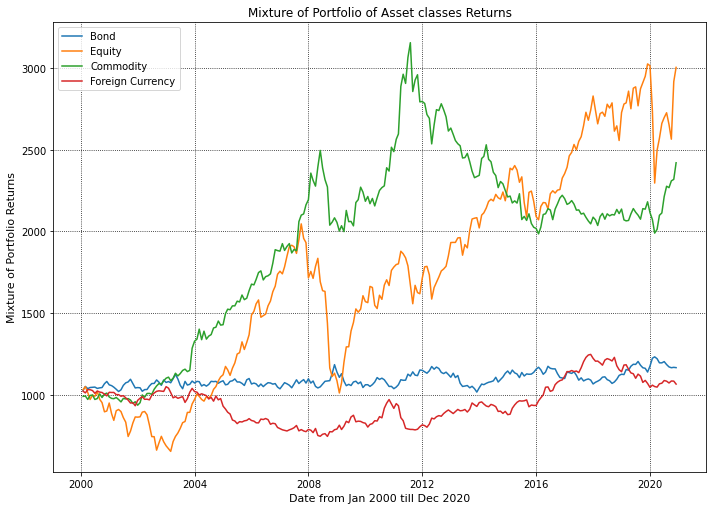

In [262]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

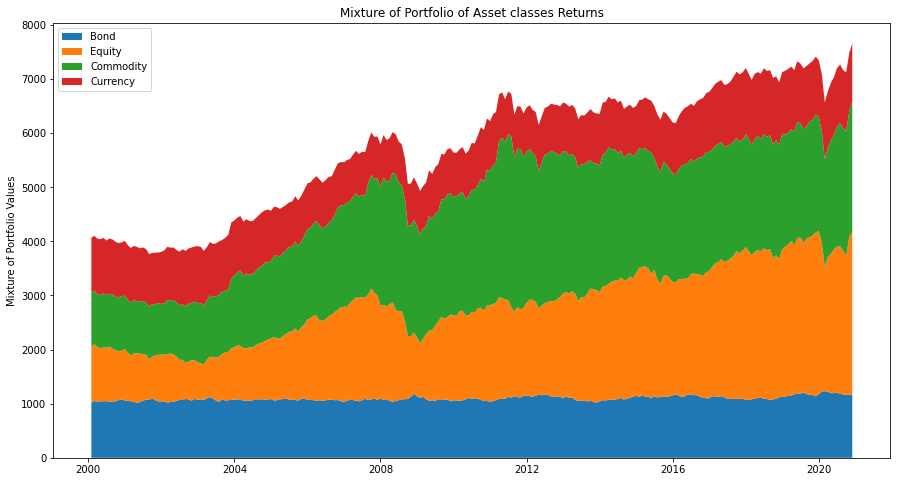

In [263]:
rcParams['figure.figsize'] = 15,8

x = mix_port_2000_2020.index
y1 = mix_port_2000_2020.Bond_Port_Value
y2 = mix_port_2000_2020.Equity_Port_Value
y3 = mix_port_2000_2020.Commodity_Port_Value
y4 = mix_port_2000_2020.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [264]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
mix_port_2000_2020.describe()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
count       251.000000         251.000000            251.000000   
mean       1094.249978        1741.322882           1935.385429   
std          44.032706         654.544696            548.079676   
min        1015.691326         652.733828            935.477286   
25%        1062.067635        1114.636384           1533.742481   
50%        1082.470464        1737.304130           2091.774905   
75%        1125.800485        2232.635985           2269.569664   
max        1231.575737        3025.777958           3155.796335   

       Currency_Port_Value  
count           251.000000  
mean            951.212603  
std             124.245172  
min             744.447087  
25%             840.502809  
50%             948.614895  
75%            1022.020908  
max            1246.631355

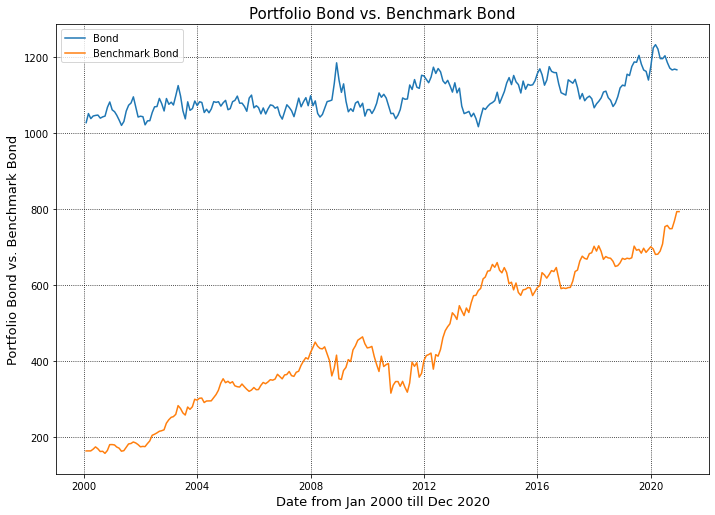

In [265]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Bond_Port_Value, label='Bond')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')
                               
plt.title('Portfolio Bond vs. Benchmark Bond', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Portfolio Bond vs. Benchmark Bond', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

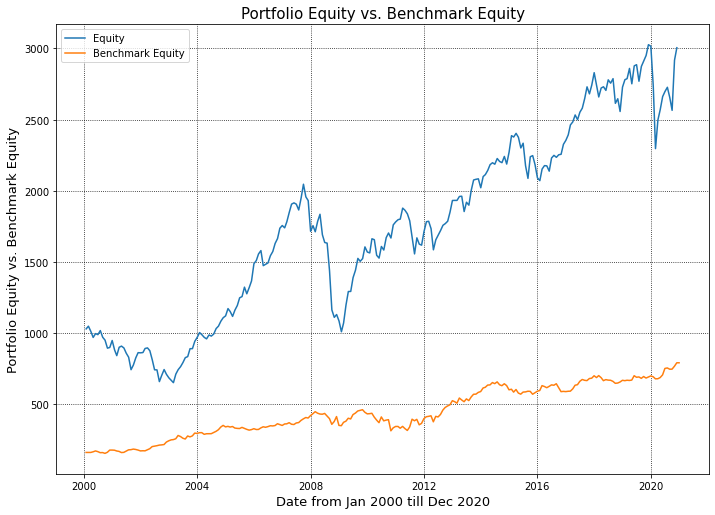

In [266]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Equity_Port_Value, label='Equity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Equity')
                               
plt.title('Portfolio Equity vs. Benchmark Equity', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Portfolio Equity vs. Benchmark Equity', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

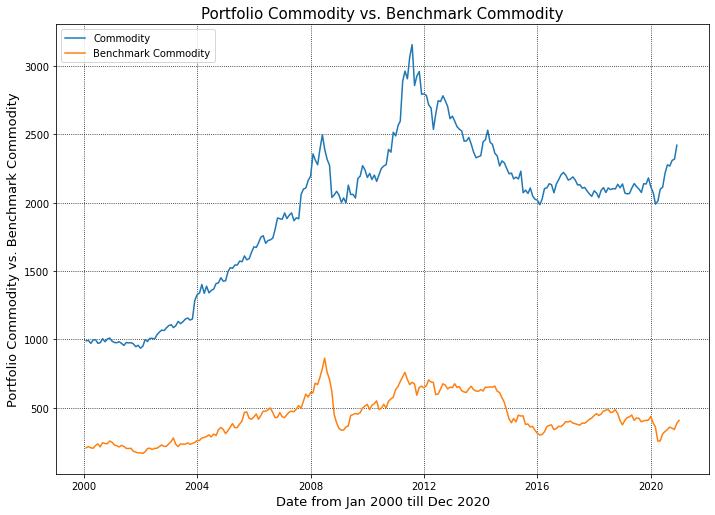

In [267]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Commodity_Port_Value, label='Commodity')                               
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
                               
plt.title('Portfolio Commodity vs. Benchmark Commodity', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Portfolio Commodity vs. Benchmark Commodity', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

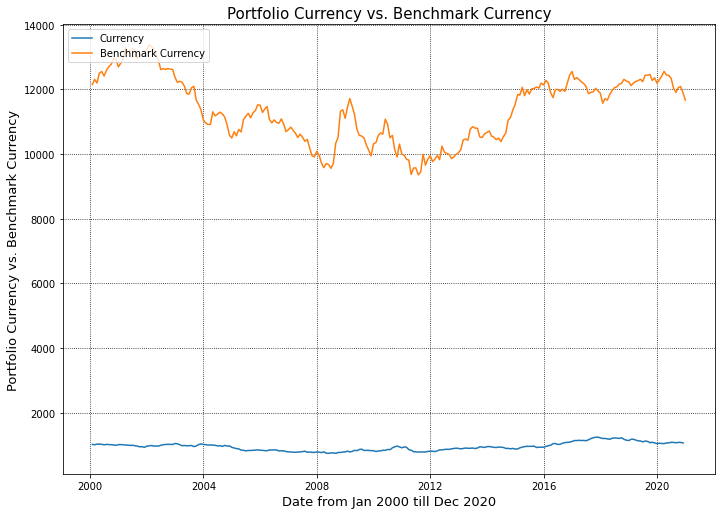

In [268]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Currency_Port_Value, label='Currency')
plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
                               
plt.title('Portfolio Currency vs. Benchmark Currency', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Portfolio Currency vs. Benchmark Currency', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

<h4><center> Active Strategies</center></h4>

**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [269]:
1/4

0.25

In [270]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2000_2020 = mix_port_2000_2020.copy()

In [271]:
Risk_Parity_Strategy_2000_2020['Bond_Port_Value_25%'] = Risk_Parity_Strategy_2000_2020['Bond_Port_Value'] * .25
Risk_Parity_Strategy_2000_2020['Equity_Port_Value_25%'] = Risk_Parity_Strategy_2000_2020['Equity_Port_Value'] * .25
Risk_Parity_Strategy_2000_2020['Commodity_Value_25%'] = Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'] * .25
Risk_Parity_Strategy_2000_2020['Currency_Value_25%'] = Risk_Parity_Strategy_2000_2020['Currency_Port_Value'] * .25

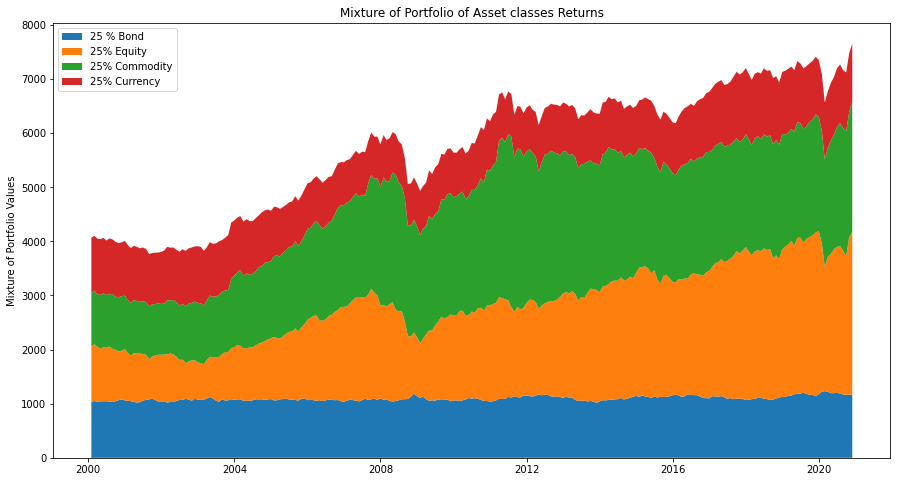

In [272]:
rcParams['figure.figsize'] = 15,8

x = Risk_Parity_Strategy_2000_2020.index
y1 = Risk_Parity_Strategy_2000_2020.Bond_Port_Value
y2 = Risk_Parity_Strategy_2000_2020.Equity_Port_Value
y3 = Risk_Parity_Strategy_2000_2020.Commodity_Port_Value
y4 = Risk_Parity_Strategy_2000_2020.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["25 % Bond", "25% Equity", "25% Commodity","25% Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [273]:
Risk_Parity_Strategy_2000_2020.head()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   
2000-05-01      1043.937533         970.441703            995.281505   
2000-06-01      1045.487827         997.235344            997.647248   

            Currency_Port_Value  Bond_Port_Value_25%  Equity_Port_Value_25%  \
Date                                                                          
2000-02-01          1020.976201           256.630632             257.649842   
2000-03-01          1010.942340           262.584531             262.339051   
2000-04-01          1030.624378           259.266055             253.171042   
2000-05-01          1030.473117           260.984383             242.610426   
2000-06-01          1025.059209           261.371957             249.308836   

            Commodity_Value_25%  Currency_Value_25%  
Date                                                 
2000-02-01           247.387772          255.244050  
2000-03-01           247.887885          252.735585  
2000-04-01           242.698622          257.656095  
2000-05-01           248.820376          257.618279  
2000-06-01           249.411812          256.264802

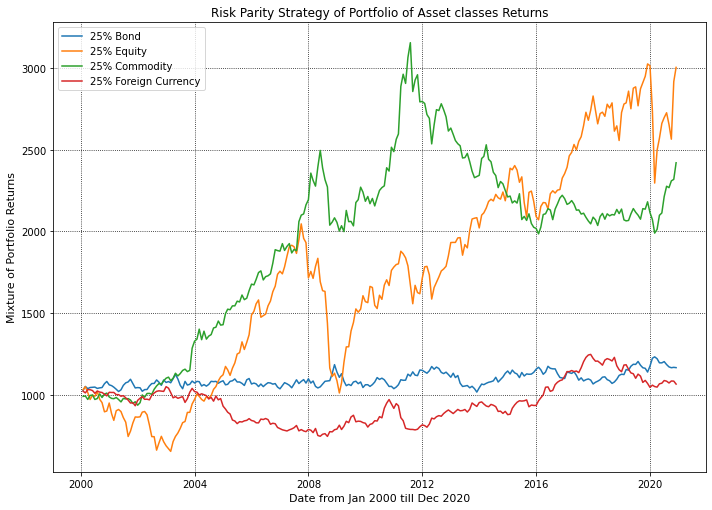

In [274]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Bond_Port_Value, label='25% Bond')
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Equity_Port_Value, label='25% Equity')
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Commodity_Port_Value, label='25% Commodity')                               
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Currency_Port_Value, label='25% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

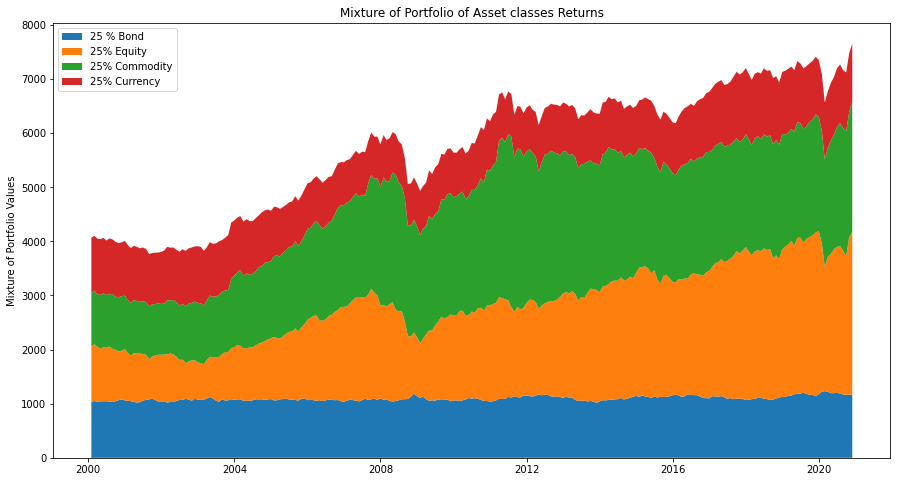

In [275]:
rcParams['figure.figsize'] = 15,8

x = Risk_Parity_Strategy_2000_2020.index
y1 = Risk_Parity_Strategy_2000_2020.Bond_Port_Value
y2 = Risk_Parity_Strategy_2000_2020.Equity_Port_Value
y3 = Risk_Parity_Strategy_2000_2020.Commodity_Port_Value
y4 = Risk_Parity_Strategy_2000_2020.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["25 % Bond", "25% Equity", "25% Commodity","25% Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [276]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Risk_Parity_Strategy_2000_2020[['Bond_Port_Value','Equity_Port_Value','Commodity_Port_Value','Currency_Port_Value']].describe()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
count       251.000000         251.000000            251.000000   
mean       1094.249978        1741.322882           1935.385429   
std          44.032706         654.544696            548.079676   
min        1015.691326         652.733828            935.477286   
25%        1062.067635        1114.636384           1533.742481   
50%        1082.470464        1737.304130           2091.774905   
75%        1125.800485        2232.635985           2269.569664   
max        1231.575737        3025.777958           3155.796335   

       Currency_Port_Value  
count           251.000000  
mean            951.212603  
std             124.245172  
min             744.447087  
25%             840.502809  
50%             948.614895  
75%            1022.020908  
max            1246.631355

In [277]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_RP_curr = (Risk_Parity_Strategy_2000_2020['Currency_Port_Value'] / Risk_Parity_Strategy_2000_2020['Currency_Port_Value'].shift(1)) - 1
returns_RP_equi = (Risk_Parity_Strategy_2000_2020['Equity_Port_Value'] / Risk_Parity_Strategy_2000_2020['Equity_Port_Value'].shift(1)) - 1
returns_RP_comm = (Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'] / Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'].shift(1)) - 1
returns_RP_bond = (Risk_Parity_Strategy_2000_2020['Bond_Port_Value'] / Risk_Parity_Strategy_2000_2020['Bond_Port_Value'].shift(1)) - 1

In [278]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_RP_curr.dropna(axis=0, inplace=True)
returns_RP_equi.dropna(axis=0, inplace=True)
returns_RP_comm.dropna(axis=0, inplace=True)
returns_RP_bond.dropna(axis=0, inplace=True)

**Skewness**

In [279]:
skew(Risk_Parity_Strategy_2000_2020['Bond_Port_Value'].dropna())

0.758228313103254

In [280]:
skew(Risk_Parity_Strategy_2000_2020['Equity_Port_Value'].dropna())

0.10898353029749955

In [281]:
skew(Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'].dropna())

-0.4199655058028046

In [282]:
skew(Risk_Parity_Strategy_2000_2020['Currency_Port_Value'].dropna())

0.4094725643596055

**Kurtosis**

In [283]:
kurtosis(Risk_Parity_Strategy_2000_2020['Bond_Port_Value'].dropna())

-0.030775911509568488

In [284]:
kurtosis(Risk_Parity_Strategy_2000_2020['Equity_Port_Value'].dropna())

-1.0661755528966066

In [285]:
kurtosis(Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'].dropna())

-0.6915625984803087

In [286]:
kurtosis(Risk_Parity_Strategy_2000_2020['Currency_Port_Value'].dropna())

-0.6062546651380107

In [287]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [288]:
geometric_mean_return(returns_RP_bond)

0.0

In [289]:
geometric_mean_return(returns_RP_equi)

0.0

In [290]:
geometric_mean_return(returns_RP_comm)

0.0

In [291]:
geometric_mean_return(returns_RP_curr)

0.0

**Volatility**

In [292]:
Bond_Volatility = np.std(returns_RP_bond) * np.sqrt(250)
Bond_Volatility

0.2669766374848689

In [293]:
Equity_Volatility = np.std(returns_RP_equi) * np.sqrt(250)
Equity_Volatility

0.6797148542858663

In [294]:
Commodity_Volatility = np.std(returns_RP_comm) * np.sqrt(250)
Commodity_Volatility

0.43120608038507263

In [295]:
Currency_Volatility = np.std(returns_RP_curr) * np.sqrt(250)
Currency_Volatility

0.31957874349511667

In [296]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [297]:
Sharpe_Ratio(returns_RP_bond, 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

0.5464821563881359

In [298]:
Sharpe_Ratio(returns_RP_equi, 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

1.8971916772238573

In [299]:
Sharpe_Ratio(returns_RP_comm, 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

2.2492247725226426

In [300]:
Sharpe_Ratio(returns_RP_curr, 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

0.23966891813178345

In [301]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [302]:
Sortino_Ratio(returns_RP_bond, 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

1.0066570597562299

In [303]:
Sortino_Ratio(returns_RP_equi, 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

2.3647343271698458

In [304]:
Sortino_Ratio(returns_RP_comm, 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

3.6832849186855343

In [305]:
Sortino_Ratio(returns_RP_curr, 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

0.36629103158891724

**Cumulative Return**

In [306]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Risk_Parity_Strategy_2000_2020['Bond_Port_Value'][-1] /Risk_Parity_Strategy_2000_2020['Bond_Port_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 13.54%


In [307]:
# Calculate the cumulative return of equity
cululative_return = 100 * (Risk_Parity_Strategy_2000_2020['Equity_Port_Value'][-1] /Risk_Parity_Strategy_2000_2020['Equity_Port_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 191.53%


In [308]:
# Calculate the cumulative return of commodity 
cululative_return = 100 * (Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'][-1] /Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 144.58%


In [309]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (Risk_Parity_Strategy_2000_2020['Currency_Port_Value'][-1] /Risk_Parity_Strategy_2000_2020['Currency_Port_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is 4.29%


**Conclusion on Risk parity Strategy**

**Skewness**

- RP Bond 0.758228313103254
- RP Equity 0.10898353029749955
- RP Commodity -0.4199655058028046
- RP Currency 0.4094725643596055

**Kurtosis**

- RP Bond -0.030775911509568488
- RP Equity -1.0661755528966066
- RP Commodity -0.6915625984803087
- RP Currency -0.6062546651380107

**Geometric Mean Rate of Returns**

- RP Bond 0.00
- RP Equity 0.00
- RP Commodity 0.00
- RP Currency 0.00

**Volatility**

- RP Bond 0.2669766374848689
- RP Equity 0.6797148542858663
- RP Commodity 0.43120608038507263
- RP Currency 0.31957874349511667

**Annualized Sharpe Ratio**

- RP Bond 0.5464821563881359
- RP Equity 1.8971916772238573
- RP Commodity 2.2492247725226426
- RP Currency 0.23966891813178345

**Annualized Sortino Ratio**

- RP Bond 1.0066570597562299
- RP Equity 2.3647343271698458
- RP Commodity 3.6832849186855343
- RP Currency 0.36629103158891724

**Cumulative Return**

- RP Bond 13.54% 
- RP Equity 191.53%
- RP Commodity 144.58%
- RP Currency 4.29%

**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [310]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2000_2020 = mix_port_2000_2020[['Bond_Port_Value','Equity_Port_Value']].copy()

In [311]:
RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2000_2020['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2000_2020['Equity_Port_Value'] * .60

In [312]:
RP_60_40_Portfolio_2000_2020.head(5)

Bond_Port_Value  Equity_Port_Value  Bond_Port_Value_40%  \
Date                                                                  
2000-02-01      1026.522530        1030.599368           410.609012   
2000-03-01      1050.338123        1049.356204           420.135249   
2000-04-01      1037.064222        1012.684170           414.825689   
2000-05-01      1043.937533         970.441703           417.575013   
2000-06-01      1045.487827         997.235344           418.195131   

            Equity_Port_Value_60%  
Date                               
2000-02-01             618.359621  
2000-03-01             629.613722  
2000-04-01             607.610502  
2000-05-01             582.265022  
2000-06-01             598.341207

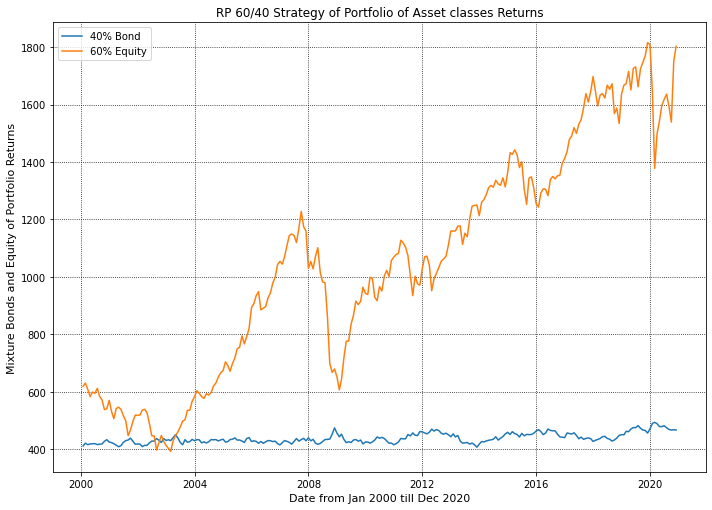

In [313]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2000_2020.index, RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2000_2020.index, RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [314]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
RP_60_40_Portfolio_2000_2020[['Bond_Port_Value_40%','Equity_Port_Value_60%']].describe()

Bond_Port_Value_40%  Equity_Port_Value_60%
count           251.000000             251.000000
mean            437.699991            1044.793729
std              17.613082             392.726818
min             406.276530             391.640297
25%             424.827054             668.781830
50%             432.988185            1042.382478
75%             450.320194            1339.581591
max             492.630295            1815.466775

In [315]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_60_40_bond = (RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'] / RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'].shift(1)) - 1
returns_60_40_equi = (RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'] / RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'].shift(1)) - 1


In [316]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_60_40_bond.dropna(axis=0, inplace=True)
returns_60_40_equi.dropna(axis=0, inplace=True)

**Arithmetic Mean**

In [317]:
Bond_mean = np.mean(returns_60_40_bond)
Bond_mean

0.0006503625712444907

In [318]:
Equity_mean = np.mean(returns_60_40_equi)
Equity_mean

0.005234144905372859

**Standard Deviation**

In [319]:
Bond_sigma = np.std(returns_60_40_bond)
Bond_sigma

0.01688508513010546

In [320]:
Equity_sigma = np.std(returns_60_40_equi)
Equity_sigma

0.04298894197985601

**Skewness**

In [321]:
skew(RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'].dropna())

0.7582283131032671

In [322]:
skew(RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'].dropna())

0.10898353029749919

**Kurtosis**

In [323]:
kurtosis(RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'].dropna())

-0.030775911509556497

In [324]:
kurtosis(RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'].dropna())

-1.0661755528966066

In [325]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [326]:
geometric_mean_return(returns_60_40_bond)

0.0

In [327]:
geometric_mean_return(returns_60_40_equi)

0.0

**Volatility**

In [328]:
Bond_Volatility = np.std(returns_60_40_bond) * np.sqrt(250)
Bond_Volatility

0.26697663748486894

In [329]:
Equity_Volatility = np.std(returns_60_40_equi) * np.sqrt(250)
Equity_Volatility

0.6797148542858664

In [330]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [331]:
Sharpe_Ratio(returns_60_40_bond, 250, 0.0164) # Annualized Sharpe Ratio of 60_40 Bond

0.5464821563881412

In [332]:
Sharpe_Ratio(returns_60_40_equi, 250, 0.0164) # Annualized Sharpe Ratio of 60_40 Equity

1.897191677223858

In [333]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [334]:
Sortino_Ratio(returns_60_40_bond, 250, 0.0164) # Annualized Sortino Ratio of 60_40 Bond

1.0066570597562405

In [335]:
Sortino_Ratio(returns_60_40_equi, 250, 0.0164) # Annualized Sortino Ratio of 60_40 Equity

2.3647343271698467

**Cumulative Return**

In [336]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'][-1] /RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 13.54%


In [337]:
# Calculate the cumulative return of equity
cululative_return = 100 * (RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'][-1] /RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 191.53%


**Conclusion on 60_40 Portfolio**

**Arithmetic Mean**

- 60_40 Bond 0.0006503625712444907
- 60_40 Equity 0.005234144905372859

**Standard Deviation**

- 60_40 Bond 0.01688508513010546
- 60_40 Equity 0.04298894197985601

**Skewness**

- 60_40 Bond 0.7582283131032671
- 60_40 Equity 0.10898353029749919

**Kurtosis**

- 60_40 Bond -0.030775911509556497
- 60_40 Equity -1.0661755528966066

**Geometric Mean Rate of Returns**

- 60_40 Bond 0.00
- 60_40 Equity 0.00

**Volatility**

- 60_40 Bond 0.26697663748486894
- 60_40 Equity 0.6797148542858664 

**Annualized Sharpe Ratio**

- 60_40 Bond 0.5464821563881412
- 60_40 Equity 1.897191677223858

**Annualized Sortino Ratio**

- 60_40 Bond 1.0066570597562405 
- 60_40 Equity 2.3647343271698467

**Annualized Sortino Ratio**

- 60_40 Bond 13.54% 
- 60_40 Equity 191.53%

**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [338]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2000_2020 = mix_port_2000_2020.copy()

In [339]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Currency_Port_Value'].rolling(window=10).mean()


In [340]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2000_2020.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2000_2020.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-11-01      1066.894176         895.085716           1003.227584   
2000-12-01      1080.887585         899.919747           1009.476879   
2001-01-01      1060.175398         948.909151            985.948896   
2001-02-01      1055.179084         882.579742            977.078302   
2001-03-01      1045.963507         842.595066            975.361104   

            Currency_Port_Value  Bond_Port_Value_Avg  Equity_Port_Value_Avg  \
Date                                                                          
2000-11-01          1002.949812          1044.026625             988.658623   
2000-12-01           992.704179          1049.463131             975.590661   
2001-01-01          1014.554829          1050.446858             965.545956   
2001-02-01          1013.339518          1052.258344             952.535513   
2001-03-01          1013.636501          1052.460942             939.750849   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  
Date                                                           
2000-11-01                988.228471              1018.084082  
2000-12-01                990.221050              1015.256880  
2001-01-01                989.660786              1015.618128  
2001-02-01                990.289168              1013.889642  
2001-03-01                988.297128              1012.205981

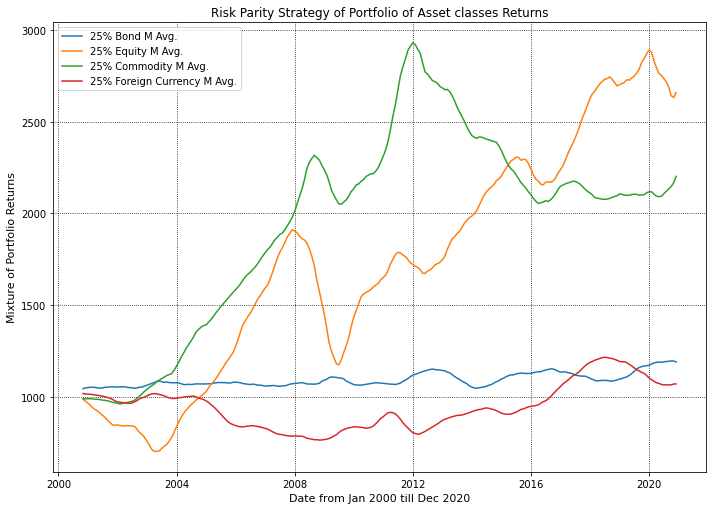

In [341]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Bond_Port_Value_Avg, label='25% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Equity_Port_Value_Avg, label='25% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Commodity_Port_Value_Avg, label='25% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Currency_Port_Value_Avg, label='25% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [342]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Moving_Average_Portfolio_2000_2020[['Bond_Port_Value_Avg','Equity_Port_Value_Avg',
                                    'Commodity_Port_Value_Avg','Currency_Port_Value_Avg']].describe()

Bond_Port_Value_Avg  Equity_Port_Value_Avg  Commodity_Port_Value_Avg  \
count           242.000000             242.000000                242.000000   
mean           1093.726523            1735.927415               1946.501148   
std              37.317602             636.048475                534.429254   
min            1044.026625             702.794753                960.954883   
25%            1067.841145            1190.138774               1558.696520   
50%            1078.105722            1726.031175               2099.234245   
75%            1119.342055            2216.951864               2244.925695   
max            1196.173591            2891.548222               2931.020177   

       Currency_Port_Value_Avg  
count               242.000000  
mean                947.598600  
std                 121.958398  
min                 764.689790  
25%                 838.805480  
50%                 933.686215  
75%                1011.533996  
max                1215.834769

In [343]:
Moving_Average_Portfolio_2000_2020['returns_MA_bond'] = Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2000_2020['returns_MA_equi'] = Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2000_2020['returns_MA_comm'] = Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2000_2020['returns_MA_curr'] = Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'].pct_change()

In [344]:
Moving_Average_Portfolio_2000_2020.dropna(axis=0, inplace=True)

In [345]:
Moving_Average_Portfolio_2000_2020.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-12-01      1080.887585         899.919747           1009.476879   
2001-01-01      1060.175398         948.909151            985.948896   
2001-02-01      1055.179084         882.579742            977.078302   

            Currency_Port_Value  Bond_Port_Value_Avg  Equity_Port_Value_Avg  \
Date                                                                          
2000-12-01           992.704179          1049.463131             975.590661   
2001-01-01          1014.554829          1050.446858             965.545956   
2001-02-01          1013.339518          1052.258344             952.535513   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  \
Date                                                            
2000-12-01                990.221050              1015.256880   
2001-01-01                989.660786              1015.618128   
2001-02-01                990.289168              1013.889642   

            returns_MA_bond  returns_MA_equi  returns_MA_comm  returns_MA_curr  
Date                                                                            
2000-12-01         0.005207        -0.013218         0.002016        -0.002777  
2001-01-01         0.000937        -0.010296        -0.000566         0.000356  
2001-02-01         0.001724        -0.013475         0.000635        -0.001702

In [346]:
returns_MA_bond = Moving_Average_Portfolio_2000_2020['returns_MA_bond']
returns_MA_equi = Moving_Average_Portfolio_2000_2020['returns_MA_equi']
returns_MA_comm = Moving_Average_Portfolio_2000_2020['returns_MA_comm']
returns_MA_curr = Moving_Average_Portfolio_2000_2020['returns_MA_curr']

In [347]:
returns_MA_bond_mean = np.mean(returns_MA_bond)
returns_MA_bond_mean

0.0005491088582575041

In [348]:
returns_MA_equi_mean = np.mean(returns_MA_equi)
returns_MA_equi_mean

0.004240087758835405

In [349]:
returns_MA_comm_mean = np.mean(returns_MA_comm)
returns_MA_comm_mean

0.003376369985489607

In [350]:
returns_MA_curr_mean = np.mean(returns_MA_curr)
returns_MA_curr_mean

0.00023506695878620535

**Standard Deviation**

In [351]:
returns_MA_bond_sigma = np.std(returns_MA_bond)
returns_MA_bond_sigma

0.0038009328499585197

In [352]:
returns_MA_equi_sigma = np.std(returns_MA_equi)
returns_MA_equi_sigma

0.015875639064363352

In [353]:
returns_MA_comm_sigma = np.std(returns_MA_comm)
returns_MA_comm_sigma

0.009665360681068155

In [354]:
returns_MA_curr_sigma = np.std(returns_MA_curr)
returns_MA_curr_sigma

0.007323219679243576

**Skewness**

In [355]:
skew(Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'].dropna())

0.9681389772419938

In [356]:
skew(Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'].dropna())

0.0717157245431685

In [357]:
skew(Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'].dropna())

-0.49135435494447577

In [358]:
skew(Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'].dropna())

0.5120307226433805

**Kurtosis**

In [359]:
kurtosis(Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'].dropna())

0.09736726917198801

In [360]:
kurtosis(Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'].dropna())

-1.0627570853938901

In [361]:
kurtosis(Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'].dropna())

-0.6463035370595054

In [362]:
kurtosis(Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'].dropna())

-0.578585319422217

**Geometric Mean Rate of Return**

In [363]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [364]:
geometric_mean_return(returns_MA_bond)

0.0

In [365]:
geometric_mean_return(returns_MA_equi)

0.0

In [366]:
geometric_mean_return(returns_MA_comm)

0.0

In [367]:
geometric_mean_return(returns_MA_curr)

0.0

**Annualized Volatility**

In [368]:
Bond_Volatility = np.std(returns_MA_bond) * np.sqrt(241)
Bond_Volatility

0.05900634557150955

In [369]:
Equity_Volatility = np.std(returns_MA_equi) * np.sqrt(241)
Equity_Volatility

0.24645619424994672

In [370]:
Commodity_Volatility = np.std(returns_MA_comm) * np.sqrt(241)
Commodity_Volatility

0.1500467477152648

In [371]:
Currency_Volatility = np.std(returns_MA_curr) * np.sqrt(241)
Currency_Volatility

0.11368694163966657

**Annualized Sharpe Ratio**

In [372]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [373]:
Sharpe_Ratio(returns_MA_bond, 241, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

1.9607120921599195

In [374]:
Sharpe_Ratio(returns_MA_equi, 241, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

4.071202046791945

In [375]:
Sharpe_Ratio(returns_MA_comm, 241, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

5.3026759927737785

In [376]:
Sharpe_Ratio(returns_MA_curr, 241, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

0.35331711010669226

**Annualized Sortino Ratio**

In [377]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [378]:
Sortino_Ratio(returns_MA_bond, 241, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

3.019194879978409

In [379]:
Sortino_Ratio(returns_MA_equi, 241, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

5.282014099789353

In [380]:
Sortino_Ratio(returns_MA_comm, 241, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

10.985818921056557

In [381]:
Sortino_Ratio(returns_MA_curr, 241, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

0.5662540337297924

**Cumulative Return**

In [382]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 13.36%


In [383]:
# Calculate the cumulative return of equity 
cululative_return = 100 * (Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 172.54%


In [384]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 122.37%


In [385]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the Currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the Currency is 5.44%


**Conclusion on 10 Months Moving Average Strategy**

**Arithmetic Mean**

- MA Bond 0.0005491088582575041
- MA Equity 0.004240087758835405
- MA Commodity 0.003376369985489607
- MA Currency 0.00023506695878620535

**Standards Deviation**

- MA Bond 0.0038009328499585197
- MA Equity 0.015875639064363352
- MA Commodity 0.009665360681068155
- MA Currency 0.007323219679243576


**Skewness**

- MA Bond 0.9681389772419938
- MA Equity 0.0717157245431685
- MA Commodity -0.49135435494447577
- MA Currency 0.5120307226433805

**Kurtosis**

- MA Bond 0.09736726917198801
- MA Equity -1.0627570853938901
- MA Commodity -0.6463035370595054
- MA Currency -0.578585319422217

**Geometric Mean Rate of Returns**

- MA Bond 0.00
- MA Equity 0.00
- MA Commodity 0.00
- MA Currency 0.00

**Volatility**

- MA Bond 0.05900634557150955
- MA Equity 0.24645619424994672
- MA Commodity 0.1500467477152648
- MA Currency 0.11368694163966657

**Annualized Sharpe Ratio**

- MA Bond 1.9607120921599195
- MA Equity 4.071202046791945
- MA Commodity 5.3026759927737785
- MA Currency 0.35331711010669226 

**Annualized Sortino Ratio**

- MA Bond 3.019194879978409 
- MA Equity 5.282014099789353
- MA Commodity 10.985818921056557 
- MA Currency 0.5662540337297924

**Cumulative Return**

- MA Bond 13.36%
- MA Equity 172.54%
- MA Commodity 122.37%
- MA Currency 5.44%

**With Moving Average (MA) Crossover Strategy**

- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.

- The moving average crossover strategy is geared toward finding the middle of a trend.  A trend defines price action in which prices move in a specific direction over a period of time.  Generally trends are either upward or downward, as sideways movements are considered consolidation and not trends. 

In [386]:
moving_average_df = mix_port_2000_2020.copy()
moving_average_df.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   

            Currency_Port_Value  
Date                             
2000-02-01          1020.976201  
2000-03-01          1010.942340  
2000-04-01          1030.624378

In [387]:
# Create moving average of 10 months
moving_average_df['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

# Create moving average of 20 months
moving_average_df['MA20_bond'] = moving_average_df['Bond_Port_Value'].rolling(20).mean()
moving_average_df['MA20_equity'] = moving_average_df['Equity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_currency'] = moving_average_df['Currency_Port_Value'].rolling(20).mean()

In [388]:
moving_average_df.head(6)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   
2000-05-01      1043.937533         970.441703            995.281505   
2000-06-01      1045.487827         997.235344            997.647248   
2000-07-01      1046.414377         989.939273            970.572331   

            Currency_Port_Value  MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                      
2000-02-01          1020.976201        NaN          NaN             NaN   
2000-03-01          1010.942340        NaN          NaN             NaN   
2000-04-01          1030.624378        NaN          NaN             NaN   
2000-05-01          1030.473117        NaN          NaN             NaN   
2000-06-01          1025.059209        NaN          NaN             NaN   
2000-07-01          1008.240490        NaN          NaN             NaN   

            MA10_currency  MA20_bond  MA20_equity  MA20_commodity  \
Date                                                                
2000-02-01            NaN        NaN          NaN             NaN   
2000-03-01            NaN        NaN          NaN             NaN   
2000-04-01            NaN        NaN          NaN             NaN   
2000-05-01            NaN        NaN          NaN             NaN   
2000-06-01            NaN        NaN          NaN             NaN   
2000-07-01            NaN        NaN          NaN             NaN   

            MA20_currency  
Date                       
2000-02-01            NaN  
2000-03-01            NaN  
2000-04-01            NaN  
2000-05-01            NaN  
2000-06-01            NaN  
2000-07-01            NaN

In [389]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df.dropna(axis=0, inplace=True)
moving_average_df.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2001-09-01      1078.161627         743.893950            975.873995   
2001-10-01      1094.324488         776.483282            967.395171   
2001-11-01      1067.272001         827.160401            946.099991   
2001-12-01      1041.254429         863.426993            956.775445   
2002-01-01      1043.419975         862.306515            935.477286   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2001-09-01           966.817066  1053.147883   871.636182      978.364054   
2001-10-01           948.614895  1054.491573   859.292535      974.155884   
2001-11-01           950.869955  1055.201233   847.117660      970.170993   
2001-12-01           931.925269  1053.808768   845.202385      968.140707   
2002-01-01           965.009793  1053.554415   847.173530      964.152326   

            MA10_currency    MA20_bond  MA20_equity  MA20_commodity  \
Date                                                                  
2001-09-01     996.651540  1048.587254   930.147402      983.296263   
2001-10-01     992.242611  1051.977352   917.441598      982.188467   
2001-11-01     985.874124  1052.824046   906.331808      979.915890   
2001-12-01     977.732699  1053.033556   898.868949      979.214938   
2002-01-01     972.870028  1053.007678   893.462190      976.224727   

            MA20_currency  
Date                       
2001-09-01    1007.367811  
2001-10-01    1003.749745  
2001-11-01    1000.746126  
2001-12-01     995.811171  
2002-01-01     992.538004

In [390]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_bond.iloc[i] > moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] < moving_average_df.MA20_bond.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df.MA10_bond.iloc[i] < moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] > moving_average_df.MA20_bond.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_equity.iloc[i] > moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] < moving_average_df.MA20_equity.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df.MA10_equity.iloc[i] < moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] > moving_average_df.MA20_equity.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_commodity.iloc[i] > moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] < moving_average_df.MA20_commodity.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df.MA10_commodity.iloc[i] < moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] > moving_average_df.MA20_commodity.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_currency.iloc[i] > moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] < moving_average_df.MA20_currency.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df.MA10_currency.iloc[i] < moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] > moving_average_df.MA20_currency.iloc[i-1]:
        Sell_Currency.append(i)    

In [391]:
Buy_Bond, Sell_Bond

([14, 41, 73, 86, 109, 120, 157, 208], [9, 29, 55, 84, 98, 116, 138, 185])

In [392]:
Buy_Equity, Sell_Equity

([26, 99, 134, 183, 213], [82, 125, 172, 212, 225])

In [393]:
Buy_Commodity, Sell_Commodity

([11, 101, 182, 208, 219, 226], [0, 90, 130, 194, 218, 223])

In [394]:
Buy_Currency, Sell_Currency

([13, 34, 91, 132, 168], [25, 38, 120, 159, 208])

In [395]:
moving_average_df.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency', 'MA20_bond', 'MA20_equity', 'MA20_commodity',
       'MA20_currency'],
      dtype='object')

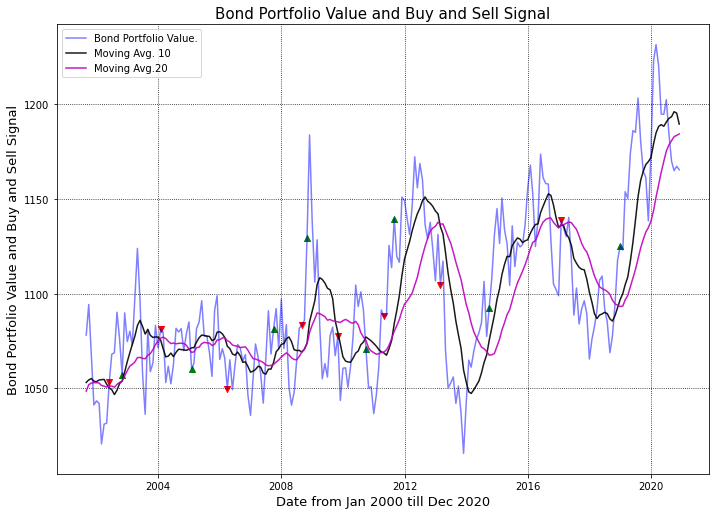

In [396]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_bond, label='Moving Avg.20',c='m' ,alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Bond].index,moving_average_df.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Bond].index,moving_average_df.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

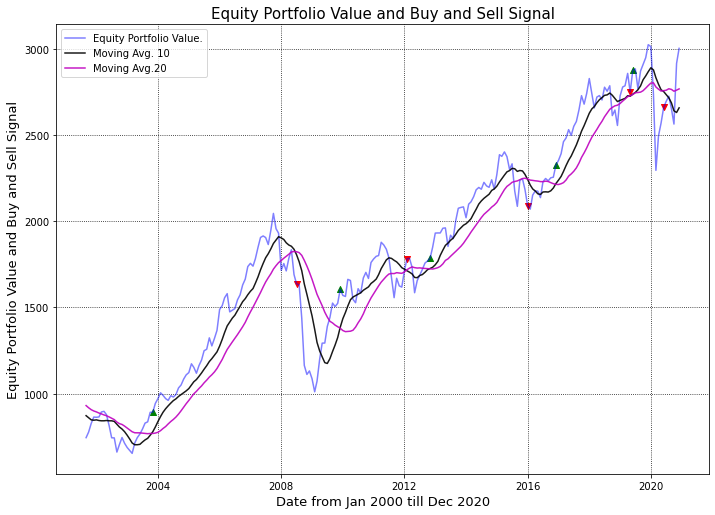

In [397]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_equity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Equity].index,moving_average_df.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Equity].index,moving_average_df.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

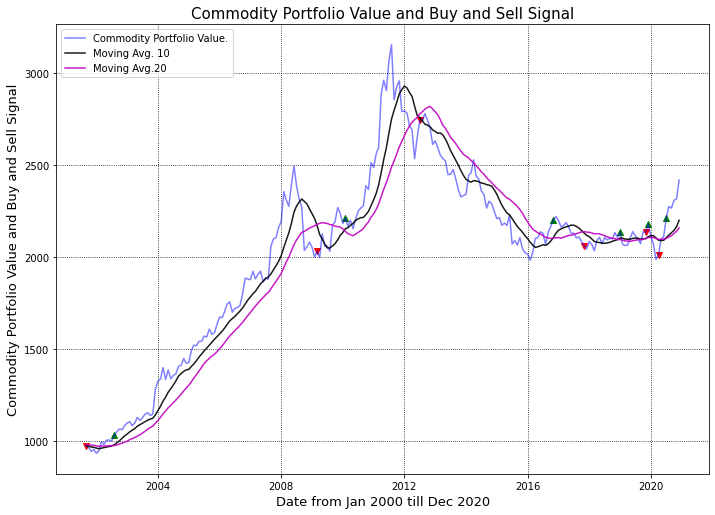

In [398]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_commodity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Commodity].index,moving_average_df.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Commodity].index,moving_average_df.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

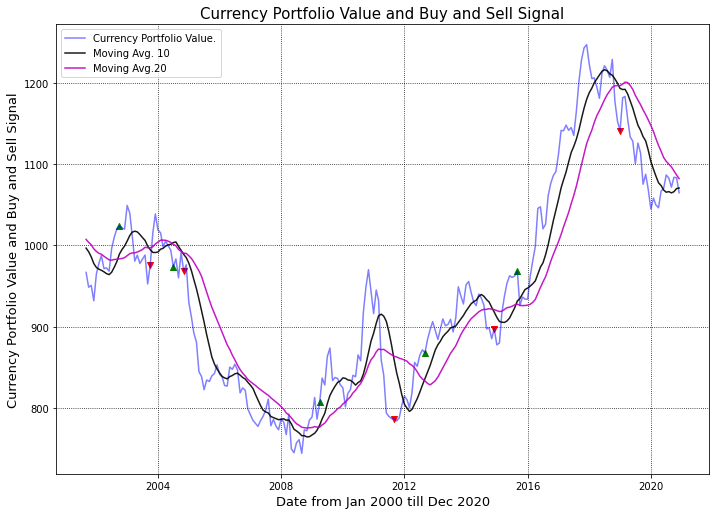

In [399]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_currency, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Currency].index, moving_average_df.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Currency].index, moving_average_df.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With Moving Average (MA) Strategy (10 months)**

In [400]:
moving_average_df_10 = mix_port_2000_2020.copy()
moving_average_df_10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   

            Currency_Port_Value  
Date                             
2000-02-01          1020.976201  
2000-03-01          1010.942340  
2000-04-01          1030.624378

In [401]:
# Create moving average of 10 months
moving_average_df_10['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

In [402]:
moving_average_df_10.head(6)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   
2000-05-01      1043.937533         970.441703            995.281505   
2000-06-01      1045.487827         997.235344            997.647248   
2000-07-01      1046.414377         989.939273            970.572331   

            Currency_Port_Value  MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                      
2000-02-01          1020.976201        NaN          NaN             NaN   
2000-03-01          1010.942340        NaN          NaN             NaN   
2000-04-01          1030.624378        NaN          NaN             NaN   
2000-05-01          1030.473117        NaN          NaN             NaN   
2000-06-01          1025.059209        NaN          NaN             NaN   
2000-07-01          1008.240490        NaN          NaN             NaN   

            MA10_currency  
Date                       
2000-02-01            NaN  
2000-03-01            NaN  
2000-04-01            NaN  
2000-05-01            NaN  
2000-06-01            NaN  
2000-07-01            NaN

In [403]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df_10.dropna(axis=0, inplace=True)
moving_average_df_10.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2002-06-01      1053.206497         813.881011           1007.879269   
2002-07-01      1068.122881         743.226896           1002.049595   
2002-08-01      1068.828395         742.512658           1033.208063   
2002-09-01      1090.231063         660.248980           1053.272311   
2002-10-01      1076.344014         703.839734           1067.894115   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2002-06-01           968.355001  1050.314649   841.827555      973.035067   
2002-07-01           996.237219  1049.310774   841.760850      975.652627   
2002-08-01          1010.193799  1046.761165   838.363787      982.233916   
2002-09-01          1020.430448  1049.057071   821.672645      992.951148   
2002-10-01          1023.570501  1052.566029   805.713919     1004.063015   

            MA10_currency  
Date                       
2002-06-01     964.109048  
2002-07-01     967.051063  
2002-08-01     973.208953  
2002-09-01     980.165003  
2002-10-01     989.329526

In [404]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio
# If the Moving Avg. (10 months) < asset value, the decision is buy the asset
# If the moving Avg. (10 months) < asset value, the decision is sell the asset

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_bond.iloc[i] < moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] > moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df_10.MA10_bond.iloc[i] > moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] < moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_equity.iloc[i] < moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] > moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df_10.MA10_equity.iloc[i] > moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] < moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_commodity.iloc[i] < moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] > moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df_10.MA10_commodity.iloc[i] > moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] < moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_currency.iloc[i] < moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] > moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df_10.MA10_currency.iloc[i] > moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] < moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Sell_Currency.append(i)    

In [405]:
Buy_Bond, Sell_Bond

([0,
  10,
  15,
  18,
  20,
  26,
  30,
  34,
  38,
  41,
  50,
  57,
  61,
  69,
  74,
  95,
  106,
  140,
  157,
  162,
  167,
  176,
  179,
  190,
  197,
  211],
 [9,
  13,
  16,
  19,
  22,
  29,
  32,
  37,
  39,
  43,
  54,
  59,
  68,
  70,
  82,
  100,
  123,
  156,
  158,
  166,
  172,
  177,
  180,
  194,
  209,
  218])

In [406]:
Buy_Equity, Sell_Equity

([10, 83, 97, 99, 116, 121, 133, 135, 151, 166, 169, 190, 193, 199, 218, 221],
 [0, 67, 95, 98, 110, 119, 132, 134, 150, 158, 168, 189, 192, 196, 212, 219])

In [407]:
Buy_Commodity, Sell_Commodity

([61, 63, 83, 85, 87, 96, 123, 140, 166, 190, 193, 203, 208, 215],
 [60, 62, 75, 84, 86, 95, 114, 125, 145, 179, 192, 200, 206, 211])

In [408]:
Buy_Currency, Sell_Currency

([0, 17, 42, 47, 61, 67, 70, 76, 95, 115, 135, 144, 153, 164, 193, 196, 216],
 [9, 23, 43, 51, 63, 68, 71, 90, 106, 134, 142, 145, 160, 190, 195, 197, 222])

In [409]:
moving_average_df_10.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency'],
      dtype='object')

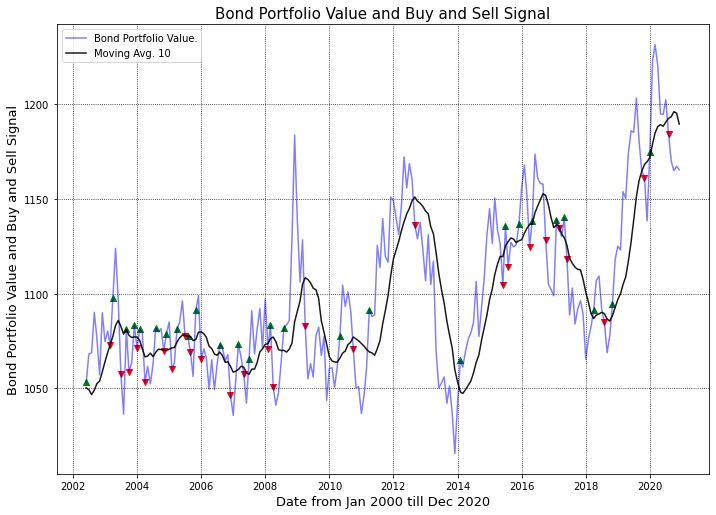

In [410]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Bond].index,moving_average_df_10.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Bond].index,moving_average_df_10.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

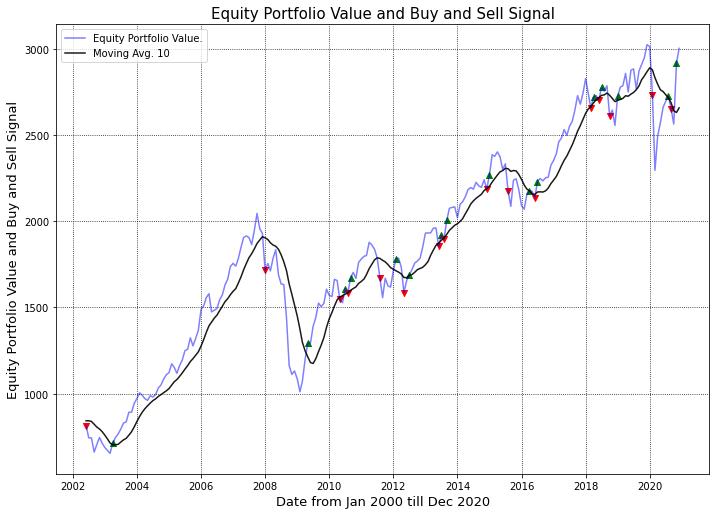

In [411]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Equity].index,moving_average_df_10.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Equity].index,moving_average_df_10.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

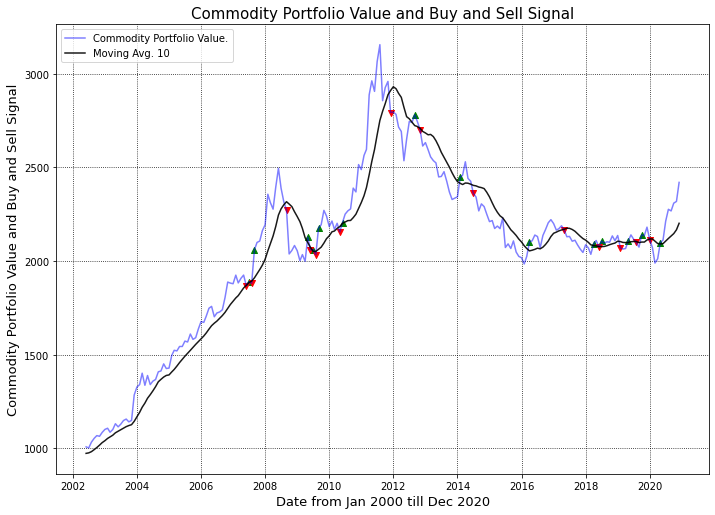

In [412]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Commodity].index,moving_average_df_10.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Commodity].index,moving_average_df_10.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

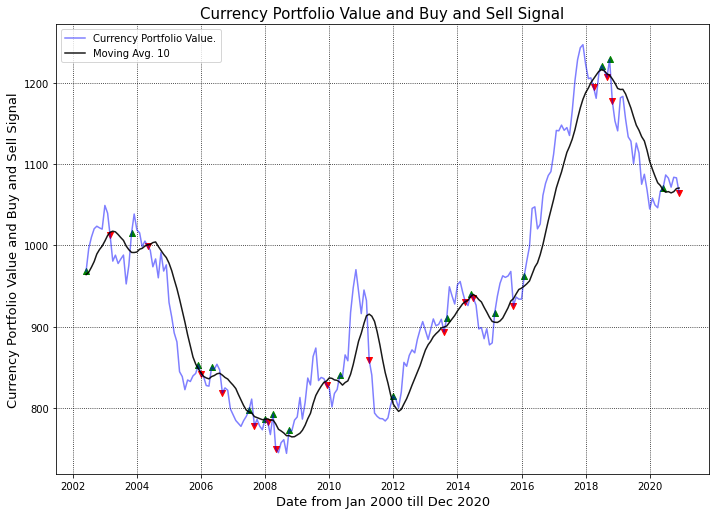

In [413]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Currency].index, moving_average_df_10.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Currency].index, moving_average_df_10.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**Conclusion on 10 Months Moving Average Strategy**

**Arithmetic Mean**

- MA Bond 0.0005491088582575041
- MA Equity 0.004240087758835405
- MA Commodity 0.003376369985489607
- MA Currency 0.00023506695878620535

**Standards Deviation**

- MA Bond 0.0038009328499585197
- MA Equity 0.015875639064363352
- MA Commodity 0.009665360681068155
- MA Currency 0.007323219679243576


**Skewness**

- MA Bond 0.9681389772419938
- MA Equity 0.0717157245431685
- MA Commodity -0.49135435494447577
- MA Currency 0.5120307226433805

**Kurtosis**

- MA Bond 0.09736726917198801
- MA Equity -1.0627570853938901
- MA Commodity -0.6463035370595054
- MA Currency -0.578585319422217

**Geometric Mean Rate of Returns**

- MA Bond 0.00
- MA Equity 0.00
- MA Commodity 0.00
- MA Currency 0.00

**Volatility**

- MA Bond 0.05900634557150955
- MA Equity 0.24645619424994672
- MA Commodity 0.1500467477152648
- MA Currency 0.11368694163966657

**Annualized Sharpe Ratio**

- MA Bond 1.9607120921599195
- MA Equity 4.071202046791945
- MA Commodity 5.3026759927737785
- MA Currency 0.35331711010669226 

**Annualized Sortino Ratio**

- MA Bond 3.019194879978409 
- MA Equity 5.282014099789353
- MA Commodity 10.985818921056557 
- MA Currency 0.5662540337297924

<h4><center>Other RP techniques of Portfolio</center></h4>

In [414]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2020 = pd.read_csv('Bond_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2020.head()

(252, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [415]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2020['Date'] = pd.to_datetime(bond_df_2000_2020.Date)

In [416]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2020.set_index('Date',inplace=True)

In [417]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2020 = np.log(1+bond_df_2000_2020[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [418]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2020.dropna(axis=0, inplace=True)
bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003640   0.038049  0.054233  0.020735  0.029935 -0.001704
2000-03-01  0.019987   0.018032  0.030063  0.014841  0.013401  0.011568
2000-04-01 -0.006054  -0.006689 -0.013402  0.001924 -0.018959 -0.007264
2000-05-01  0.000697   0.017098 -0.007360  0.002591  0.012333  0.004584
2000-06-01 -0.003687   0.000092  0.020086  0.000862  0.012798 -0.011901

In [419]:
1/6

0.16666666666666666

In [420]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [421]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2000_2020.mean(), weights)

0.0003965069725551601

In [422]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2020.mean(), weights)

In [423]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2000_2020.cov()

Germany  Australia        US        UK    Canada     Japan
Germany    0.000378   0.000101  0.000213  0.000139  0.000132  0.000030
Australia  0.000101   0.000941  0.000206  0.000198  0.000233  0.000026
US         0.000213   0.000206  0.000609  0.000187  0.000226  0.000037
UK         0.000139   0.000198  0.000187  0.004597  0.000128  0.000051
Canada     0.000132   0.000233  0.000226  0.000128  0.000409  0.000031
Japan      0.000030   0.000026  0.000037  0.000051  0.000031  0.000143

In [424]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000378 + weights[1]**2* 0.000941 + weights[2]**2* 0.000609 + weights[3]**2* 0.004597 + weights[4]**2* 0.000409 + weights[5]**2* 0.000143
portfolio_variance

0.0001965833333333333

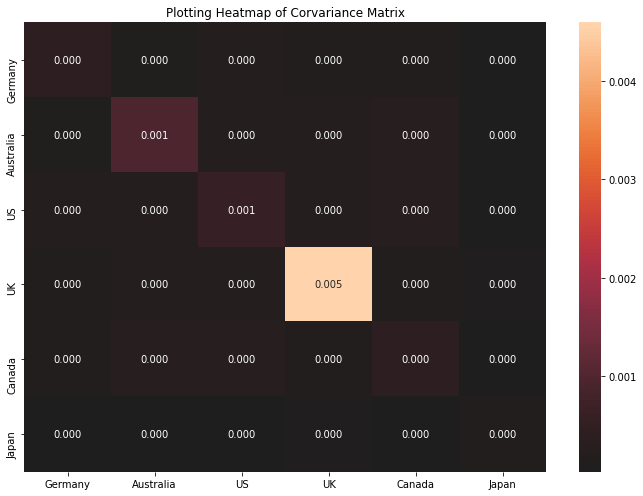

In [425]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2000_2020.cov(),annot=True,fmt='.3f', center=0);

In [426]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.014020817855365403

In [427]:
bond_df_2000_2020.shape[0]

251

In [428]:
portfolio_variance**(1/2)*np.sqrt(251)

0.2221315301047257

In [429]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights)

0.00030429308287755245

In [430]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)

0.017443998477343216

In [431]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)

In [432]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [433]:
def weights_creator(bond_df_2000_2020):
    rand = np.random.random(len(bond_df_2000_2020.columns))
    rand /= rand.sum()
    return rand


In [434]:
weights_creator(bond_df_2000_2020)

array([0.00568651, 0.29023773, 0.33760934, 0.05356589, 0.21168286,
       0.10121767])

In [435]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2020.mean(), weights)

In [436]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [437]:
portfolio_returns(weights)

0.0003965069725551601

In [438]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [439]:
portfolio_std(weights)

0.2758138334445684

In [440]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2000_2020)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [441]:
returns

[0.0005661369294737071,
 0.0005171863581889766,
 0.00031508920479351077,
 0.0004988458532622195,
 0.00032277024415888116,
 0.00028043492685113206,
 0.0005499658536592517,
 0.0002959308558434776,
 0.0006400066544391068,
 0.00041263054561740096,
 0.0005332340722984532,
 0.00028025665788385806,
 0.0004029618618334367,
 0.0005287856631081612,
 0.0004548952429861502,
 0.00021638451320223735,
 0.0004364992394259873,
 0.0004660689170236261,
 0.0003082779202928196,
 0.00027476636082367743,
 0.0002715551347498377,
 0.0003963357881761599,
 0.00022005556648594846,
 0.0004514536287129552,
 0.0002786810971375913,
 0.00040264670728992416,
 0.00028004996883295856,
 0.0005779116545041145,
 0.0004187945645672481,
 0.00026275855768431884,
 0.00014342571312140804,
 0.0004894149046548557,
 0.0002336066943090552,
 0.0004970449249527423,
 0.00023808720240619592,
 0.0003096125883304342,
 0.00042101798897034375,
 0.0004228285043487052,
 0.0005205524104135494,
 0.0006034833481145003,
 0.00018377894652066924,
 

In [442]:
stds

[0.3507760728667951,
 0.3633457797003786,
 0.2700827822502233,
 0.34604141976341674,
 0.27367943338593004,
 0.24274103097223634,
 0.3920526202789665,
 0.2522362832353526,
 0.4780515851212449,
 0.2810187287373085,
 0.3222480042212389,
 0.20866740758587185,
 0.2772781381227993,
 0.33391165984475907,
 0.30292997486394313,
 0.24104673467377272,
 0.28564680326655373,
 0.3404844362431007,
 0.26209774297009925,
 0.2820620215170266,
 0.2277388910294435,
 0.24512050122928195,
 0.198640276612207,
 0.272923081097525,
 0.24746523068021833,
 0.2885409036022472,
 0.23819973509300627,
 0.41048856240192194,
 0.340766085034327,
 0.2361464067358751,
 0.25460501942320546,
 0.31986549269318953,
 0.23166766121004684,
 0.3734520798014889,
 0.22551140935618902,
 0.2527481821853354,
 0.2942365808060783,
 0.3389990408587561,
 0.28740513129279344,
 0.42021605362545256,
 0.1860625279420369,
 0.25081014390105916,
 0.3895301268332889,
 0.27648211057308125,
 0.32540240717783253,
 0.2047148725179839,
 0.211033262703

In [443]:
w

[array([0.14736563, 0.1268493 , 0.11515664, 0.26442049, 0.24708379,
        0.09912417]),
 array([0.22313836, 0.1884519 , 0.20677533, 0.26107102, 0.09994999,
        0.02061339]),
 array([0.29916353, 0.15683281, 0.3164589 , 0.09410848, 0.09871808,
        0.0347182 ]),
 array([0.26163547, 0.14464532, 0.23624094, 0.24165274, 0.08111778,
        0.03470774]),
 array([0.22240249, 0.26304355, 0.17961131, 0.09279083, 0.22580327,
        0.01634856]),
 array([0.20508607, 0.21501022, 0.18311844, 0.09606906, 0.12100937,
        0.17970684]),
 array([0.08188623, 0.12701006, 0.10154631, 0.33008463, 0.04799161,
        0.31148117]),
 array([0.18464229, 0.23874114, 0.16851154, 0.10241852, 0.15536182,
        0.15032469]),
 array([0.02366227, 0.26569807, 0.00527898, 0.40453288, 0.10498719,
        0.1958406 ]),
 array([0.07039372, 0.19849854, 0.10367558, 0.17141246, 0.26275382,
        0.19326587]),
 array([0.23522572, 0.08152667, 0.12514034, 0.23351198, 0.21277243,
        0.11182286]),
 array([0.

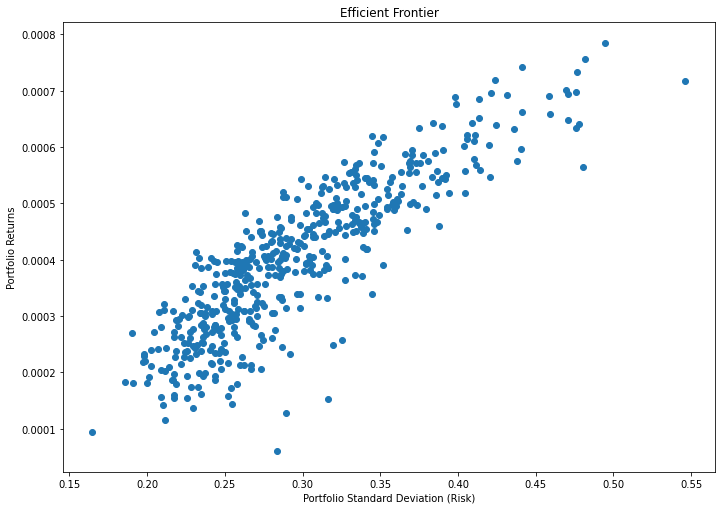

In [444]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [445]:
bond_df_2000_2020.shape[0]

251

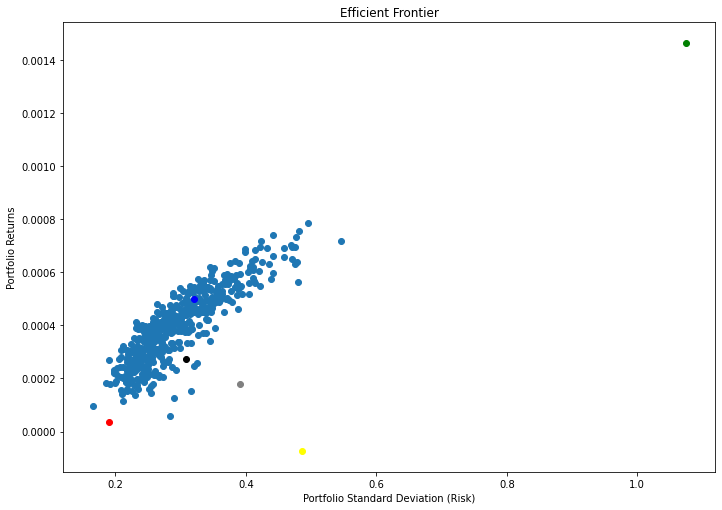

In [446]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(bond_df_2000_2020.std().iloc[0]*np.sqrt(251), bond_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2020.std().iloc[1]*np.sqrt(251), bond_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2020.std().iloc[2]*np.sqrt(251), bond_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2020.std().iloc[3]*np.sqrt(251), bond_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2020.std().iloc[4]*np.sqrt(251), bond_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2020.std().iloc[5]*np.sqrt(251), bond_df_2000_2020.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [447]:
min(stds)

0.16488922519298957

In [448]:
stds.index(min(stds))

396

In [449]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

9.519462431276945e-05

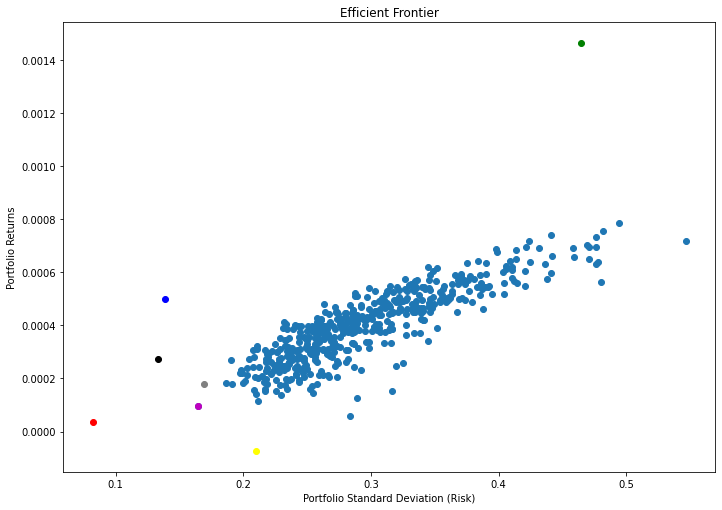

In [450]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2020.std().iloc[0]*np.sqrt(47), bond_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2020.std().iloc[1]*np.sqrt(47), bond_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2020.std().iloc[2]*np.sqrt(47), bond_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2020.std().iloc[3]*np.sqrt(47), bond_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2020.std().iloc[4]*np.sqrt(47), bond_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2020.std().iloc[5]*np.sqrt(47), bond_df_2000_2020.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [451]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2020 = pd.read_csv('Equity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2020.head()

(252, 26)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2000     3080.2      612.38  6835.60  8481.11  1.553234e+10   
1  2/1/2000     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2  3/1/2000     3133.3      662.29  7599.39  9462.39  1.740654e+10   
3  4/1/2000     3115.8      661.38  7414.68  9347.61  1.551930e+10   
4  5/1/2000     3081.0      655.50  7109.67  9251.99  1.471386e+10   

        France        Belgium            US    Japan   ...    Chile    Brazil  \
0  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  ...  1151.42  16388.27   
1  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  ...  1106.18  17660.20   
2  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  ...  1128.58  17820.37   
3  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  ...  1075.01  15537.60   
4  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  ...  1124.19  14956.61   

   Argentina  Russia  Turkey  Portugal  Finland  South Africa  Indonesia  \
0     566.28  188.81  167.15  12385.55  3234.78       7771.66     636.37   
1     631.64  191.49  159.46  14644.27  3239.69       7287.01     576.54   
2     569.24  254.68  159.20  13127.09  3189.06       7388.34     583.28   
3     509.51  242.85  192.06  12235.62  3170.85       6913.24     526.74   
4     464.30  217.05  162.06  11864.13  2901.45       6921.37     454.33   

   Venezuela  
0   90224.09  
1   69894.88  
2   47772.07  
3   48856.03  
4   55583.02  

[5 rows x 26 columns]

In [452]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2020['Date'] = pd.to_datetime(equity_df_2000_2020.Date)

In [453]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2020.set_index('Date',inplace=True)

In [454]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'France ':'France'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Japan ':'Japan'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Sweden ':'Sweden'})

In [455]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2020 = np.log(1+equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                       'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change())
equity_df_2000_2020.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2000-02-01   0.014312    0.081351  0.111849  0.073614   0.100207  0.089700   
2000-03-01   0.002780   -0.003000 -0.005925  0.035870   0.013715  0.015243   
2000-04-01  -0.005601   -0.001375 -0.024606 -0.012204  -0.114762  0.021042   
2000-05-01  -0.011232   -0.008930 -0.042006 -0.010282  -0.053294  0.001018   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02-01 -0.021689 -0.020313  0.021258  0.149778  0.160787 -0.005750   
2000-03-01  0.011499  0.092324  0.018751 -0.053094 -0.035094  0.048184   
2000-04-01  0.012677 -0.031280 -0.123548 -0.039923  0.032670 -0.033077   
2000-05-01  0.012768 -0.022159 -0.095756 -0.070383 -0.037386  0.005032   

               Italy  Singapore  
Date                             
2000-01-01       NaN        NaN  
2000-02-01 -0.024926  -0.029191  
2000-03-01 -0.008878   0.016235  
2000-04-01 -0.045033  -0.052120  
2000-05-01 -0.025518  -0.011535

In [456]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2020.dropna(axis=0, inplace=True)
equity_df_2000_2020.head(4)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014312    0.081351  0.111849  0.073614   0.100207  0.089700   
2000-03-01   0.002780   -0.003000 -0.005925  0.035870   0.013715  0.015243   
2000-04-01  -0.005601   -0.001375 -0.024606 -0.012204  -0.114762  0.021042   
2000-05-01  -0.011232   -0.008930 -0.042006 -0.010282  -0.053294  0.001018   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-02-01 -0.021689 -0.020313  0.021258  0.149778  0.160787 -0.005750   
2000-03-01  0.011499  0.092324  0.018751 -0.053094 -0.035094  0.048184   
2000-04-01  0.012677 -0.031280 -0.123548 -0.039923  0.032670 -0.033077   
2000-05-01  0.012768 -0.022159 -0.095756 -0.070383 -0.037386  0.005032   

               Italy  Singapore  
Date                             
2000-02-01 -0.024926  -0.029191  
2000-03-01 -0.008878   0.016235  
2000-04-01 -0.045033  -0.052120  
2000-05-01 -0.025518  -0.011535

In [457]:
1/14

0.07142857142857142

In [458]:
weights = [0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
           0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
          0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]

In [459]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(equity_df_2000_2020.mean(), weights)

0.0011164279767861187

In [460]:
def portfolio_returns(weights):
    return np.dot(equity_df_2000_2020.mean(), weights)

In [461]:
portfolio_returns(weights)

0.0011164279767861187

In [462]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
equity_df_2000_2020.cov()

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Australia    0.001580    0.001494  0.001619  0.001205   0.001437  0.001518   
Nethelands   0.001494    0.003006  0.002950  0.001628   0.002079  0.002607   
Germany      0.001619    0.002950  0.003769  0.001744   0.002300  0.002960   
Canada       0.001205    0.001628  0.001744  0.001735   0.001715  0.001580   
Hong_Kong    0.001437    0.002079  0.002300  0.001715   0.003608  0.001962   
France       0.001518    0.002607  0.002960  0.001580   0.001962  0.002746   
Belgium      0.001454    0.002344  0.002429  0.001426   0.001775  0.002250   
US           0.001286    0.001911  0.002188  0.001472   0.001830  0.001895   
Japan        0.001364    0.001948  0.002148  0.001418   0.001981  0.001897   
Spain        0.001556    0.002493  0.002855  0.001592   0.002165  0.002643   
Sweden       0.001348    0.002439  0.002817  0.001502   0.002094  0.002391   
UK           0.001174    0.001859  0.002007  0.001241   0.001580  0.001823   
Italy        0.000086   -0.000226 -0.000213 -0.000089  -0.000116 -0.000175   
Singapore    0.000090    0.000050  0.000120  0.000039  -0.000088 -0.000016   

             Belgium        US     Japan     Spain    Sweden        UK  \
Australia   0.001454  0.001286  0.001364  0.001556  0.001348  0.001174   
Nethelands  0.002344  0.001911  0.001948  0.002493  0.002439  0.001859   
Germany     0.002429  0.002188  0.002148  0.002855  0.002817  0.002007   
Canada      0.001426  0.001472  0.001418  0.001592  0.001502  0.001241   
Hong_Kong   0.001775  0.001830  0.001981  0.002165  0.002094  0.001580   
France      0.002250  0.001895  0.001897  0.002643  0.002391  0.001823   
Belgium     0.002519  0.001688  0.001658  0.002228  0.001921  0.001619   
US          0.001688  0.001951  0.001666  0.001836  0.001812  0.001467   
Japan       0.001658  0.001666  0.003208  0.001998  0.001887  0.001374   
Spain       0.002228  0.001836  0.001998  0.003526  0.002365  0.001781   
Sweden      0.001921  0.001812  0.001887  0.002365  0.003027  0.001618   
UK          0.001619  0.001467  0.001374  0.001781  0.001618  0.001639   
Italy      -0.000054  0.000018  0.000014 -0.000229 -0.000144 -0.000159   
Singapore   0.000130  0.000001  0.000034  0.000122 -0.000009  0.000094   

               Italy  Singapore  
Australia   0.000086   0.000090  
Nethelands -0.000226   0.000050  
Germany    -0.000213   0.000120  
Canada     -0.000089   0.000039  
Hong_Kong  -0.000116  -0.000088  
France     -0.000175  -0.000016  
Belgium    -0.000054   0.000130  
US          0.000018   0.000001  
Japan       0.000014   0.000034  
Spain      -0.000229   0.000122  
Sweden     -0.000144  -0.000009  
UK         -0.000159   0.000094  
Italy       0.004694   0.002651  
Singapore   0.002651   0.004385

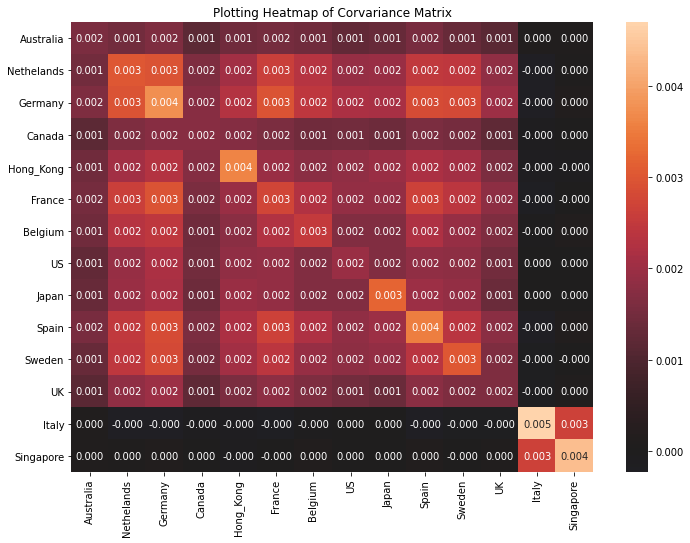

In [463]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(equity_df_2000_2020.cov(),annot=True,fmt='.3f', center=0);

In [464]:
# Calculate the portfolio_variance 
np.dot(np.dot(equity_df_2000_2020.cov(),weights),weights)

0.0014993773827110916

In [465]:
# calculate the portfolio standard deviation
(np.dot(np.dot(equity_df_2000_2020.cov(),weights),weights))**(1/2)

0.03872179467316942

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [466]:
def weights_creator(equity_df_2000_2020):
    rand = np.random.random(len(equity_df_2000_2020.columns))
    rand /= rand.sum()
    return rand

In [467]:
weights_creator(equity_df_2000_2020)

array([0.11364547, 0.02794913, 0.08955748, 0.06751573, 0.06675235,
       0.05236975, 0.11141508, 0.00130456, 0.0783248 , 0.0573078 ,
       0.09763622, 0.05676092, 0.06517873, 0.11428198])

In [468]:
weights = [0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
           0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
          0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]

In [469]:
def portfolio_returns(weights):
    return np.dot(equity_df_2000_2020.mean(), weights)

In [470]:
portfolio_returns(weights)

0.0011164279767861187

In [471]:
equity_df_2000_2020.shape[0]

251

In [472]:
def portfolio_std(weights):
    return (np.dot(np.dot(equity_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(251)

In [473]:
portfolio_std(weights)

0.6134685998977323

In [474]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(equity_df_2000_2020)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)

In [475]:
returns

[0.0006514889973537862,
 0.0004415084093111973,
 0.000680013067121137,
 0.0014295516956518558,
 0.0010904949445157026,
 0.0008221642260726472,
 0.0011727909067291303,
 0.0014659255481946347,
 0.0012604670308117936,
 0.0003297505016621356,
 0.001425846026362337,
 0.0008867209467844355,
 0.0012198636123708791,
 0.0016322933743138967,
 0.0007356565983330153,
 0.0011200382478454636,
 0.0016044601605608032,
 0.0013547120651110254,
 0.0010238651684955538,
 0.001465523842341341,
 0.0009721601843216258,
 0.0011321013915586834,
 0.0010156958537315948,
 0.0013898461469882349,
 0.0012740727314433829,
 0.0009505266398639678,
 0.0008687645262973563,
 0.0013046850330285928,
 0.0007841397087579509,
 0.001471894009055241,
 0.0006916060368360323,
 0.0014469612017021618,
 0.0007675507748667302,
 0.0010446613163168426,
 0.0008828889236254533,
 0.0009983911184357121,
 0.0013130637993993754,
 0.0013601727131933364,
 0.0013112001007916933,
 0.0007890681392027909,
 0.0011050092418871285,
 0.00112855930538876

In [476]:
stds

[0.612773886558466,
 0.5987184169484966,
 0.5928230623345746,
 0.5676994426359703,
 0.6439098886418134,
 0.6403759382982872,
 0.6223908559095105,
 0.6393060630757311,
 0.6236686125851351,
 0.6644495408492336,
 0.5817346072395146,
 0.614962336512671,
 0.6313732044025092,
 0.6316148461554979,
 0.6107945223001089,
 0.5984291387193604,
 0.6643608363349335,
 0.6689899231070613,
 0.6163762201657078,
 0.6105955519763956,
 0.7101904944287611,
 0.6246264868693674,
 0.6080548896477704,
 0.635306990333499,
 0.6080537524554225,
 0.6267796793331896,
 0.6368021713595353,
 0.6083062048615702,
 0.6003681274547731,
 0.6441129930944028,
 0.5589356808099182,
 0.6460695530124853,
 0.6042388616726541,
 0.5668245683597906,
 0.686669216821151,
 0.6040948088211695,
 0.5918210149751534,
 0.6071524161107245,
 0.6524728286222135,
 0.6258918851843793,
 0.5908340479256505,
 0.5849217850163995,
 0.6006616973692438,
 0.6077869144949077,
 0.6408253203112176,
 0.5996028442105334,
 0.6553772853444427,
 0.68799733637966

In [477]:
w

[array([0.02392536, 0.05103341, 0.08248907, 0.08130701, 0.06624873,
        0.11247827, 0.09666282, 0.01023927, 0.10340249, 0.0992079 ,
        0.04274727, 0.03758741, 0.08748797, 0.10518301]),
 array([0.02853325, 0.09033047, 0.00385967, 0.08993829, 0.15308561,
        0.00448553, 0.03657791, 0.05801319, 0.09926971, 0.12443081,
        0.06628154, 0.03347317, 0.03461517, 0.17710567]),
 array([0.03657604, 0.1207312 , 0.07559614, 0.04783216, 0.018819  ,
        0.05631116, 0.04339515, 0.04914826, 0.1025947 , 0.03155586,
        0.11725079, 0.06452644, 0.09852635, 0.13713676]),
 array([0.05015082, 0.04701558, 0.07356062, 0.14881263, 0.11393283,
        0.02367953, 0.03870419, 0.12319152, 0.01062024, 0.05991718,
        0.01464301, 0.0716372 , 0.13713101, 0.08700365]),
 array([0.00646691, 0.13239719, 0.09755761, 0.04629871, 0.12647575,
        0.02691898, 0.01756247, 0.0581472 , 0.1225083 , 0.09117506,
        0.02769957, 0.12552492, 0.08656815, 0.03469919]),
 array([0.09412454, 0.09543008

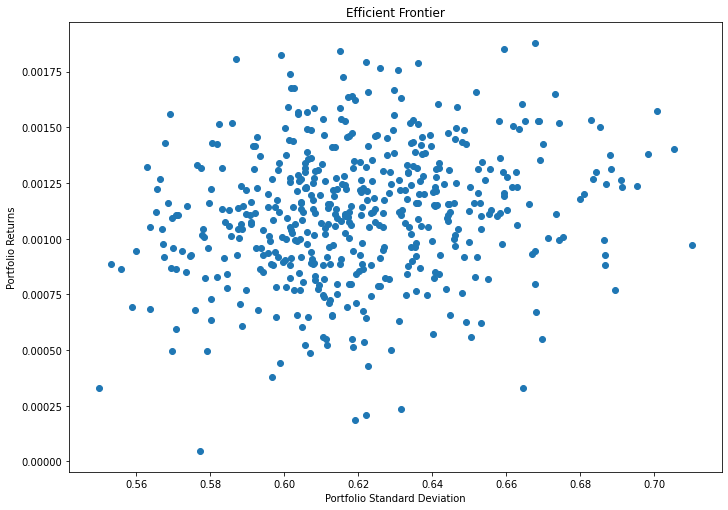

In [478]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

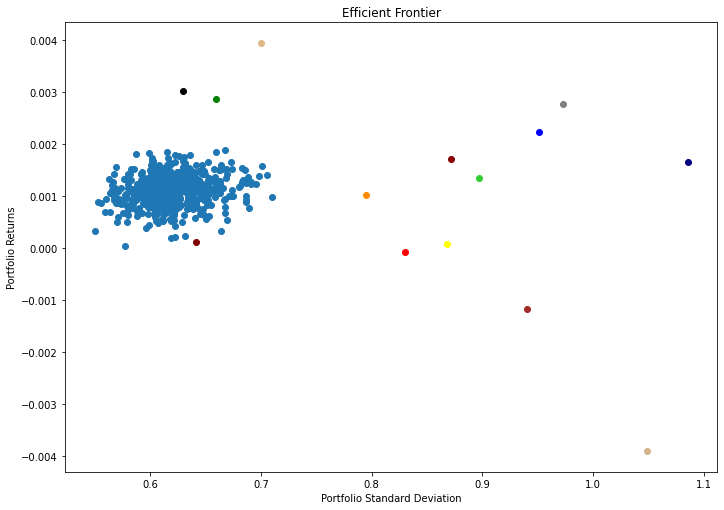

In [479]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(equity_df_2000_2020.std().iloc[0]*np.sqrt(251), equity_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(equity_df_2000_2020.std().iloc[1]*np.sqrt(251), equity_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(equity_df_2000_2020.std().iloc[2]*np.sqrt(251), equity_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(equity_df_2000_2020.std().iloc[3]*np.sqrt(251), equity_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(equity_df_2000_2020.std().iloc[4]*np.sqrt(251), equity_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(equity_df_2000_2020.std().iloc[5]*np.sqrt(251), equity_df_2000_2020.mean().iloc[5],c='red')
plt.scatter(equity_df_2000_2020.std().iloc[6]*np.sqrt(251), equity_df_2000_2020.mean().iloc[6],c='darkorange')
plt.scatter(equity_df_2000_2020.std().iloc[7]*np.sqrt(251), equity_df_2000_2020.mean().iloc[7],c='burlywood')
plt.scatter(equity_df_2000_2020.std().iloc[8]*np.sqrt(251), equity_df_2000_2020.mean().iloc[8],c='limegreen')
plt.scatter(equity_df_2000_2020.std().iloc[9]*np.sqrt(251), equity_df_2000_2020.mean().iloc[9],c='brown')
plt.scatter(equity_df_2000_2020.std().iloc[10]*np.sqrt(251), equity_df_2000_2020.mean().iloc[10],c='darkred')
plt.scatter(equity_df_2000_2020.std().iloc[11]*np.sqrt(251), equity_df_2000_2020.mean().iloc[11],c='maroon')
plt.scatter(equity_df_2000_2020.std().iloc[12]*np.sqrt(251), equity_df_2000_2020.mean().iloc[12],c='navy')
plt.scatter(equity_df_2000_2020.std().iloc[13]*np.sqrt(251), equity_df_2000_2020.mean().iloc[13],c='tan')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [480]:
min(stds)

0.5498870153829744

In [481]:
stds.index(min(stds))

196

In [482]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

0.00032804662173598433

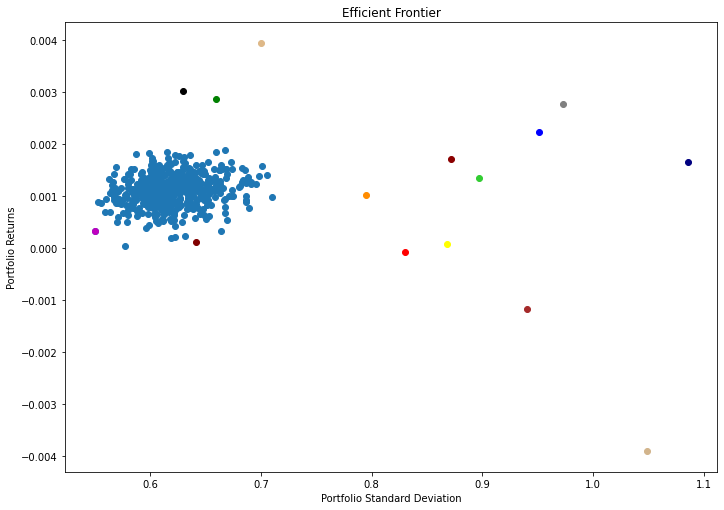

In [483]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(equity_df_2000_2020.std().iloc[0]*np.sqrt(251), equity_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(equity_df_2000_2020.std().iloc[1]*np.sqrt(251), equity_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(equity_df_2000_2020.std().iloc[2]*np.sqrt(251), equity_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(equity_df_2000_2020.std().iloc[3]*np.sqrt(251), equity_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(equity_df_2000_2020.std().iloc[4]*np.sqrt(251), equity_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(equity_df_2000_2020.std().iloc[5]*np.sqrt(251), equity_df_2000_2020.mean().iloc[5],c='red')
plt.scatter(equity_df_2000_2020.std().iloc[6]*np.sqrt(251), equity_df_2000_2020.mean().iloc[6],c='darkorange')
plt.scatter(equity_df_2000_2020.std().iloc[7]*np.sqrt(251), equity_df_2000_2020.mean().iloc[7],c='burlywood')
plt.scatter(equity_df_2000_2020.std().iloc[8]*np.sqrt(251), equity_df_2000_2020.mean().iloc[8],c='limegreen')
plt.scatter(equity_df_2000_2020.std().iloc[9]*np.sqrt(251), equity_df_2000_2020.mean().iloc[9],c='brown')
plt.scatter(equity_df_2000_2020.std().iloc[10]*np.sqrt(251), equity_df_2000_2020.mean().iloc[10],c='darkred')
plt.scatter(equity_df_2000_2020.std().iloc[11]*np.sqrt(251), equity_df_2000_2020.mean().iloc[11],c='maroon')
plt.scatter(equity_df_2000_2020.std().iloc[12]*np.sqrt(251), equity_df_2000_2020.mean().iloc[12],c='navy')
plt.scatter(equity_df_2000_2020.std().iloc[13]*np.sqrt(251), equity_df_2000_2020.mean().iloc[13],c='tan')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

In [484]:
# Calcualte the Sharpe Ratio
mean = np.mean(returns)
sigma = np.std(returns)

Sharpe_Ratio = mean / sigma
Sharpe_Ratio

3.7048162457456457

<h4><center>Apply Correlation Analysis Between Asset Classes Portfolio and Benchmark Portfolio</center></h4>

In [485]:
# Load Modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy.stats import linregress

In [486]:
benchmark.head(3)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2000-01-31            12149.05           1802.43               206.37   
2000-02-29            12309.89           1737.72               216.01   
2000-03-31            12199.09           1875.56               206.88   

            benchmark_bond  
Dates                       
2000-01-31          162.91  
2000-02-29          162.91  
2000-03-31          162.91

In [487]:
benchmark['benchmark_bond_return'] = benchmark['benchmark_bond'].pct_change()
benchmark['benchmark_equity_return'] = benchmark['benchmark_equity'].pct_change()
benchmark['benchmark_commodity_return'] = benchmark['benchmark_commodity'].pct_change()
benchmark['benchmark_currency_return'] = benchmark['benchmark_currency'].pct_change()

In [488]:
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)

In [489]:
benchmark.head(3)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2000-02-29            12309.89           1737.72               216.01   
2000-03-31            12199.09           1875.56               206.88   
2000-04-30            12501.98           1840.97               203.21   

            benchmark_bond  benchmark_bond_return  benchmark_equity_return  \
Dates                                                                        
2000-02-29          162.91               0.000000                -0.035902   
2000-03-31          162.91               0.000000                 0.079322   
2000-04-30          167.36               0.027316                -0.018442   

            benchmark_commodity_return  benchmark_currency_return  
Dates                                                              
2000-02-29                    0.046712                   0.013239  
2000-03-31                   -0.042267                  -0.009001  
2000-04-30                   -0.017740                   0.024829

In [490]:
benchmark_bond_return = benchmark['benchmark_bond_return']
print(benchmark_bond_return.shape)
benchmark_bond_return.head(5)

(251,)


Dates
2000-02-29    0.000000
2000-03-31    0.000000
2000-04-30    0.027316
2000-05-31    0.036628
2000-06-30   -0.028244
Name: benchmark_bond_return, dtype: float64

In [491]:
bond_return = bond_df_2000_2020_2['Portfolio_R']
print(bond_return.shape)
bond_return.head(5)

(251,)


Date
2000-02-01    0.026523
2000-03-01    0.023200
2000-04-01   -0.012638
2000-05-01    0.006628
2000-06-01    0.001485
Name: Portfolio_R, dtype: float64

Beta =  0.03373760366825067
Correlation Coefficient =  0.07666877844189528


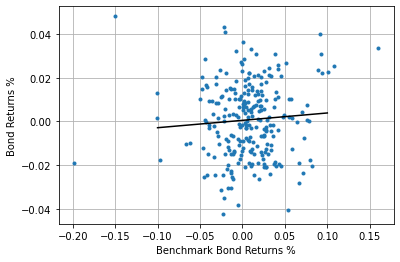

In [492]:
plt.plot(benchmark_bond_return, bond_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Bond Returns %')
plt.ylabel('Bond Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_bond_return, bond_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [493]:
benchmark_equity_return = benchmark['benchmark_equity_return']
print(benchmark_equity_return.shape)
benchmark_equity_return.head(5)

(251,)


Dates
2000-02-29   -0.035902
2000-03-31    0.079322
2000-04-30   -0.018442
2000-05-31    0.005997
2000-06-30    0.007343
Name: benchmark_equity_return, dtype: float64

In [494]:
equity_return = equity_df_2000_2020_2['Portfolio_R']
print(equity_return.shape)
equity_return.head(5)

(251,)


Date
2000-02-01    0.030599
2000-03-01    0.018200
2000-04-01   -0.034947
2000-05-01   -0.041713
2000-06-01    0.027610
Name: Portfolio_R, dtype: float64

Beta =  0.8460041856560675
Correlation Coefficient =  0.9065108790032479


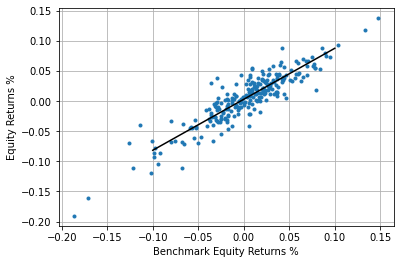

In [495]:
plt.plot(benchmark_equity_return, equity_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Equity Returns %')
plt.ylabel('Equity Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_equity_return, equity_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [496]:
benchmark_commodity_return = benchmark['benchmark_commodity_return']
print(benchmark_commodity_return.shape)
benchmark_commodity_return.head(5)

(251,)


Dates
2000-02-29    0.046712
2000-03-31   -0.042267
2000-04-30   -0.017740
2000-05-31    0.098371
2000-06-30    0.056048
Name: benchmark_commodity_return, dtype: float64

In [497]:
commodity_return = commodity_df_2000_2020_2['Portfolio_R']
print(commodity_return.shape)
commodity_return.head(5)

(251,)


Date
2000-02-01   -0.010449
2000-03-01    0.002022
2000-04-01   -0.020934
2000-05-01    0.025224
2000-06-01    0.002377
Name: Portfolio_R, dtype: float64

Beta =  0.2237793277045707
Correlation Coefficient =  0.5524736867321579


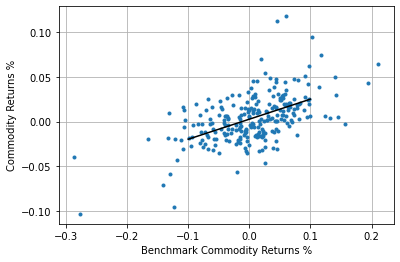

In [498]:
plt.plot(benchmark_commodity_return, commodity_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Commodity Returns %')
plt.ylabel('Commodity Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_commodity_return, commodity_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [499]:
benchmark_currency_return = benchmark['benchmark_currency_return']
print(benchmark_currency_return.shape)
benchmark_currency_return.head(5)

(251,)


Dates
2000-02-29    0.013239
2000-03-31   -0.009001
2000-04-30    0.024829
2000-05-31    0.004114
2000-06-30   -0.011254
Name: benchmark_currency_return, dtype: float64

In [500]:
currency_return = currency_df_2000_2020_2['Portfolio_R']
print(currency_return.shape)
currency_return.head(5)

(251,)


Date
2000-02-01    0.020976
2000-03-01   -0.009828
2000-04-01    0.019469
2000-05-01   -0.000147
2000-06-01   -0.005254
Name: Portfolio_R, dtype: float64

Beta =  0.05497240551972866
Correlation Coefficient =  0.046833431039503666


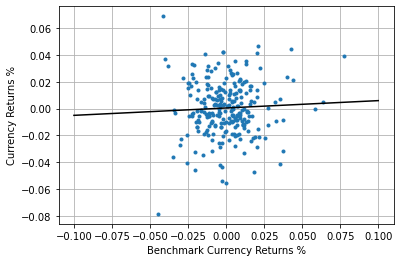

In [501]:
plt.plot(benchmark_currency_return, currency_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Currency Returns %')
plt.ylabel('Currency Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_currency_return, currency_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

<h4><center>Inverse Volatility Risk Parity Strategy</center></h4>

**Inverse Volatility ETF**

- An inverse volatility exchange-traded fund (ETF) is a financial product that allows investors to gain exposure to volatility, and thus hedge against portfolio risk, without having to buy options.

- As long as volatility remains low, investors may see a substantial return, as an inverse volatility ETF is essentially a bet that the market will remain stable.

In [502]:
# Use pandas.DataFrame.copy() function to make a copy of Inverse Volatility RP Strategy
inverse_vol_RP = mix_port_2000_2020.copy()
inverse_vol_RP.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-02-01      1026.522530        1030.599368            989.551087   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   

            Currency_Port_Value  
Date                             
2000-02-01          1020.976201  
2000-03-01          1010.942340  
2000-04-01          1030.624378

In [503]:
# Calculate monthly returns of asset classes

# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
inverse_vol_RP['Bond_inv_R'] = inverse_vol_RP['Bond_Port_Value'].pct_change()
inverse_vol_RP['Equity_inv_R'] = inverse_vol_RP['Equity_Port_Value'].pct_change()
inverse_vol_RP['Commodity_inv_R'] = inverse_vol_RP['Commodity_Port_Value'].pct_change()
inverse_vol_RP['Currency_inv_R'] = inverse_vol_RP['Currency_Port_Value'].pct_change()

# Use pandas.DataFrame.dropna() function to remove missing values in rows
inverse_vol_RP.dropna(axis=0, inplace=True)

# Use pandas.DataFrame.head(n=5) function to return the first number of rows
inverse_vol_RP.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2000-03-01      1050.338123        1049.356204            991.551539   
2000-04-01      1037.064222        1012.684170            970.794486   
2000-05-01      1043.937533         970.441703            995.281505   

            Currency_Port_Value  Bond_inv_R  Equity_inv_R  Commodity_inv_R  \
Date                                                                         
2000-03-01          1010.942340    0.023200      0.018200         0.002022   
2000-04-01          1030.624378   -0.012638     -0.034947        -0.020934   
2000-05-01          1030.473117    0.006628     -0.041713         0.025224   

            Currency_inv_R  
Date                        
2000-03-01       -0.009828  
2000-04-01        0.019469  
2000-05-01       -0.000147

In [504]:
inverse_vol_RP.shape[0]

250

In [505]:
# Calculate the annualized volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

inverse_vol_RP['Bond_inv_Vol'] = inverse_vol_RP['Bond_inv_R'].rolling(250).std() * math.sqrt(250)
inverse_vol_RP['Equity_inv_Vol'] = inverse_vol_RP['Equity_inv_R'].rolling(250).std() * math.sqrt(250)
inverse_vol_RP['Commodity_inv_Vol'] = inverse_vol_RP['Commodity_inv_R'].rolling(250).std() * math.sqrt(250)
inverse_vol_RP['Currency_inv_Vol'] = inverse_vol_RP['Currency_inv_R'].rolling(250).std() * math.sqrt(250)

In [506]:
inverse_vol_RP[['Bond_inv_Vol','Equity_inv_Vol','Commodity_inv_Vol','Currency_inv_Vol']].dropna()

Bond_inv_Vol  Equity_inv_Vol  Commodity_inv_Vol  Currency_inv_Vol
Date                                                                         
2020-12-01      0.267512        0.681078           0.432071           0.32022

In [507]:
# Calculate the weight proportional to 1 / annualized volatility (reciprocal, one over the volatility)
inverse_vol_RP['Bond_inv_Value'] = inverse_vol_RP['Bond_Port_Value'] * 1 / 0.267512
inverse_vol_RP['Equity_inv_Value'] = inverse_vol_RP['Equity_Port_Value'] * 1 / 0.681078 
inverse_vol_RP['Commodity_inv_Value'] = inverse_vol_RP['Commodity_Port_Value'] * 1 / 0.432071
inverse_vol_RP['Currency_inv_Value'] = inverse_vol_RP['Currency_Port_Value'] * 1 / 0.32022

In [508]:
inverse_vol_RP['Portfolio_inv_Value'] = inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value',
                                                        'Commodity_inv_Value','Currency_inv_Value']].sum(axis=1)

In [509]:
inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value',
                'Currency_inv_Value','Portfolio_inv_Value']].head(3)

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
Date                                                                
2000-03-01     3926.321522       1540.728380          2294.881023   
2000-04-01     3876.701688       1486.884277          2246.840187   
2000-05-01     3902.395155       1424.861327          2303.513787   

            Currency_inv_Value  Portfolio_inv_Value  
Date                                                 
2000-03-01         3157.024357         10918.955283  
2000-04-01         3218.488472         10828.914623  
2000-05-01         3218.016105         10848.786373

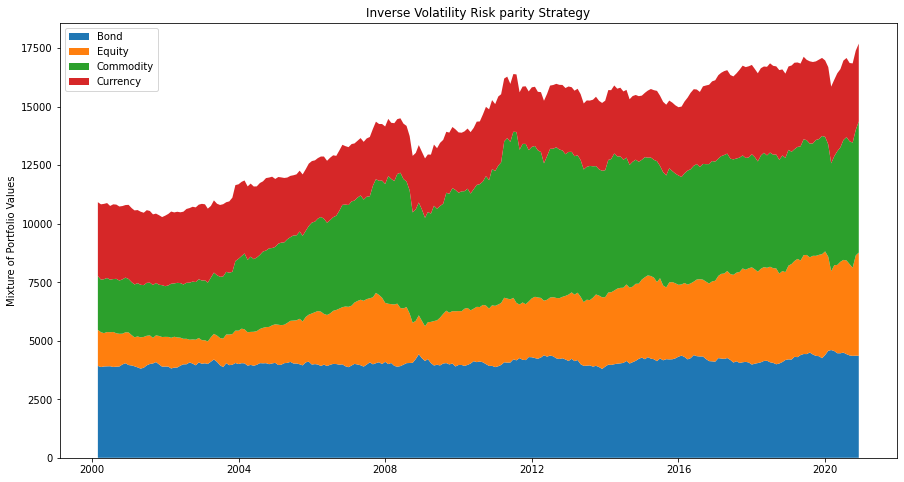

In [510]:
rcParams['figure.figsize'] = 15,8

x = inverse_vol_RP.index
y1 = inverse_vol_RP.Bond_inv_Value
y2 = inverse_vol_RP.Equity_inv_Value
y3 = inverse_vol_RP.Commodity_inv_Value
y4 = inverse_vol_RP.Currency_inv_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Inverse Volatility Risk parity Strategy')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

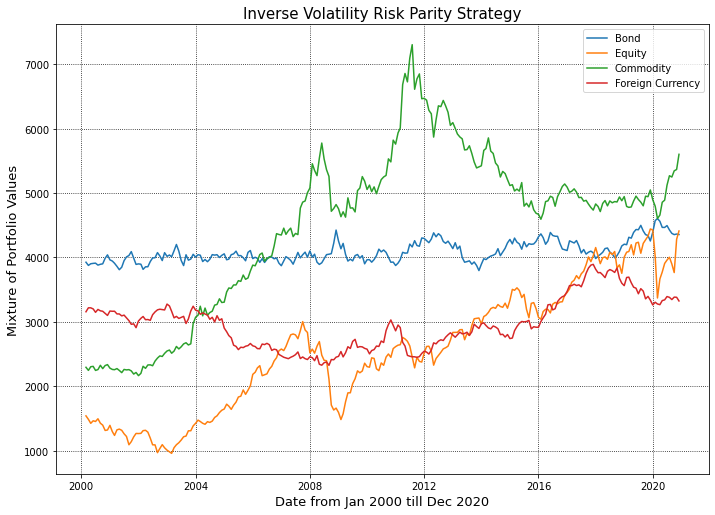

In [511]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(inverse_vol_RP.index, inverse_vol_RP.Bond_inv_Value, label='Bond')
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Equity_inv_Value, label='Equity')
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Commodity_inv_Value, label='Commodity')                               
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Currency_inv_Value, label='Foreign Currency')
                               
plt.title('Inverse Volatility Risk Parity Strategy', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Mixture of Portfolio Values', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [512]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, 
# arithmetic mean, standard deviation, minimum value, maximum value, and percentile
inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value','Currency_inv_Value']].describe()

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
count      250.000000        250.000000           250.000000   
mean      4091.483327       2560.889908          4488.078965   
std        164.145676        960.687546          1263.415329   
min       3796.806594        958.383369          2165.100842   
25%       3971.739745       1642.961710          3573.365760   
50%       4046.896687       2552.642364          4845.307528   
75%       4208.867401       3279.807339          5254.292585   
max       4603.814922       4442.630592          7303.883701   

       Currency_inv_Value  
count          250.000000  
mean          2969.625721  
std            388.531541  
min           2324.798847  
25%           2624.623987  
50%           2961.026839  
75%           3192.381455  
max           3893.046514

**Arithmetic Mean**

In [513]:
returns_Inv_bond_mean = np.mean(inverse_vol_RP['Bond_inv_R'])
returns_Inv_bond_mean

0.0006503625712444849

In [514]:
returns_Inv_equi_mean = np.mean(inverse_vol_RP['Equity_inv_R'])
returns_Inv_equi_mean

0.005234144905372856

In [515]:
returns_Inv_comm_mean = np.mean(inverse_vol_RP['Commodity_inv_R'])
returns_Inv_comm_mean

0.0039528999824109505

In [516]:
returns_Inv_curr_mean = np.mean(inverse_vol_RP['Currency_inv_R'])
returns_Inv_curr_mean

0.00037258695596242044

**Standard Deviation**

In [517]:
returns_Inv_bond_sigma = np.std(inverse_vol_RP['Bond_inv_R'])
returns_Inv_bond_sigma

0.016885085130105455

In [518]:
returns_Inv_equi_sigma = np.std(inverse_vol_RP['Equity_inv_R'])
returns_Inv_equi_sigma

0.042988941979856005

In [519]:
returns_Inv_comm_sigma = np.std(inverse_vol_RP['Commodity_inv_R'])
returns_Inv_comm_sigma

0.027271867098609712

In [520]:
returns_Inv_curr_sigma = np.std(inverse_vol_RP['Currency_inv_R'])
returns_Inv_curr_sigma

0.020211934424385763

**Skewness**

In [521]:
skew(inverse_vol_RP['Bond_inv_Value'].dropna())

0.7638498337138678

In [522]:
skew(inverse_vol_RP['Equity_inv_Value'].dropna())

0.10163979305172426

In [523]:
skew(inverse_vol_RP['Commodity_inv_Value'].dropna())

-0.42666324352385454

In [524]:
skew(inverse_vol_RP['Currency_inv_Value'].dropna())

0.4154662467276467

**Kurtosis**

In [525]:
kurtosis(inverse_vol_RP['Bond_inv_Value'].dropna())

-0.027534674037093865

In [526]:
kurtosis(inverse_vol_RP['Equity_inv_Value'].dropna())

-1.0630066132977434

In [527]:
kurtosis(inverse_vol_RP['Commodity_inv_Value'].dropna())

-0.6695368026124489

In [528]:
kurtosis(inverse_vol_RP['Currency_inv_Value'].dropna())

-0.606436394601189

**Geometric Mean Rate of Return**

In [529]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [530]:
geometric_mean_return(inverse_vol_RP['Bond_inv_R'])

0.0

In [531]:
geometric_mean_return(inverse_vol_RP['Equity_inv_R'])

0.0

In [532]:
geometric_mean_return(inverse_vol_RP['Commodity_inv_R'])

0.0

In [533]:
geometric_mean_return(inverse_vol_RP['Currency_inv_R'])

0.0

**Annualized Volatility**

In [534]:
inverse_vol_RP.Bond_inv_Vol.dropna()

Date
2020-12-01    0.267512
Name: Bond_inv_Vol, dtype: float64

In [535]:
inverse_vol_RP.Equity_inv_Vol.dropna()

Date
2020-12-01    0.681078
Name: Equity_inv_Vol, dtype: float64

In [536]:
inverse_vol_RP.Commodity_inv_Vol.dropna()

Date
2020-12-01    0.432071
Name: Commodity_inv_Vol, dtype: float64

In [537]:
inverse_vol_RP.Currency_inv_Vol.dropna()

Date
2020-12-01    0.32022
Name: Currency_inv_Vol, dtype: float64

**Annualized Sharpe Ratio**

In [538]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [539]:
inverse_vol_RP.shape[0]

250

In [540]:
Sharpe_Ratio(inverse_vol_RP['Bond_inv_R'], 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

0.5464821563881359

In [541]:
Sharpe_Ratio(inverse_vol_RP['Equity_inv_R'], 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

1.8971916772238573

In [542]:
Sharpe_Ratio(inverse_vol_RP['Commodity_inv_R'], 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

2.2492247725226426

In [543]:
Sharpe_Ratio(inverse_vol_RP['Currency_inv_R'], 250, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

0.23966891813178345

**Annualized Sortino Ratio**

In [544]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [545]:
Sortino_Ratio(inverse_vol_RP['Bond_inv_R'], 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

1.0066570597562299

In [546]:
Sortino_Ratio(inverse_vol_RP['Equity_inv_R'], 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

2.3647343271698458

In [547]:
Sortino_Ratio(inverse_vol_RP['Commodity_inv_R'], 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

3.6832849186855343

In [548]:
Sortino_Ratio(inverse_vol_RP['Currency_inv_R'], 250, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

0.36629103158891724

**Cumulative Return**

In [549]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_RP['Bond_inv_Value'][-1] /inverse_vol_RP['Bond_inv_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 10.96%


In [550]:
# Calculate the cumulative return of equity
cululative_return = 100 * (inverse_vol_RP['Equity_inv_Value'][-1] /inverse_vol_RP['Equity_inv_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 186.32%


In [551]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (inverse_vol_RP['Commodity_inv_Value'][-1] /inverse_vol_RP['Commodity_inv_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 144.09%


In [552]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (inverse_vol_RP['Currency_inv_Value'][-1] /inverse_vol_RP['Currency_inv_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is 5.32%


**Conclusion on Inverse Volatility RR Strategy**

**Arithmetic Mean**

- IV RP Bond 0.0006503625712444849
- IV RP Equity 0.005234144905372856
- IV RP Commodity 0.0039528999824109505
- IV RP Currency 0.00037258695596242044

**Standards Deviation**

- IV RP Bond 0.016885085130105455
- IV RP Equity 0.042988941979856005
- IV RP Commodity 0.027271867098609712
- IV RP Currency 0.020211934424385763

**Skewness**

- IV RP Bond 0.7638498337138678
- IV RP Equity 0.10163979305172426
- IV RP Commodity -0.42666324352385454
- IV RP Currency 0.4154662467276467

**Kurtosis**

- IV RP Bond -0.027534674037093865
- IV RP Equity -1.0630066132977434
- IV RP Commodity -0.6695368026124489
- IV RP Currency -0.606436394601189 

**Geometric Mean Rate of Returns**

- IV RP Bond 0.00
- IV RP Equity 0.00
- IV RP Commodity 0.00
- IV RP Currency 0.00

**Volatility**

- IV RP Bond 0.267512
- IV RP Equity 0.681078
- IV RP Commodity 0.432071
- IV RP Currency 0.32022

**Annualized Sharpe Ratio**

- IV RP Bond 0.5464821563881359
- IV RP Equity 1.8971916772238573
- IV RP Commodity 2.2492247725226426
- IV RP Currency 0.23966891813178345

**Annualized Sortino Ratio**

- IV RP Bond 1.0066570597562299 
- IV RP Equity 2.3647343271698458
- IV RP Commodity 3.6832849186855343 
- IV RP Currency 0.36629103158891724

**Cumulative Return**

- IV RP Bond 10.96%
- IV RP Equity 186.32%
- IV RP Commodity 144.09%
- IV RP Currency 5.32%

In [606]:
# A Table of A Conclusion on Inverse Volatility RR Strategy

IVRP = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[0.0006503625712444849, 0.016885085130105455, 0.7638498337138678, -0.027534674037093865, 0.0000,
                0.267512, 0.5464821563881359, 1.0066570597562299, 0.1096],
        'Equity':[0.005234144905372856, 0.042988941979856005, 0.10163979305172426, -1.0630066132977434, 0.00000,
                  0.681078 , 1.8971916772238573, 2.3647343271698458, 1.8632],
        'Commodity':[0.0037348173853577514, 0.027271867098609712, -0.42666324352385454, -0.6695368026124489, 0.00000,
                     0.432071, 2.2492247725226426, 3.6832849186855343, 1.4409],
        'Currency':[0.00037258695596242044, 0.020211934424385763, 0.4154662467276467, -0.6695368026124489, 
                    0.0000, 0.32022, 0.23966891813178345, 0.36629103158891724, 0.0532]}


df = pd.DataFrame(data=IVRP)
df

Particular      Bond    Equity  Commodity  Currency
0     Arithmetic Mean  0.000650  0.005234   0.003735  0.000373
1  Standard Deviation  0.016885  0.042989   0.027272  0.020212
2            Skewness  0.763850  0.101640  -0.426663  0.415466
3            Kurtosis -0.027535 -1.063007  -0.669537 -0.669537
4      Geometric Mean  0.000000  0.000000   0.000000  0.000000
5          Volatility  0.267512  0.681078   0.432071  0.320220
6        Sharpe Ratio  0.546482  1.897192   2.249225  0.239669
7       Sortino Ratio  1.006657  2.364734   3.683285  0.366291
8   Cumulative Return  0.109600  1.863200   1.440900  0.053200

<h4><center>Inverse Volatility 10 Months Moving Average Strategy</center></h4>

**Inverse Volatility ETF**

- An inverse volatility exchange-traded fund (ETF) is a financial product that allows investors to gain exposure to volatility, and thus hedge against portfolio risk, without having to buy options.

- As long as volatility remains low, investors may see a substantial return, as an inverse volatility ETF is essentially a bet that the market will remain stable.

In [553]:
# Use pandas.DataFrame.copy() function to make a copy of Inverse Volatility RP Strategy
inverse_vol_MA10 = moving_average_df_10.copy()
inverse_vol_MA10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2002-06-01      1053.206497         813.881011           1007.879269   
2002-07-01      1068.122881         743.226896           1002.049595   
2002-08-01      1068.828395         742.512658           1033.208063   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2002-06-01           968.355001  1050.314649   841.827555      973.035067   
2002-07-01           996.237219  1049.310774   841.760850      975.652627   
2002-08-01          1010.193799  1046.761165   838.363787      982.233916   

            MA10_currency  
Date                       
2002-06-01     964.109048  
2002-07-01     967.051063  
2002-08-01     973.208953

In [554]:
# Calculate monthly returns of 10 Months Moving Average asset classes

# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
inverse_vol_MA10['Bond_inv_R'] = inverse_vol_MA10['MA10_bond'].pct_change()
inverse_vol_MA10['Equity_inv_R'] = inverse_vol_MA10['MA10_equity'].pct_change()
inverse_vol_MA10['Commodity_inv_R'] = inverse_vol_MA10['MA10_commodity'].pct_change()
inverse_vol_MA10['Currency_inv_R'] = inverse_vol_MA10['MA10_currency'].pct_change()

# Use pandas.DataFrame.dropna() function to remove missing values in rows
inverse_vol_MA10.dropna(axis=0, inplace=True)

# Use pandas.DataFrame.head(n=5) function to return the first number of rows
inverse_vol_MA10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2002-07-01      1068.122881         743.226896           1002.049595   
2002-08-01      1068.828395         742.512658           1033.208063   
2002-09-01      1090.231063         660.248980           1053.272311   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2002-07-01           996.237219  1049.310774   841.760850      975.652627   
2002-08-01          1010.193799  1046.761165   838.363787      982.233916   
2002-09-01          1020.430448  1049.057071   821.672645      992.951148   

            MA10_currency  Bond_inv_R  Equity_inv_R  Commodity_inv_R  \
Date                                                                   
2002-07-01     967.051063   -0.000956     -0.000079         0.002690   
2002-08-01     973.208953   -0.002430     -0.004036         0.006746   
2002-09-01     980.165003    0.002193     -0.019909         0.010911   

            Currency_inv_R  
Date                        
2002-07-01        0.003052  
2002-08-01        0.006368  
2002-09-01        0.007148

In [555]:
inverse_vol_MA10.shape[0]

222

In [556]:
# Calculate the annualized volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

inverse_vol_MA10['Bond_inv_Vol'] = inverse_vol_MA10['Bond_inv_R'].rolling(222).std() * math.sqrt(222)
inverse_vol_MA10['Equity_inv_Vol'] = inverse_vol_MA10['Equity_inv_R'].rolling(222).std() * math.sqrt(222)
inverse_vol_MA10['Commodity_inv_Vol'] = inverse_vol_MA10['Commodity_inv_R'].rolling(222).std() * math.sqrt(222)
inverse_vol_MA10['Currency_inv_Vol'] = inverse_vol_MA10['Currency_inv_R'].rolling(222).std() * math.sqrt(222)

In [557]:
inverse_vol_MA10[['Bond_inv_Vol','Equity_inv_Vol','Commodity_inv_Vol','Currency_inv_Vol']].dropna()

Bond_inv_Vol  Equity_inv_Vol  Commodity_inv_Vol  Currency_inv_Vol
Date                                                                         
2020-12-01      0.058599        0.238709           0.148747          0.112739

In [558]:
# Calculate the weight proportional to 1 / annualized volatility (reciprocal, one over the volatility)
inverse_vol_MA10['Bond_inv_Value'] = inverse_vol_MA10['MA10_bond'] * 1 / 0.058599
inverse_vol_MA10['Equity_inv_Value'] = inverse_vol_MA10['MA10_equity'] * 1 / 0.238709 
inverse_vol_MA10['Commodity_inv_Value'] = inverse_vol_MA10['MA10_commodity'] * 1 / 0.148747
inverse_vol_MA10['Currency_inv_Value'] = inverse_vol_MA10['MA10_currency'] * 1 / 0.112739

In [559]:
inverse_vol_MA10['Portfolio_inv_Value'] = inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value',
                                                            'Commodity_inv_Value','Currency_inv_Value']].sum(axis=1)

In [560]:
inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value',
                'Currency_inv_Value','Portfolio_inv_Value']].head(3)

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
Date                                                                
2002-07-01    17906.632778       3526.305458          6559.141541   
2002-08-01    17863.123344       3512.074481          6603.386394   
2002-09-01    17902.303299       3442.151930          6675.436465   

            Currency_inv_Value  Portfolio_inv_Value  
Date                                                 
2002-07-01         8577.786419         36569.866196  
2002-08-01         8632.407183         36610.991402  
2002-09-01         8694.107654         36713.999348

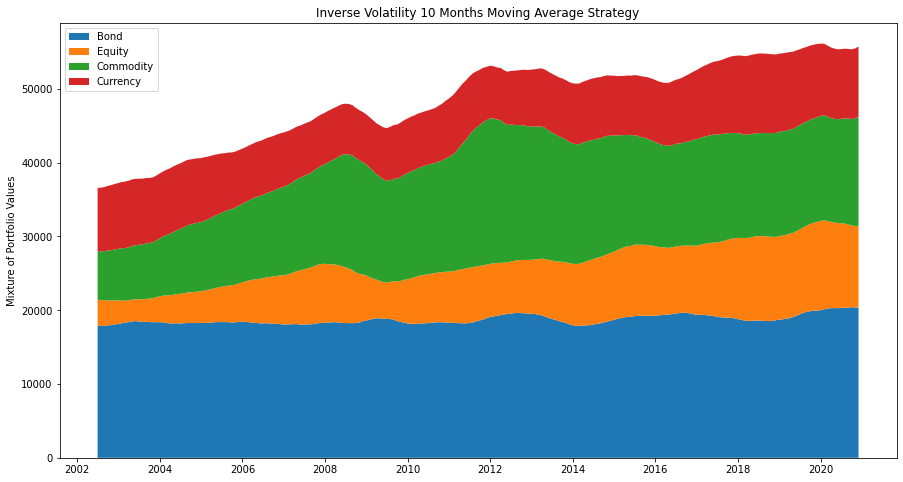

In [561]:
rcParams['figure.figsize'] = 15,8

x = inverse_vol_MA10.index
y1 = inverse_vol_MA10.Bond_inv_Value
y2 = inverse_vol_MA10.Equity_inv_Value
y3 = inverse_vol_MA10.Commodity_inv_Value
y4 = inverse_vol_MA10.Currency_inv_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Inverse Volatility 10 Months Moving Average Strategy')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

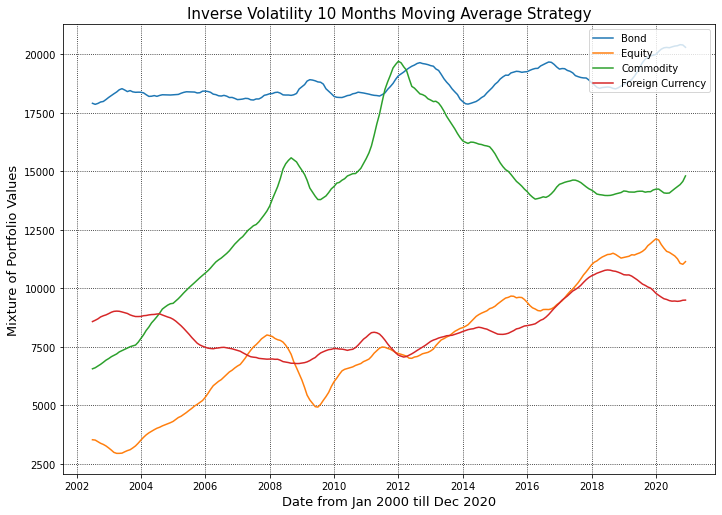

In [562]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Bond_inv_Value, label='Bond')
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Equity_inv_Value, label='Equity')
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Commodity_inv_Value, label='Commodity')                               
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Currency_inv_Value, label='Foreign Currency')
                               
plt.title('Inverse Volatility 10 Months Moving Average Strategy', fontsize=15)
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Mixture of Portfolio Values', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [563]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, 
# arithmetic mean, standard deviation, minimum value, maximum value, and percentile
inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value','Currency_inv_Value']].describe()

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
count      222.000000        222.000000           222.000000   
mean     18729.225308       7590.411705         13672.655316   
std        625.518314       2550.899461          3145.333539   
min      17863.123344       2944.148536          6559.141541   
25%      18266.438940       5809.653751         12142.900881   
50%      18481.138298       7417.929938         14160.563965   
75%      19207.205546       9457.494633         15328.971175   
max      20412.866953      12113.276927         19704.734729   

       Currency_inv_Value  
count          222.000000  
mean          8368.737790  
std           1121.314371  
min           6782.832831  
25%           7417.664739  
50%           8155.643754  
75%           8972.145648  
max          10784.509075

**Arithmetic Mean**

In [564]:
returns_Inv_bond_mean = np.mean(inverse_vol_MA10['Bond_inv_R'])
returns_Inv_bond_mean

0.0005689116669693088

In [565]:
returns_Inv_equi_mean = np.mean(inverse_vol_MA10['Equity_inv_R'])
returns_Inv_equi_mean

0.005322505997261444

In [566]:
returns_Inv_comm_mean = np.mean(inverse_vol_MA10['Commodity_inv_R'])
returns_Inv_comm_mean

0.0037348173853577514

In [567]:
returns_Inv_curr_mean = np.mean(inverse_vol_MA10['Currency_inv_R'])
returns_Inv_curr_mean

0.0005000418197319116

**Standard Deviation**

In [568]:
returns_Inv_bond_sigma = np.std(inverse_vol_MA10['Bond_inv_R'])
returns_Inv_bond_sigma

0.003924036590192325

In [569]:
returns_Inv_equi_sigma = np.std(inverse_vol_MA10['Equity_inv_R'])
returns_Inv_equi_sigma

0.01598497049192825

In [570]:
returns_Inv_comm_sigma = np.std(inverse_vol_MA10['Commodity_inv_R'])
returns_Inv_comm_sigma

0.009960705462542581

In [571]:
returns_Inv_curr_sigma = np.std(inverse_vol_MA10['Currency_inv_R'])
returns_Inv_curr_sigma

0.007549504314351035

**Skewness**

In [572]:
skew(inverse_vol_MA10['Bond_inv_Value'].dropna())

0.9388262154006938

In [573]:
skew(inverse_vol_MA10['Equity_inv_Value'].dropna())

-0.035353479271709336

In [574]:
skew(inverse_vol_MA10['Commodity_inv_Value'].dropna())

-0.5496590670884337

In [575]:
skew(inverse_vol_MA10['Currency_inv_Value'].dropna())

0.5866582097990637

**Kurtosis**

In [576]:
kurtosis(inverse_vol_MA10['Bond_inv_Value'].dropna())

0.016886976268752907

In [577]:
kurtosis(inverse_vol_MA10['Equity_inv_Value'].dropna())

-0.9081392408057023

In [578]:
kurtosis(inverse_vol_MA10['Commodity_inv_Value'].dropna())

-0.14446321006733864

In [579]:
kurtosis(inverse_vol_MA10['Currency_inv_Value'].dropna())

-0.6458085720376792

**Geometric Mean Rate of Return**

In [580]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [581]:
geometric_mean_return(inverse_vol_MA10['Bond_inv_R'])

0.0

In [582]:
geometric_mean_return(inverse_vol_MA10['Equity_inv_R'])

0.0

In [583]:
geometric_mean_return(inverse_vol_MA10['Commodity_inv_R'])

0.0

In [584]:
geometric_mean_return(inverse_vol_MA10['Currency_inv_R'])

0.0

**Annualized Volatility**

In [585]:
inverse_vol_MA10.Bond_inv_Vol.dropna()

Date
2020-12-01    0.058599
Name: Bond_inv_Vol, dtype: float64

In [586]:
inverse_vol_MA10.Equity_inv_Vol.dropna()

Date
2020-12-01    0.238709
Name: Equity_inv_Vol, dtype: float64

In [587]:
inverse_vol_MA10.Commodity_inv_Vol.dropna()

Date
2020-12-01    0.148747
Name: Commodity_inv_Vol, dtype: float64

In [588]:
inverse_vol_MA10.Currency_inv_Vol.dropna()

Date
2020-12-01    0.112739
Name: Currency_inv_Vol, dtype: float64

**Annualized Sharpe Ratio**

In [589]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [590]:
inverse_vol_MA10.shape[0]

222

In [591]:
Sharpe_Ratio(inverse_vol_MA10['Bond_inv_R'], 222, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

1.875432528603633

In [592]:
Sharpe_Ratio(inverse_vol_MA10['Equity_inv_R'], 222, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

4.88124304108438

In [593]:
Sharpe_Ratio(inverse_vol_MA10['Commodity_inv_R'], 222, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

5.46385375277191

In [594]:
Sharpe_Ratio(inverse_vol_MA10['Currency_inv_R'], 222, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

0.8391864839372176

**Annualized Sortino Ratio**

In [595]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [596]:
inverse_vol_MA10.shape[0]

222

In [597]:
Sortino_Ratio(inverse_vol_MA10['Bond_inv_R'], 222, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

2.9166873677397676

In [598]:
Sortino_Ratio(inverse_vol_MA10['Equity_inv_R'], 222, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

5.836388067253618

In [599]:
Sortino_Ratio(inverse_vol_MA10['Commodity_inv_R'], 222, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

11.454927450675036

In [600]:
Sortino_Ratio(inverse_vol_MA10['Currency_inv_R'], 222, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

1.3364572127139451

**Cumulative Return**

In [601]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_MA10['Bond_inv_Value'][-1] /inverse_vol_MA10['Bond_inv_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 13.37%


In [602]:
# Calculate the cumulative return of equity
cululative_return = 100 * (inverse_vol_MA10['Equity_inv_Value'][-1] /inverse_vol_MA10['Equity_inv_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 215.87%


In [603]:
# Calculate the cumulative return of commodity 
cululative_return = 100 * (inverse_vol_MA10['Commodity_inv_Value'][-1] /inverse_vol_MA10['Commodity_inv_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 125.69%


In [604]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (inverse_vol_MA10['Currency_inv_Value'][-1] /inverse_vol_MA10['Currency_inv_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is 10.69%


**Conclusion on Inverse Volatility 10 Months Moving Average Strategy**

**Arithmetic Mean**

- IV 10 MA Bond 0.0005689116669693088
- IV 10 MA Equity 0.005322505997261444
- IV 10 MA Commodity 0.0037348173853577514
- IV 10 MA Currency 0.0005000418197319116

**Standards Deviation**

- IV 10 MA Bond 0.003924036590192325
- IV 10 MA Equity 0.01598497049192825
- IV 10 MA Commodity 0.009960705462542581
- IV 10 MA Currency 0.007549504314351035

**Skewness**

- IV 10 MA Bond 0.9388262154006938
- IV 10 MA Equity -0.035353479271709336
- IV 10 MA Commodity -0.5496590670884337
- IV 10 MA Currency 0.5866582097990637

**Kurtosis**

- IV 10 MA Bond 0.016886976268752907
- IV 10 MA Equity -0.9081392408057023
- IV 10 MA Commodity -0.14446321006733864
- IV 10 MA Currency -0.6458085720376792

**Geometric Mean Rate of Returns**

- IV 10 MA Bond 0.00
- IV 10 MA Equity 0.00
- IV 10 MA Commodity 0.00
- IV 10 MA Currency 0.00

**Volatility**

- IV 10 MA Bond 0.058599
- IV 10 MA Equity 0.238709 
- IV 10 MA Commodity 0.148747
- IV 10 MA Currency 0.112739

**Annualized Sharpe Ratio**

- IV 10 MA Bond 1.875432528603633 
- IV 10 MA Equity 4.88124304108438
- IV 10 MA Commodity 5.46385375277191
- IV 10 MA Currency 0.8391864839372176

**Annualized Sortino Ratio**

- IV 10 MA Bond 2.9166873677397676
- IV 10 MA Equity 5.836388067253618
- IV 10 MA Commodity 11.454927450675036
- IV 10 MA Currency 1.3364572127139451

**Cumulative Return**

- IV 10 MA Bond 13.37%
- IV 10 MA Equity 215.87%
- IV 10 MA Commodity 125.69%
- IV 10 MA Currency 10.69%

In [605]:
# A Table of A Conclusion on Inverse Volatility 10 Months Moving Average Strategy

IVMA = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[0.0005689116669693088, 0.003924036590192325, 0.9388262154006938, 0.016886976268752907, 0.0000,
                0.058599, 1.875432528603633, 2.9166873677397676, 0.1337],
        'Equity':[0.005322505997261444, 0.01598497049192825, -0.035353479271709336, -0.9081392408057023, 0.00000,
                  0.238709 , 4.88124304108438, 5.836388067253618, 2.1587],
        'Commodity':[0.0037348173853577514, 0.009960705462542581, -0.5496590670884337, -0.14446321006733864, 0.00000,
                     0.148747, 5.46385375277191, 11.454927450675036, 1.2569],
        'Currency':[0.0005000418197319116, 0.007549504314351035, 0.5866582097990637, -0.6458085720376792, 
                    0.0000, 0.112739, 0.8391864839372176, 1.3364572127139451, 0.1069]}


df = pd.DataFrame(data=IVMA)
df

Particular      Bond    Equity  Commodity  Currency
0     Arithmetic Mean  0.000569  0.005323   0.003735  0.000500
1  Standard Deviation  0.003924  0.015985   0.009961  0.007550
2            Skewness  0.938826 -0.035353  -0.549659  0.586658
3            Kurtosis  0.016887 -0.908139  -0.144463 -0.645809
4      Geometric Mean  0.000000  0.000000   0.000000  0.000000
5          Volatility  0.058599  0.238709   0.148747  0.112739
6        Sharpe Ratio  1.875433  4.881243   5.463854  0.839186
7       Sortino Ratio  2.916687  5.836388  11.454927  1.336457
8   Cumulative Return  0.133700  2.158700   1.256900  0.106900